# Data Preparation and Feature Engineering

In [273]:
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importng warnings to handle warnings
import warnings
#Suppress the warnings generated by warning module
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Data Preparation

#### Reading CSV file from GitHub with headers as None

In [274]:
# Assigning the csv values to dataframe df
df = pd.read_csv("https://raw.githubusercontent.com/Vihasadi/featureEngineering/main/M10_Data.csv",header=None) 

In [275]:
df.head()

0    1            2    3    4     5            6    7      8     9      10  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  168.8   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  168.8   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  171.2   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  176.6   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  176.6   

     11    12    13    14    15   16    17    18    19    20   21    22  23  \
0  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111  5000  21   
1  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111  5000  21   
2  65.5  52.4  2823  ohcv   six  152  mpfi  2.68  3.47   9.0  154  5000  19   
3  66.2  54.3  2337   ohc  four  109  mpfi  3.19   3.4  10.0  102  5500  24   
4  66.4  54.3  2824   ohc  five  136  mpfi  3.19   3.4   8.0  115  5500  18   

   24     25  
0  27  13495  
1  27  16500  
2  26  16500  
3  30  13950  
4  22  17450

#### Assigning column names to dataframe

In [276]:
df.columns = ["Symboling","NormalizedLoss", "Make",
              "FuelType", "Aspiration", "Numofdoors", "BodyStyle",
              "DriveWheels","EngineLocation","WheelBase","Length",
              "Width","Height","CurbWeight","EngineType","Numofcylinders",
              "EngineSize","FuelSystem","Bore","Stroke","CompressionRatio",
              "Horsepower","PeakRpm","CityMpg","HighwayMpg","Price"]

In [277]:
df.head()

Symboling NormalizedLoss         Make FuelType Aspiration Numofdoors  \
0          3              ?  alfa-romero      gas        std        two   
1          3              ?  alfa-romero      gas        std        two   
2          1              ?  alfa-romero      gas        std        two   
3          2            164         audi      gas        std       four   
4          2            164         audi      gas        std       four   

     BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
0  convertible         rwd          front       88.6   168.8   64.1    48.8   
1  convertible         rwd          front       88.6   168.8   64.1    48.8   
2    hatchback         rwd          front       94.5   171.2   65.5    52.4   
3        sedan         fwd          front       99.8   176.6   66.2    54.3   
4        sedan         4wd          front       99.4   176.6   66.4    54.3   

   CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
0        2548       dohc           four         130       mpfi  3.47   2.68   
1        2548       dohc           four         130       mpfi  3.47   2.68   
2        2823       ohcv            six         152       mpfi  2.68   3.47   
3        2337        ohc           four         109       mpfi  3.19    3.4   
4        2824        ohc           five         136       mpfi  3.19    3.4   

   CompressionRatio Horsepower PeakRpm  CityMpg  HighwayMpg  Price  
0               9.0        111    5000       21          27  13495  
1               9.0        111    5000       21          27  16500  
2               9.0        154    5000       19          26  16500  
3              10.0        102    5500       24          30  13950  
4               8.0        115    5500       18          22  17450

### Data Summary

#### checking the shape of dataframe

In [11]:
df.shape

(205, 26)

##### The Dataframe contains 205 rows and 26 columns

In [12]:
# Using info to get all the details of the data_frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RiskRating        205 non-null    int64  
 1   NormalizedLoss    205 non-null    object 
 2   Make              205 non-null    object 
 3   FuelType          205 non-null    object 
 4   Aspiration        205 non-null    object 
 5   Numofdoors        205 non-null    object 
 6   BodyStyle         205 non-null    object 
 7   DriveWheels       205 non-null    object 
 8   EngineLocation    205 non-null    object 
 9   WheelBase         205 non-null    float64
 10  Length            205 non-null    float64
 11  Width             205 non-null    float64
 12  Height            205 non-null    float64
 13  CurbWeight        205 non-null    int64  
 14  EngineType        205 non-null    object 
 15  Numofcylinders    205 non-null    object 
 16  EngineSize        205 non-null    int64  
 1

##### The above results suggest there are no missing values for all the columns but there are columns such as Normalized loss, Bore, Stroke, Horsepower, PeakRpm and Price which should be Numeric but given as object type.
##### This indicates the presence of other types of missing values '?', 'NA' etc.

###### Check for Null values and convert the columns Normalizedloss, Bore, Stroke, Horsepower, PeakRpm and Price to Numeric type

In [278]:
df[((df.NormalizedLoss == '?') | (df.NormalizedLoss == 'NA'))]

Symboling NormalizedLoss           Make FuelType Aspiration Numofdoors  \
0            3              ?    alfa-romero      gas        std        two   
1            3              ?    alfa-romero      gas        std        two   
2            1              ?    alfa-romero      gas        std        two   
5            2              ?           audi      gas        std        two   
7            1              ?           audi      gas        std       four   
9            0              ?           audi      gas      turbo        two   
14           1              ?            bmw      gas        std       four   
15           0              ?            bmw      gas        std       four   
16           0              ?            bmw      gas        std        two   
17           0              ?            bmw      gas        std       four   
43           0              ?          isuzu      gas        std       four   
44           1              ?          isuzu      gas        std        two   
45           0              ?          isuzu      gas        std       four   
46           2              ?          isuzu      gas        std        two   
48           0              ?         jaguar      gas        std       four   
49           0              ?         jaguar      gas        std        two   
63           0              ?          mazda   diesel        std          ?   
66           0              ?          mazda   diesel        std       four   
71          -1              ?  mercedes-benz      gas        std       four   
73           0              ?  mercedes-benz      gas        std       four   
74           1              ?  mercedes-benz      gas        std        two   
75           1              ?        mercury      gas      turbo        two   
82           3              ?     mitsubishi      gas      turbo        two   
83           3              ?     mitsubishi      gas      turbo        two   
84           3              ?     mitsubishi      gas      turbo        two   
109          0              ?         peugot      gas        std       four   
110          0              ?         peugot   diesel      turbo       four   
113          0              ?         peugot      gas        std       four   
114          0              ?         peugot   diesel      turbo       four   
124          3              ?       plymouth      gas      turbo        two   
126          3              ?        porsche      gas        std        two   
127          3              ?        porsche      gas        std        two   
128          3              ?        porsche      gas        std        two   
129          1              ?        porsche      gas        std        two   
130          0              ?        renault      gas        std       four   
131          2              ?        renault      gas        std        two   
181         -1              ?         toyota      gas        std       four   
189          3              ?     volkswagen      gas        std        two   
191          0              ?     volkswagen      gas        std       four   
192          0              ?     volkswagen   diesel      turbo       four   
193          0              ?     volkswagen      gas        std       four   

       BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
0    convertible         rwd          front       88.6   168.8   64.1    48.8   
1    convertible         rwd          front       88.6   168.8   64.1    48.8   
2      hatchback         rwd          front       94.5   171.2   65.5    52.4   
5          sedan         fwd          front       99.8   177.3   66.3    53.1   
7          wagon         fwd          front      105.8   192.7   71.4    55.7   
9      hatchback         4wd          front       99.5   178.2   67.9    52.0   
14         sedan         rwd          front      103.5   189.0   66.9    55.7   
15         sedan         rwd          

In [279]:
df.NormalizedLoss.replace('?', np.nan, inplace = True)

In [280]:
df.NormalizedLoss = pd.to_numeric(df.NormalizedLoss)

##### For Bore Column

In [281]:
df[((df.Bore == '?') | (df.Bore == 'NA'))]

Symboling  NormalizedLoss   Make FuelType Aspiration Numofdoors  \
55          3           150.0  mazda      gas        std        two   
56          3           150.0  mazda      gas        std        two   
57          3           150.0  mazda      gas        std        two   
58          3           150.0  mazda      gas        std        two   

    BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
55  hatchback         rwd          front       95.3   169.0   65.7    49.6   
56  hatchback         rwd          front       95.3   169.0   65.7    49.6   
57  hatchback         rwd          front       95.3   169.0   65.7    49.6   
58  hatchback         rwd          front       95.3   169.0   65.7    49.6   

    CurbWeight EngineType Numofcylinders  EngineSize FuelSystem Bore Stroke  \
55        2380      rotor            two          70       4bbl    ?      ?   
56        2380      rotor            two          70       4bbl    ?      ?   
57        2385      rotor            two          70       4bbl    ?      ?   
58        2500      rotor            two          80       mpfi    ?      ?   

    CompressionRatio Horsepower PeakRpm  CityMpg  HighwayMpg  Price  
55               9.4        101    6000       17          23  10945  
56               9.4        101    6000       17          23  11845  
57               9.4        101    6000       17          23  13645  
58               9.4        135    6000       16          23  15645

In [282]:
df.Bore.replace('?', np.nan, inplace = True)

In [283]:
df.Bore = pd.to_numeric(df.Bore)

##### For Stroke Column

In [284]:
df[((df.Stroke == '?') | (df.Stroke == 'NA'))]

Symboling  NormalizedLoss   Make FuelType Aspiration Numofdoors  \
55          3           150.0  mazda      gas        std        two   
56          3           150.0  mazda      gas        std        two   
57          3           150.0  mazda      gas        std        two   
58          3           150.0  mazda      gas        std        two   

    BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
55  hatchback         rwd          front       95.3   169.0   65.7    49.6   
56  hatchback         rwd          front       95.3   169.0   65.7    49.6   
57  hatchback         rwd          front       95.3   169.0   65.7    49.6   
58  hatchback         rwd          front       95.3   169.0   65.7    49.6   

    CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
55        2380      rotor            two          70       4bbl   NaN      ?   
56        2380      rotor            two          70       4bbl   NaN      ?   
57        2385      rotor            two          70       4bbl   NaN      ?   
58        2500      rotor            two          80       mpfi   NaN      ?   

    CompressionRatio Horsepower PeakRpm  CityMpg  HighwayMpg  Price  
55               9.4        101    6000       17          23  10945  
56               9.4        101    6000       17          23  11845  
57               9.4        101    6000       17          23  13645  
58               9.4        135    6000       16          23  15645

In [285]:
df.Stroke.replace('?', np.nan, inplace = True)

In [286]:
df.Stroke = pd.to_numeric(df.Stroke)

##### For Horsepower column

In [287]:
df[((df.Horsepower == '?') | (df.Horsepower == 'NA'))]

Symboling  NormalizedLoss     Make FuelType Aspiration Numofdoors  \
130          0             NaN  renault      gas        std       four   
131          2             NaN  renault      gas        std        two   

     BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
130      wagon         fwd          front       96.1   181.5   66.5    55.2   
131  hatchback         fwd          front       96.1   176.8   66.6    50.5   

     CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore  \
130        2579        ohc           four         132       mpfi  3.46   
131        2460        ohc           four         132       mpfi  3.46   

     Stroke  CompressionRatio Horsepower PeakRpm  CityMpg  HighwayMpg Price  
130     3.9               8.7          ?       ?       23          31  9295  
131     3.9               8.7          ?       ?       23          31  9895

In [288]:
df.Horsepower.replace('?', np.nan, inplace = True)

In [289]:
df.Horsepower = pd.to_numeric(df.Horsepower)

##### For PeakRpm column

In [292]:
df[((df.PeakRpm == '?') | (df.PeakRpm == 'NA'))]

Symboling  NormalizedLoss     Make FuelType Aspiration Numofdoors  \
130          0             NaN  renault      gas        std       four   
131          2             NaN  renault      gas        std        two   

     BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
130      wagon         fwd          front       96.1   181.5   66.5    55.2   
131  hatchback         fwd          front       96.1   176.8   66.6    50.5   

     CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore  \
130        2579        ohc           four         132       mpfi  3.46   
131        2460        ohc           four         132       mpfi  3.46   

     Stroke  CompressionRatio  Horsepower PeakRpm  CityMpg  HighwayMpg Price  
130     3.9               8.7         NaN       ?       23          31  9295  
131     3.9               8.7         NaN       ?       23          31  9895

In [293]:
df.PeakRpm.replace('?', np.nan, inplace = True)

In [294]:
df.PeakRpm = pd.to_numeric(df.PeakRpm)

##### For Price column

In [295]:
df[((df.Price == '?') | (df.Price == 'NA'))]

Symboling  NormalizedLoss     Make FuelType Aspiration Numofdoors  \
9            0             NaN     audi      gas      turbo        two   
44           1             NaN    isuzu      gas        std        two   
45           0             NaN    isuzu      gas        std       four   
129          1             NaN  porsche      gas        std        two   

     BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
9    hatchback         4wd          front       99.5   178.2   67.9    52.0   
44       sedan         fwd          front       94.5   155.9   63.6    52.0   
45       sedan         fwd          front       94.5   155.9   63.6    52.0   
129  hatchback         rwd          front       98.4   175.7   72.3    50.5   

     CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore  \
9          3053        ohc           five         131       mpfi  3.13   
44         1874        ohc           four          90       2bbl  3.03   
45         1909        ohc           four          90       2bbl  3.03   
129        3366      dohcv          eight         203       mpfi  3.94   

     Stroke  CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg Price  
9      3.40               7.0       160.0   5500.0       16          22     ?  
44     3.11               9.6        70.0   5400.0       38          43     ?  
45     3.11               9.6        70.0   5400.0       38          43     ?  
129    3.11              10.0       288.0   5750.0       17          28     ?

In [296]:
df.Price.replace('?', np.nan, inplace = True)

In [297]:
df.Price = pd.to_numeric(df.Price)

#### Using desrcibe function to get descriptive statistics of the data frame

In [298]:
df.describe()

Symboling  NormalizedLoss   WheelBase      Length       Width  \
count  205.000000      164.000000  205.000000  205.000000  205.000000   
mean     0.834146      122.000000   98.756585  174.049268   65.907805   
std      1.245307       35.442168    6.021776   12.337289    2.145204   
min     -2.000000       65.000000   86.600000  141.100000   60.300000   
25%      0.000000       94.000000   94.500000  166.300000   64.100000   
50%      1.000000      115.000000   97.000000  173.200000   65.500000   
75%      2.000000      150.000000  102.400000  183.100000   66.900000   
max      3.000000      256.000000  120.900000  208.100000   72.300000   

           Height   CurbWeight  EngineSize        Bore      Stroke  \
count  205.000000   205.000000  205.000000  201.000000  201.000000   
mean    53.724878  2555.565854  126.907317    3.329751    3.255423   
std      2.443522   520.680204   41.642693    0.273539    0.316717   
min     47.800000  1488.000000   61.000000    2.540000    2.070000   
25%     52.000000  2145.000000   97.000000    3.150000    3.110000   
50%     54.100000  2414.000000  120.000000    3.310000    3.290000   
75%     55.500000  2935.000000  141.000000    3.590000    3.410000   
max     59.800000  4066.000000  326.000000    3.940000    4.170000   

       CompressionRatio  Horsepower      PeakRpm     CityMpg  HighwayMpg  \
count        205.000000  203.000000   203.000000  205.000000  205.000000   
mean          10.142537  104.256158  5125.369458   25.219512   30.751220   
std            3.972040   39.714369   479.334560    6.542142    6.886443   
min            7.000000   48.000000  4150.000000   13.000000   16.000000   
25%            8.600000   70.000000  4800.000000   19.000000   25.000000   
50%            9.000000   95.000000  5200.000000   24.000000   30.000000   
75%            9.400000  116.000000  5500.000000   30.000000   34.000000   
max           23.000000  288.000000  6600.000000   49.000000   54.000000   

              Price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

##  Exploratory Data Analysis (EDA)

### Univariate Numerical Analysis


##### Detailed representation of Symboling column

In [299]:
df.Symboling.describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Symboling, dtype: float64

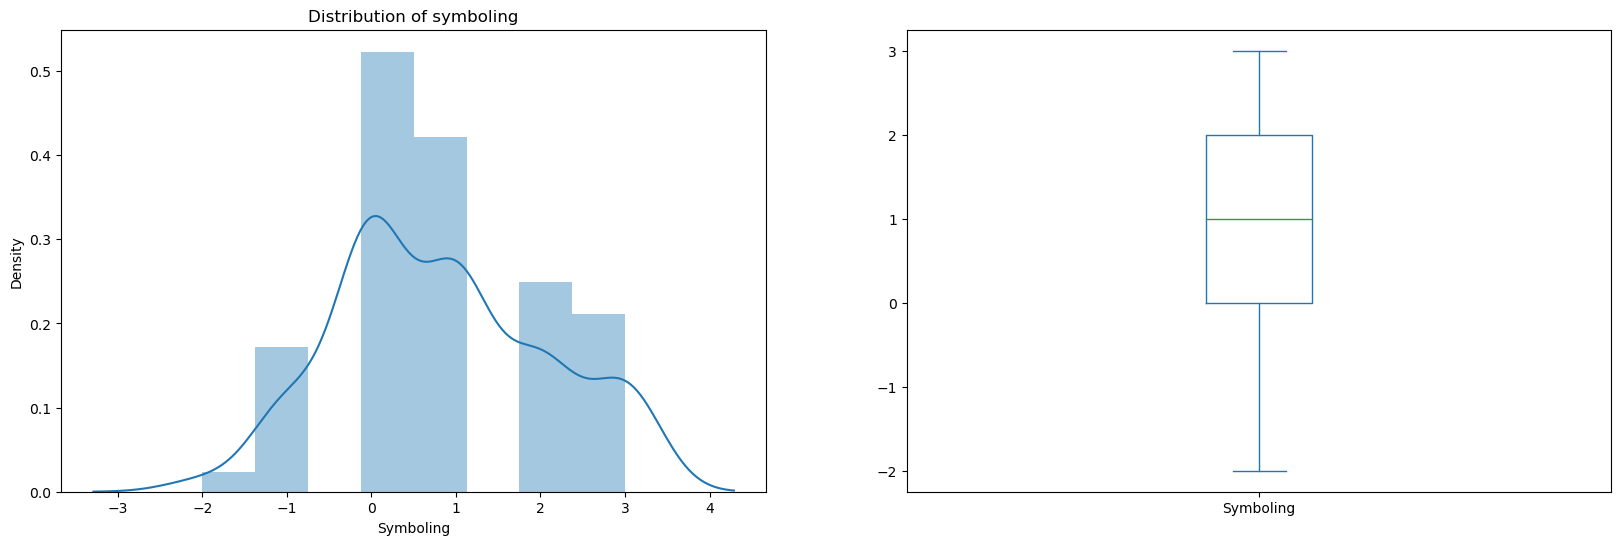

In [301]:
#plotting figure and adjusting the figure size
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for RiskRating
sns.distplot(df["Symboling"]);
plt.title("Distribution of symboling")

plt.subplot(122)
# Box plot for RiskRating
df["Symboling"].plot(kind='box')
plt.show()

* The distribution of Symboling indicates that it is a numeric discrete column with minimum value of -2 and maximum value of 3.
* There are no outliers found for Symboling column.

##### Detailed representation of WheelBase column

In [302]:
df.WheelBase.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: WheelBase, dtype: float64

* From the description of WheelBase field we can find that mean and median are closer.
* The Quartile value at 75% is 102.4 and maximum value of 120.4 are closer which may not result in outliers.

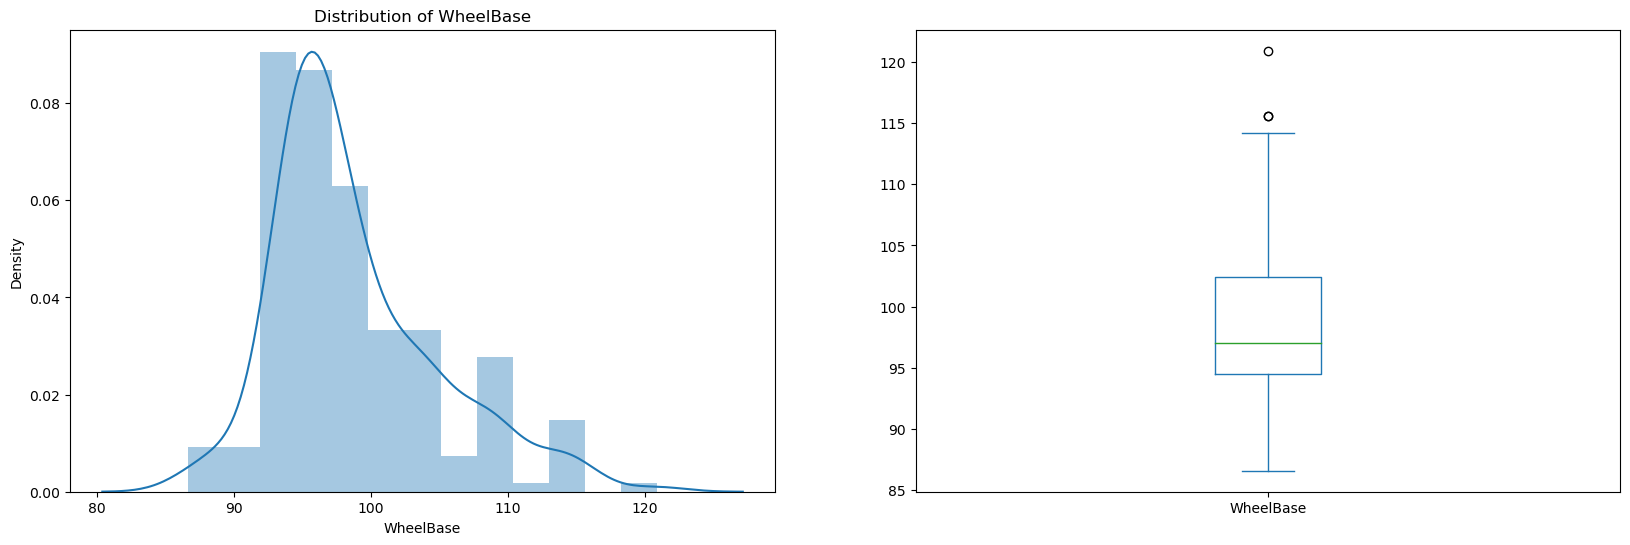

In [303]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for WheelBase
sns.distplot(df.WheelBase);
plt.title("Distribution of WheelBase")

plt.subplot(122)
# Box plot for WheelBase
df["WheelBase"].plot(kind='box')
plt.show()

* The boxplot of WheelBase signifies the presence of outliers but are very closer to the upper whisker.
* The distplot shows that the distribution is slightly right skewed.

##### Detailed representation of Length column

In [304]:
df.Length.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: Length, dtype: float64

* From the description of Length column we can find that mean and median are closer.
* The Quartile value at 75% is 183 and maximum value of 208 are closer which may not result in outliers.

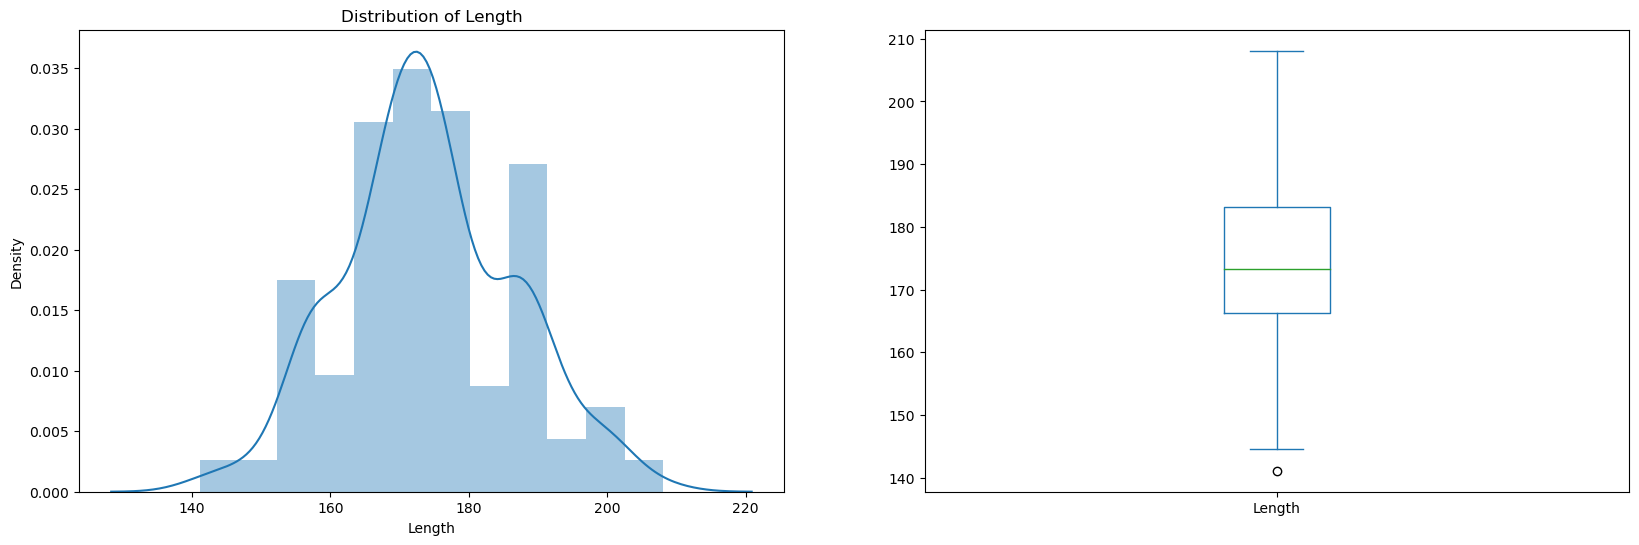

In [305]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for Length
sns.distplot(df.Length);
plt.title("Distribution of Length")

plt.subplot(122)
# Box plot for Length
df["Length"].plot(kind='box')
plt.show()

* The boxplot of Length signifies the presence of an outlier but it is very closer to the lower whisker.
* The distplot shows Length is normally distributed without any skew.

##### Detailed representation of Width column

In [306]:
df.Width.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: Width, dtype: float64

* From the description of Width column we can find that mean and median are very close.
* The Quartile value at 75% is 66.9 and maximum value of 72.3 are closer which may not result in outliers.

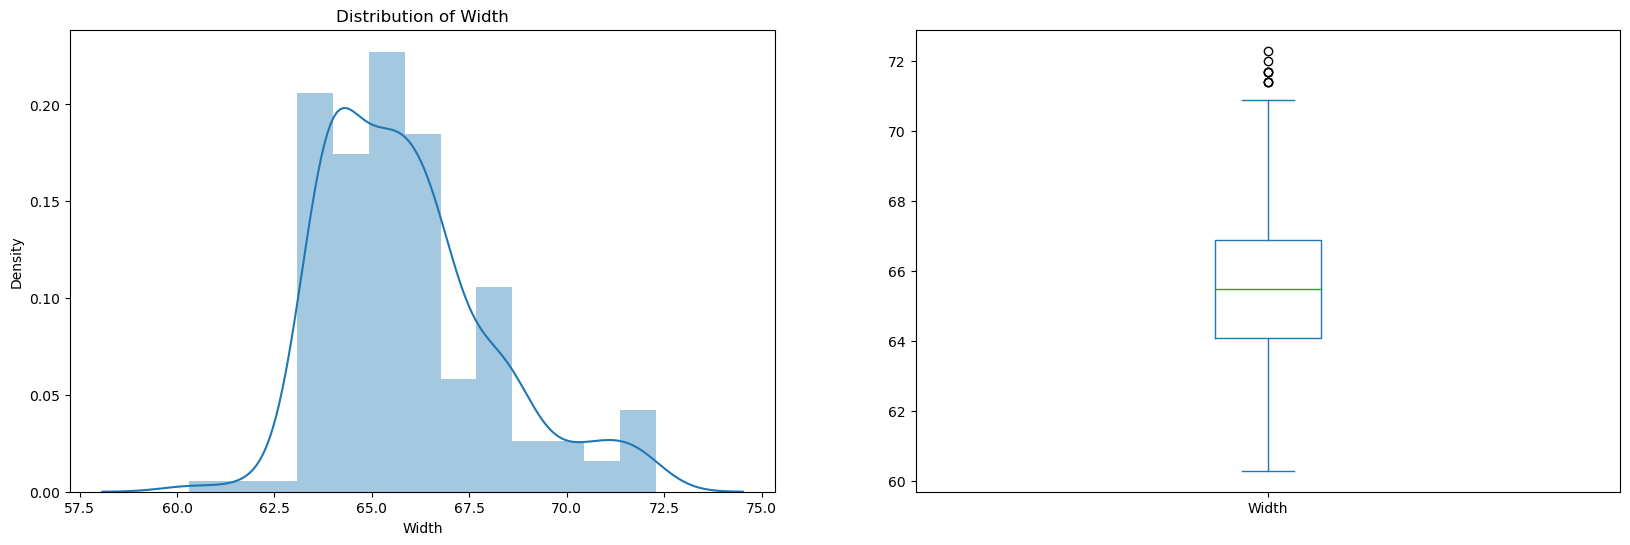

In [307]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for Width
sns.distplot(df.Width);
plt.title("Distribution of Width")

plt.subplot(122)
# Box plot for Width
df["Width"].plot(kind='box')
plt.show()

* The boxplot of Width signifies the presence of outliers but are closer to the upper whisker.
* The distplot shows that the distribution is slightly right skewed.

##### Detailed representation of Height column

In [308]:
df.Height.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: Height, dtype: float64

* From the description of Height column we can find that mean and median are very close.
* The Quartile value at 75% is 55.5 and maximum value of 59.8 are closer which may not result in many outliers.

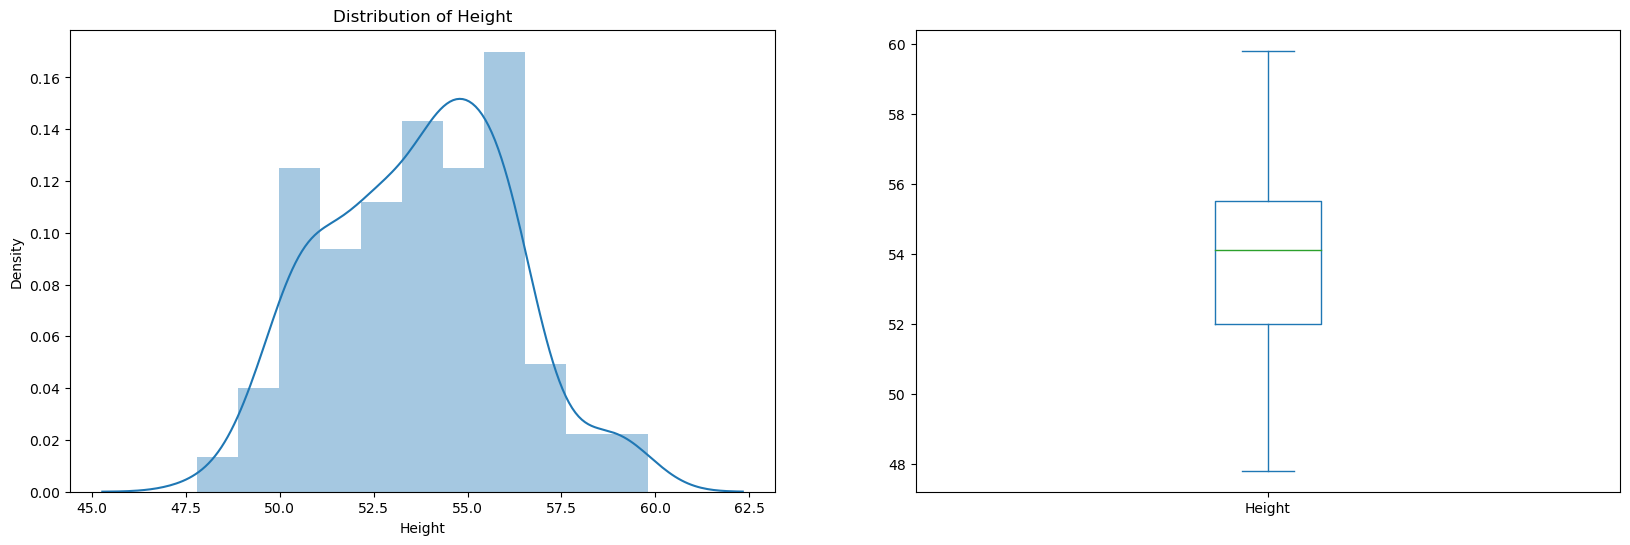

In [309]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for Height
sns.distplot(df.Height);
plt.title("Distribution of Height")

plt.subplot(122)
# Box plot for Height
df["Height"].plot(kind='box')
plt.show()

* The boxplot of Height signifies no outliers in the distribution.
* The distplot shows that the distribution is slightly left skewed.

##### Detailed representation of CurbWeight column

In [310]:
df.CurbWeight.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: CurbWeight, dtype: float64

* From the description of CurbWeight field we can find that mean and median are closer.
* There is a wide difference between Quartile value at 75% which is 2935 and maximum value of 4066 which may result in presence of outliers.

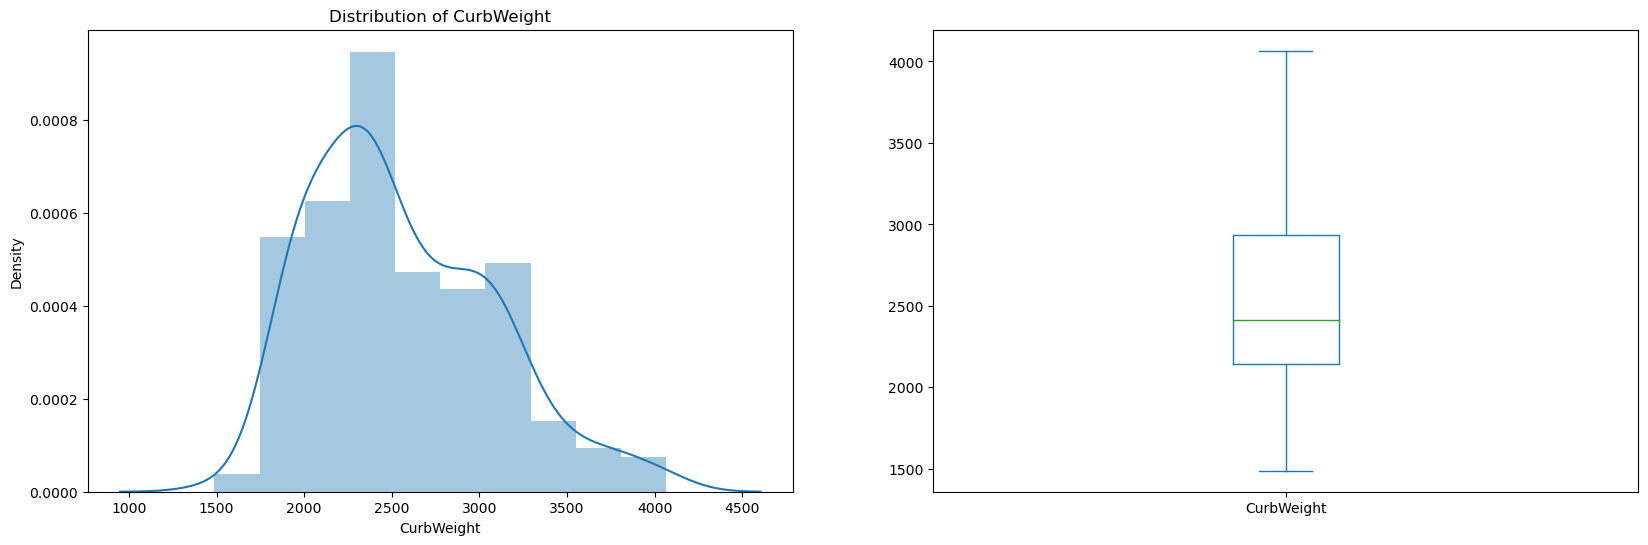

In [311]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for CurbWeight
sns.distplot(df.CurbWeight);
plt.title("Distribution of CurbWeight")

plt.subplot(122)
# Box plot for CurbWeight
df["CurbWeight"].plot(kind='box')
plt.show()

* The boxplot of CurbWeight signifies no outliers in the distribution.
* The distplot shows that the distribution is slightly right skewed.

##### Detailed representation of EngineSize column

In [312]:
df.EngineSize.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: EngineSize, dtype: float64

* From the description of EngineSize field we can find that mean and median are closer.
* There is a wide difference between Quartile value at 75% which is 141 and maximum value of 326 which may result in presence of outliers.

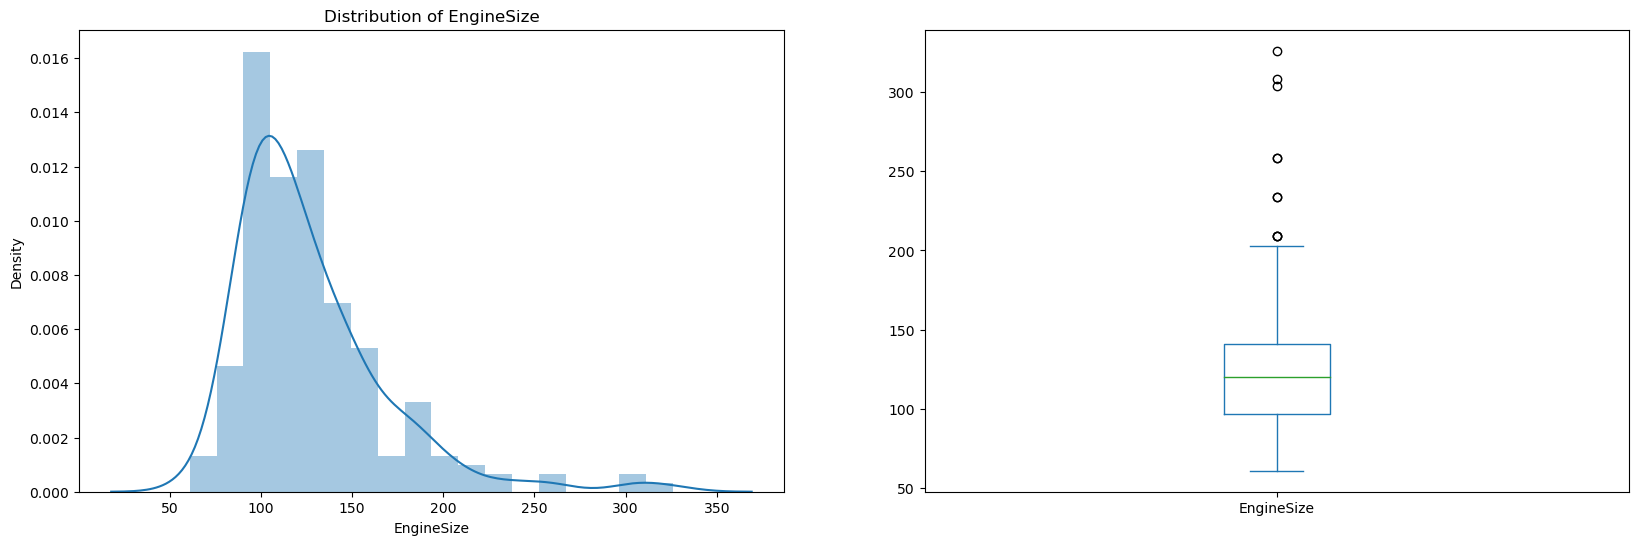

In [315]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for EngineSize
sns.distplot(df.EngineSize);
plt.title("Distribution of EngineSize")

plt.subplot(122)
# Box plot for EngineSize
df["EngineSize"].plot(kind='box')
plt.show()

* The boxplot of CurbWeight signifies the presence of outliers in the distribution.
* The distplot shows that the distribution is right skewed.

##### Detailed representation of CompressionRatio column

In [316]:
df.CompressionRatio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: CompressionRatio, dtype: float64

* From the description of CompressionRatio field we can find that mean and median are closer.
* There is a wide difference between Quartile value at 75% which is 9.4 and maximum value of 23 which may result in presence of outliers.

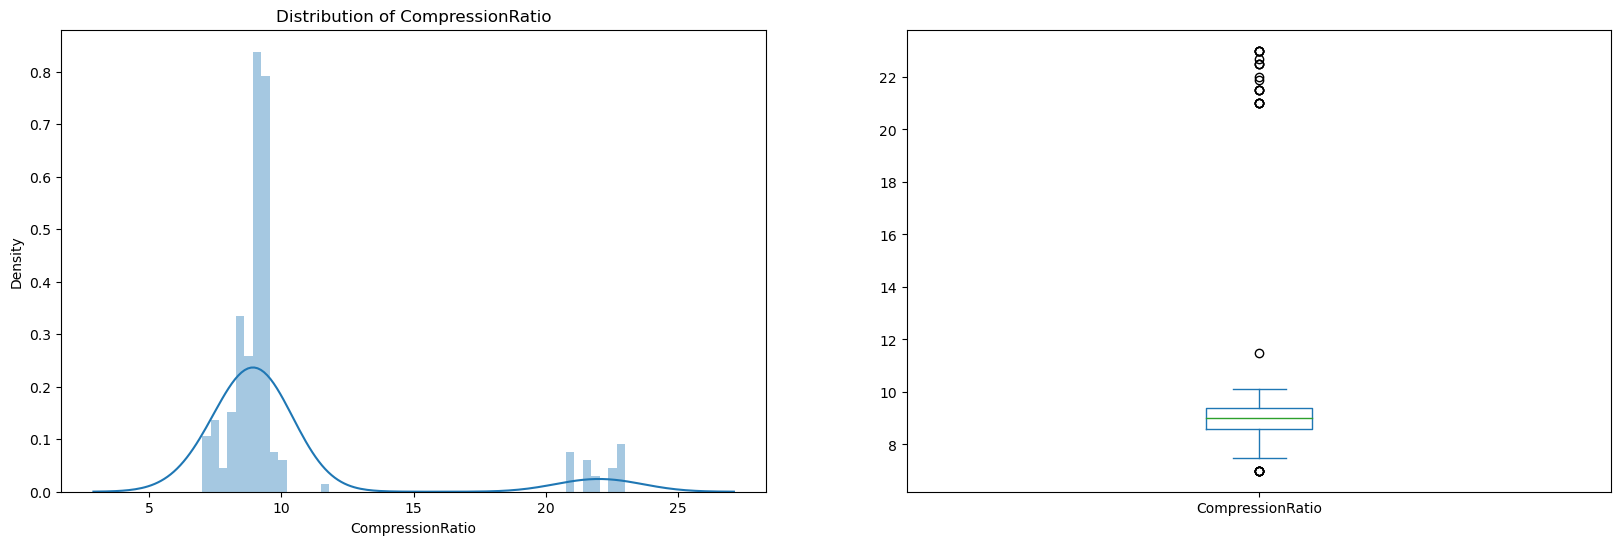

In [317]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for CompressionRatio
sns.distplot(df.CompressionRatio);
plt.title("Distribution of CompressionRatio")

plt.subplot(122)
# Box plot for CompressionRatio
df["CompressionRatio"].plot(kind='box')
plt.show()

* The boxplot of CompressionRatio signifies the presence of outliers in the distribution.
* The distplot shows that the distribution is right skewed and is non continuous.

##### Detailed representation of CityMpg column

In [318]:
df.CityMpg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: CityMpg, dtype: float64

* From the description of CityMpg field we can find that mean and median are closer.
* The difference between Quartile value at 75% which is 30 and maximum value of 49 indicates outliers may not be present in the distribution

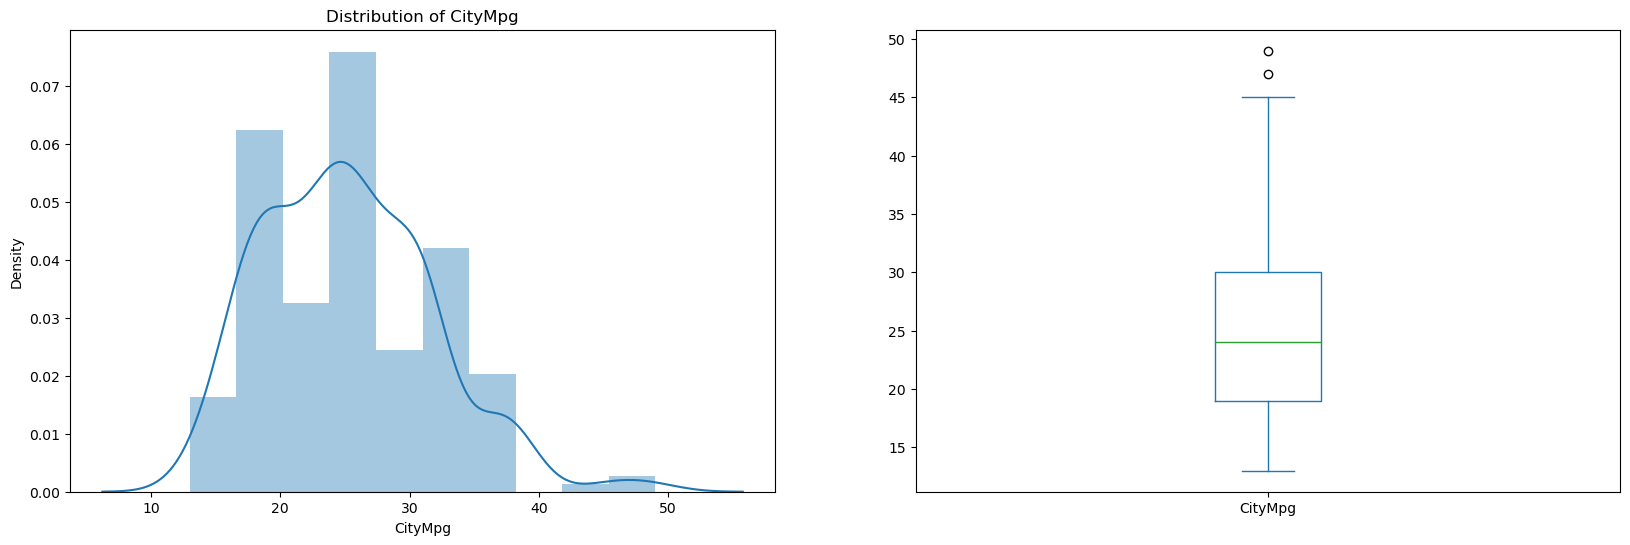

In [319]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for CityMpg
sns.distplot(df.CityMpg);
plt.title("Distribution of CityMpg")

plt.subplot(122)
# Box plot for CityMpg
df["CityMpg"].plot(kind='box')
plt.show()

* The boxplot of CityMpg signifies the presence of outliers in the distribution but are very close to upper whisker.

##### Detailed representation of HighwayMpg column

In [320]:
df.HighwayMpg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: HighwayMpg, dtype: float64

* From the description of HighwayMpg field we can find that mean and median are closer.
* The wide difference between Quartile value at 75% which is 34 and maximum value of 54 indicates outliers may not be present in the distribution.

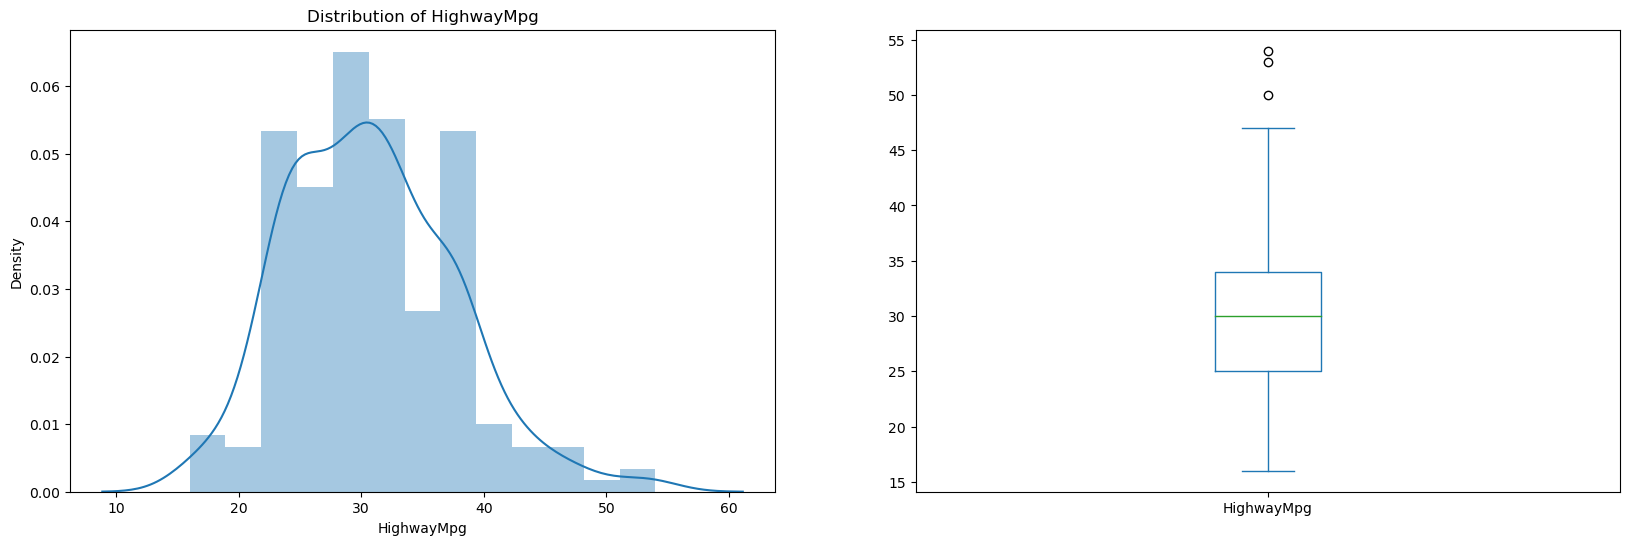

In [321]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for HighwayMpg
sns.distplot(df.HighwayMpg);
plt.title("Distribution of HighwayMpg")

plt.subplot(122)
# Box plot for HighwayMpg
df["HighwayMpg"].plot(kind='box')
plt.show()

* The boxplot of HighwayMpg signifies the presence of outliers in the distribution but the outliers are very close to the upper whisker
* The distplot shows that the distribution is continuous and slightly right skewed.

##### Detailed representation of Bore column

In [322]:
df.Bore.describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: Bore, dtype: float64

* From the description of Bore field we can find that mean and median are closer.
* The Quartile value at 75% which is 3.59 and maximum value of 3.94 indicates outliers may not be present in the distribution.

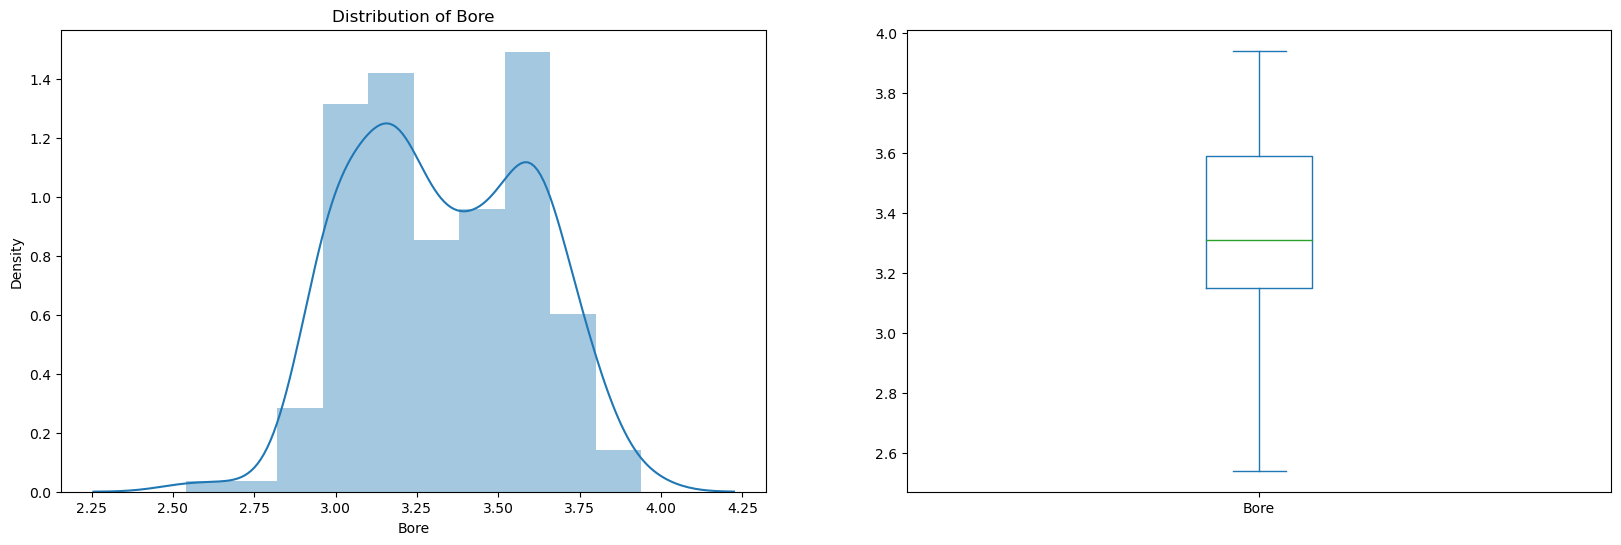

In [323]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for Bore
sns.distplot(df.Bore);
plt.title("Distribution of Bore")

plt.subplot(122)
# Box plot for Bore
df["Bore"].plot(kind='box')
plt.show()

* The boxplot of Bore signifies absence of outliers in the distribution.
* The distplot shows that the distribution is continuous and there are no skews in the distribution.

##### Detailed representation of NormalizedLoss column

In [324]:
df.NormalizedLoss.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: NormalizedLoss, dtype: float64

* From the description of NormalizedLoss field we can find that mean and median are closer.
* The Quartile value at 75% which is 150 and maximum value of 256 indicates outliers may be present in the distribution.

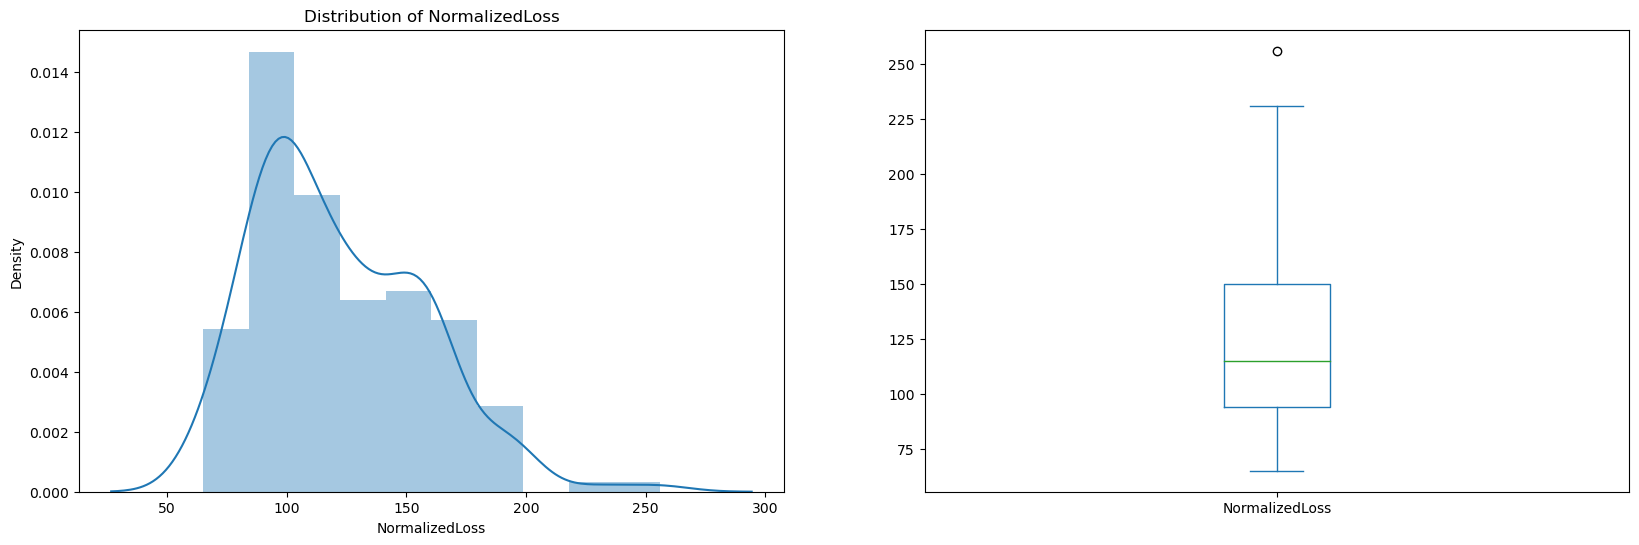

In [325]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for NormalizedLoss
sns.distplot(df.NormalizedLoss);
plt.title("Distribution of NormalizedLoss")

plt.subplot(122)
# Box plot for NormalizedLoss
df["NormalizedLoss"].plot(kind='box')
plt.show()

* The boxplot of NormalizedLoss signifies presence of an outlier in the distribution but is very close to the upper whisker.
* The distplot shows that the distribution is right skewed.

##### Detailed representation of Stroke column

In [327]:
df.Stroke.describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: Stroke, dtype: float64

* From the description of Stroke field we can find that mean and median are closer.
* The Quartile value at 75% which is 3.41 and maximum value of 4.17 indicates outliers may not be present in the distribution.

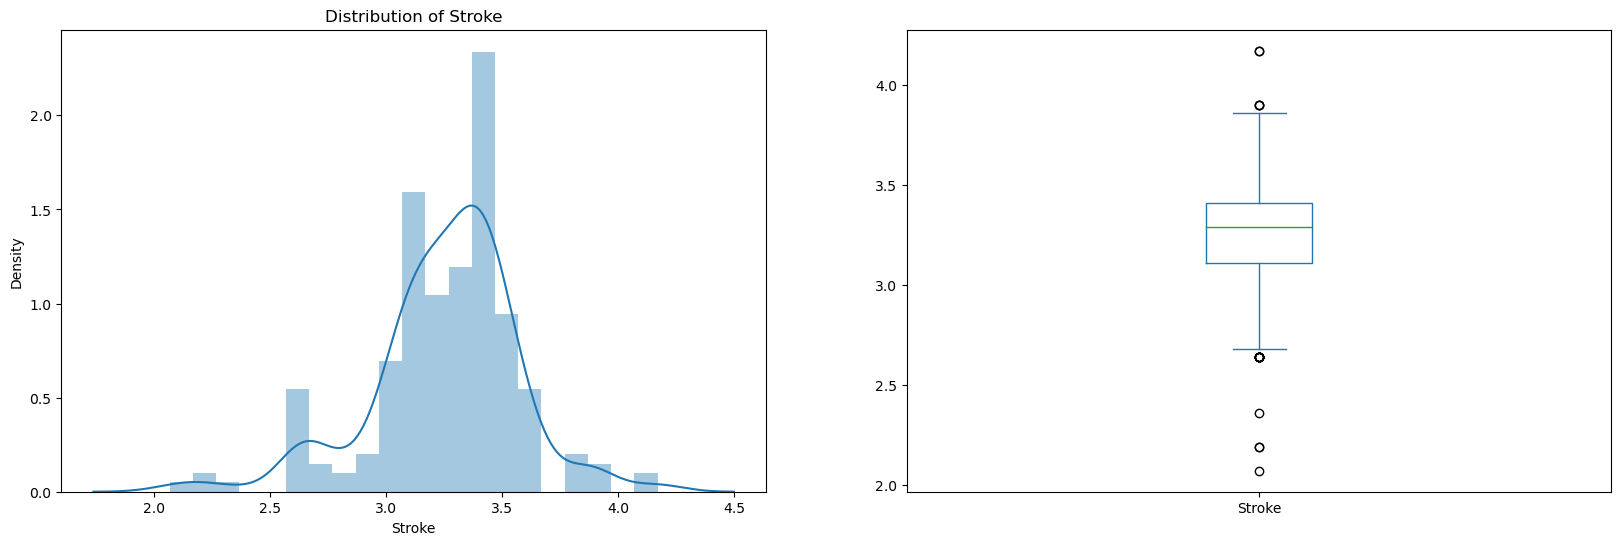

In [328]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for Stroke
sns.distplot(df.Stroke)
plt.title("Distribution of Stroke")

plt.subplot(122)
# Box plot for Stroke
df["Stroke"].plot(kind='box')
plt.show()

* The boxplot of Stroke signifies presence of outliers in the distribution but are very close to both the upper and lower whisker.
* The distplot shows that the distribution is non continuous and left skewed.

##### Detailed representation of Horsepower column

In [329]:
df.Horsepower.describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: Horsepower, dtype: float64

* From the description of Horsepower field we can find that mean and median are closer.
* The Quartile value at 75% which is 116 and maximum value of 288 indicates the presence of outliers in the distribution.

<Axes: >

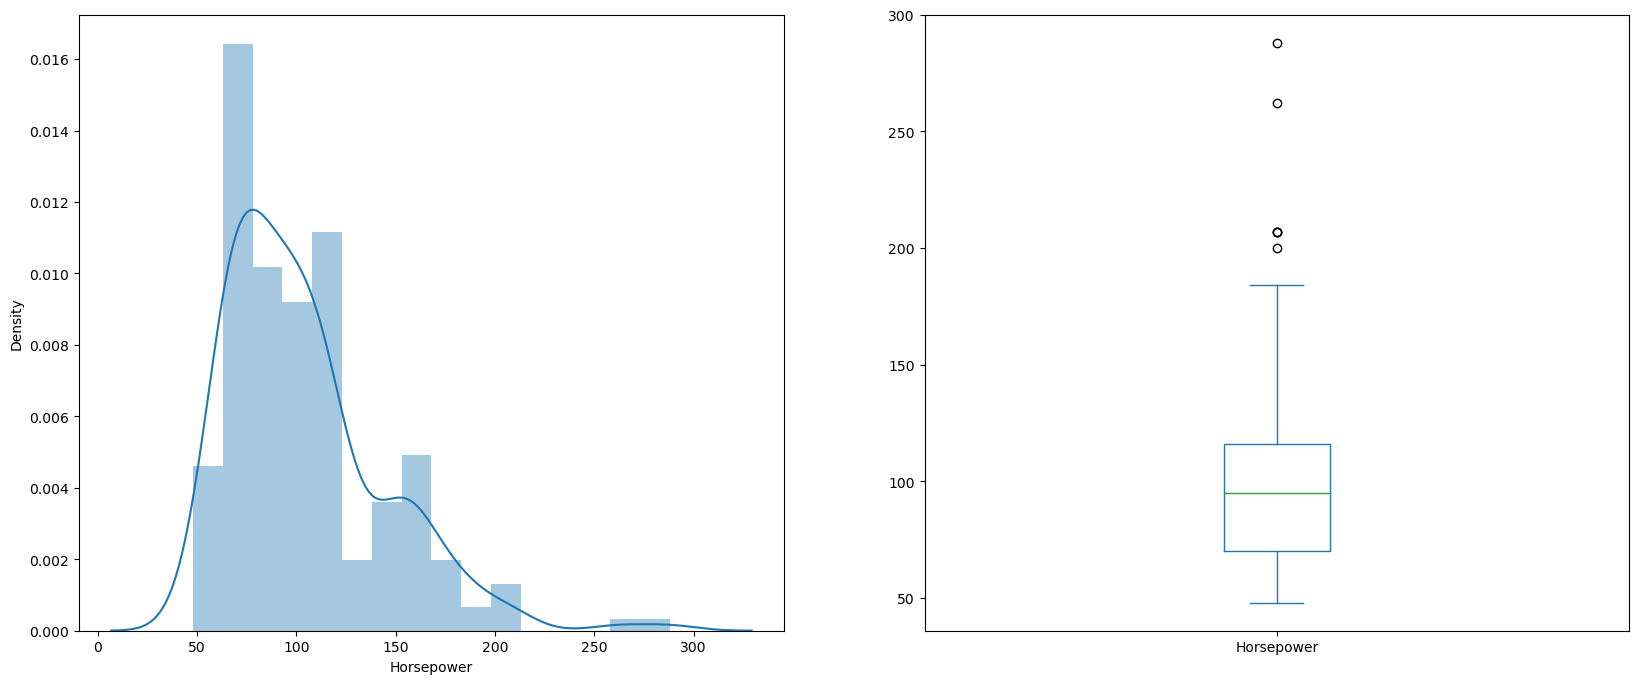

In [330]:
plt.figure(figsize=(20,8))
plt.subplot(121)
#Using distplot to plot the histogram for Horsepower
sns.distplot(df.Horsepower);

plt.subplot(122)
# plot boxplot for Horsepower
df.Horsepower.plot(kind='box')

* The boxplot of Horsepower signifies presence of outliers in the distribution.
* The distplot shows that the distribution is right skewed.

##### Detailed representation of PeakRpm column

In [331]:
df.PeakRpm.describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: PeakRpm, dtype: float64

* From the description of PeakRpm field we can find that mean and median are closer.
* The Quartile value at 75% which is 5500 and maximum value of 6600 indicates the presence of outliers in the distribution.

<Axes: >

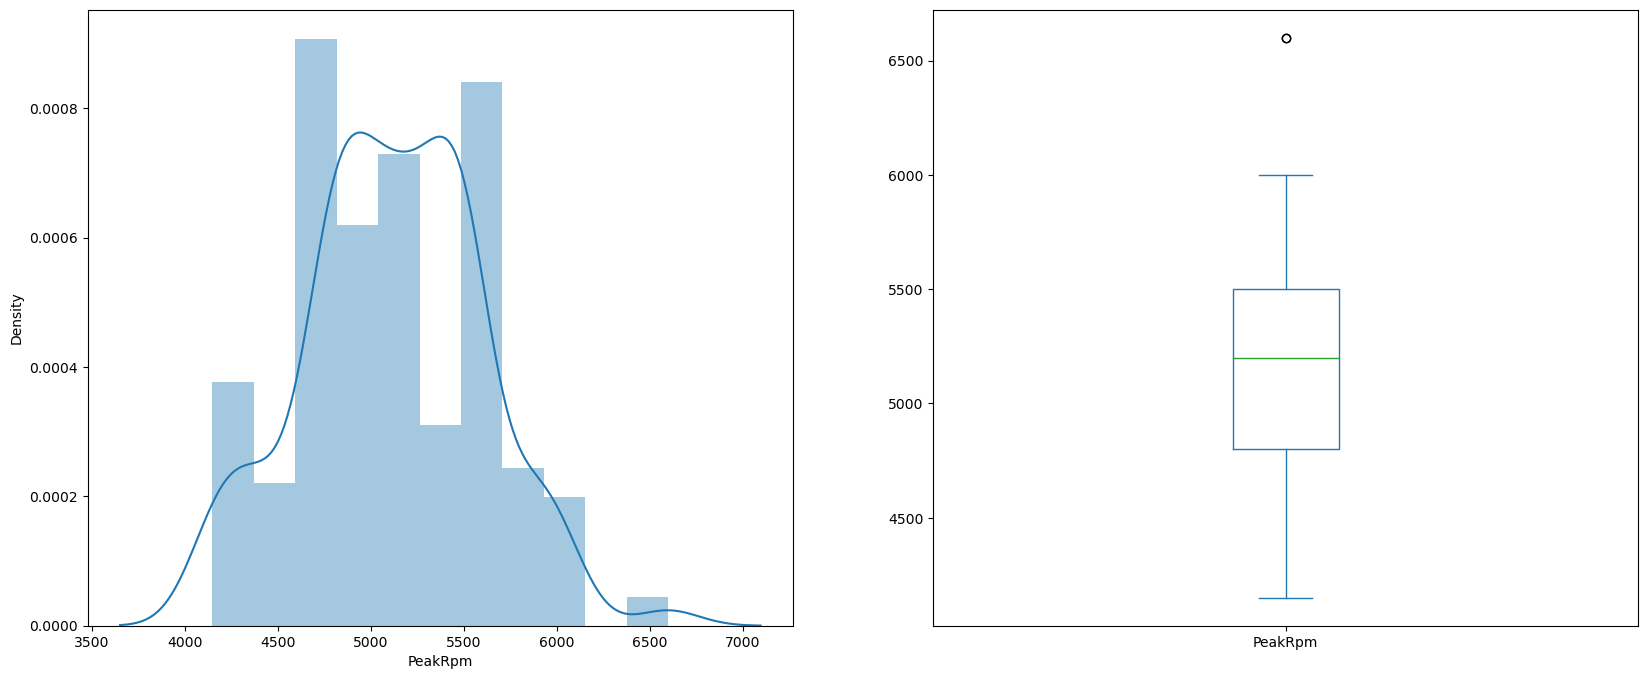

In [333]:
plt.figure(figsize=(20,8))
plt.subplot(121)
#Using distplot to plot the histogram for PeakRpm
sns.distplot(df.PeakRpm);

plt.subplot(122)
# plot boxplot for PeakRpm
df.PeakRpm.plot(kind='box')

* The boxplot of PeakRpm signifies presence of an outlier in the distribution.
* The distplot shows that the distribution is non continuous and non-skewed.

##### Detailed representation of Price column

In [334]:
df.Price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: Price, dtype: float64

* From the description of Price field we can find that mean and median are closer but the standard deviation of 7947 is very high.
* The Quartile value at 75% which is 16500 and maximum value of 45400 indicates the presence of outliers in the distribution.

<Axes: >

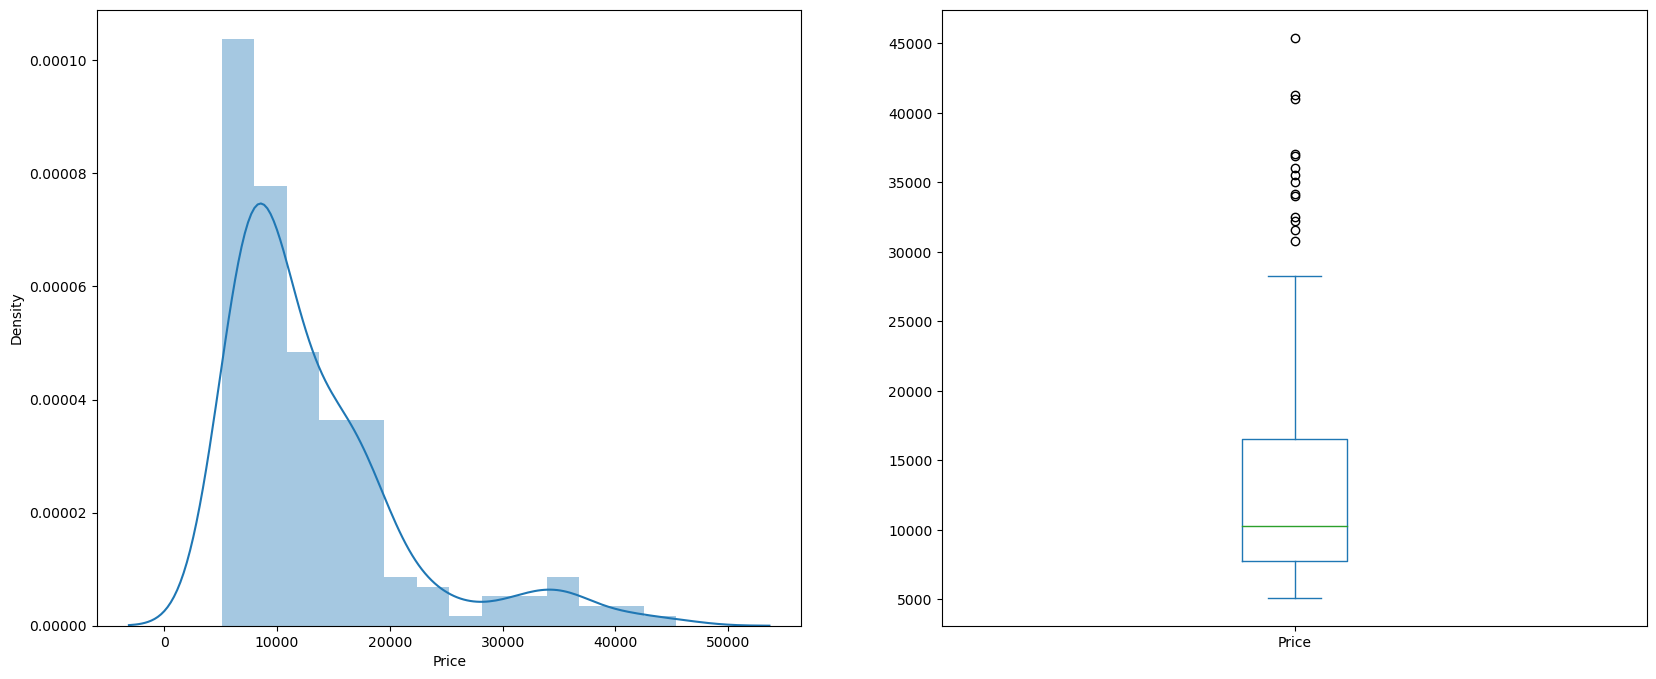

In [335]:
plt.figure(figsize=(20,8))
plt.subplot(121)
#Using distplot to plot the histogram for Price
sns.distplot(df.Price);

plt.subplot(122)
# plot boxplot for Price
df.Price.plot(kind='box')

* The boxplot of PeakRpm signifies presence of outliers in the distribution.
* The distplot shows that the distribution is continuous and right skewed.

### Categorical Analysis

In [336]:
#Using value_counts to know the Make attributes and also frequency in dataframe
df.Make.value_counts()

Make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

* From above we can understand that the datatype of Make is Categorical/nominal

In [337]:
#Using value_counts to know the FuelType attributes and also frequency in dataframe
df.FuelType.value_counts()

FuelType
gas       185
diesel     20
Name: count, dtype: int64

* From above we can understand that the datatype of Fueltype is Categorical/nominal

In [338]:
#Using value_counts to know the Aspiration attributes and also frequency in dataframe
df.Aspiration.value_counts()

Aspiration
std      168
turbo     37
Name: count, dtype: int64

* From above we can understand that the datatype of Aspiration is Categorical/nominal

In [339]:
#Using value_counts to know the Numofdoors attributes and also frequency in dataframe
df.Numofdoors.value_counts()

Numofdoors
four    114
two      89
?         2
Name: count, dtype: int64

* From above we can understand that the datatype of Numofdoors is Categorical/ordinal and has two null values

In [340]:
#Using value_counts to know the BodyStyle attributes and also frequency in dataframe
df.BodyStyle.value_counts()

BodyStyle
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

* From above we can understand that the datatype of BodyStyle is Categorical/nominal

In [341]:
#Using value_counts to know the DriveWheels attributes and also frequency in dataframe
df.DriveWheels.value_counts()

DriveWheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

* From above we can understand that the datatype of DriveWheels is Categorical/nominal

In [342]:
#Using value_counts to know the EngineLocation attributes and also frequency in dataframe
df.EngineLocation.value_counts()

EngineLocation
front    202
rear       3
Name: count, dtype: int64

* From above we can understand that the datatype of EngineLocation is Categorical/nominal

In [343]:
#Using value_counts to know the EngineType attributes and also frequency in dataframe
df.EngineType.value_counts()

EngineType
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

* From above we can understand that the datatype of EngineType is Categorical/nominal

In [344]:
#Using value_counts to know the Numofcylinders attributes and also frequency in dataframe
df.Numofcylinders.value_counts()

Numofcylinders
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

* From above we can understand that the datatype of Numofcylinders is Categorical/ordinal

In [345]:
#Using value_counts to know the FuelSystem attributes and also frequency in dataframe
df.FuelSystem.value_counts()

FuelSystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

* From above we can understand that the datatype of FuelSystem is Categorical/nominal.

#### Bar Plots for Categorical analysis in Univariate Analysis

<Axes: title={'center': 'Freq Dist of Make column'}, xlabel='Make'>

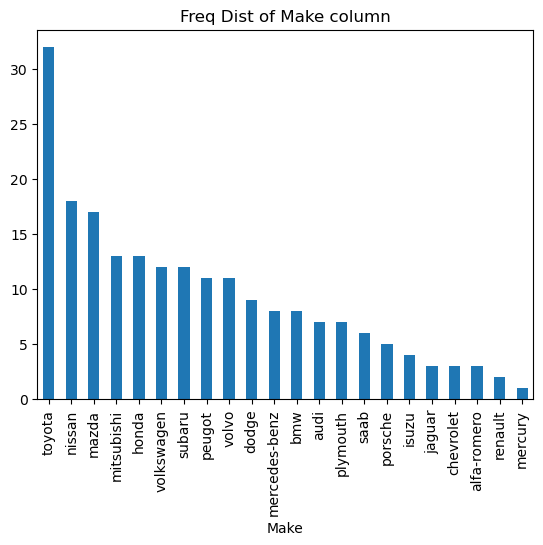

In [346]:
# Plotting bar graph for Make
df.Make.value_counts().plot.bar(title = "Freq Dist of Make column")

* Frequently occured Make is toyota while the least is mercury, which occured only one time

<Axes: title={'center': 'Freq Dist of FuelType column'}, xlabel='FuelType'>

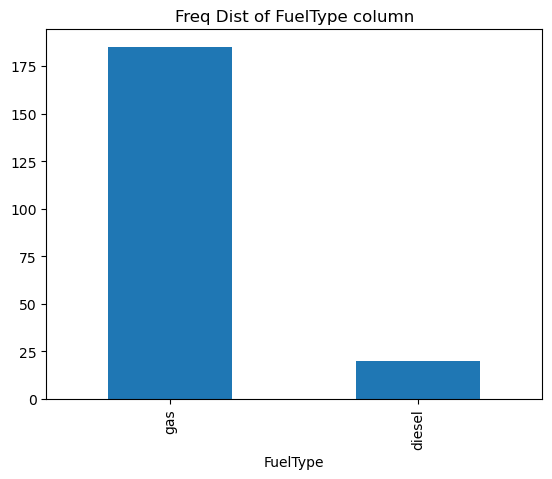

In [347]:
# Plotting bar graph for FuelType
df.FuelType.value_counts().plot.bar(title = "Freq Dist of FuelType column")

* Frequently occured Fueltype is gas while diesel occured only for 20 times

<Axes: title={'center': 'Freq Dist of Aspiration column'}, xlabel='Aspiration'>

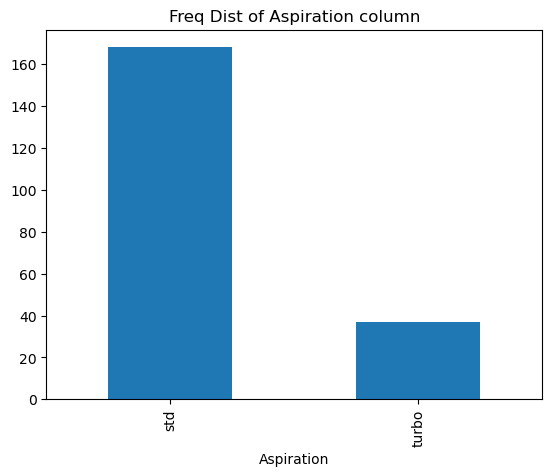

In [348]:
# Plotting bar graph for Aspiration
df.Aspiration.value_counts().plot.bar(title = "Freq Dist of Aspiration column")

* Frequently occured Aspiration is standard while the least is turbo

<Axes: title={'center': 'Freq Dist of Numofdoors column'}, xlabel='Numofdoors'>

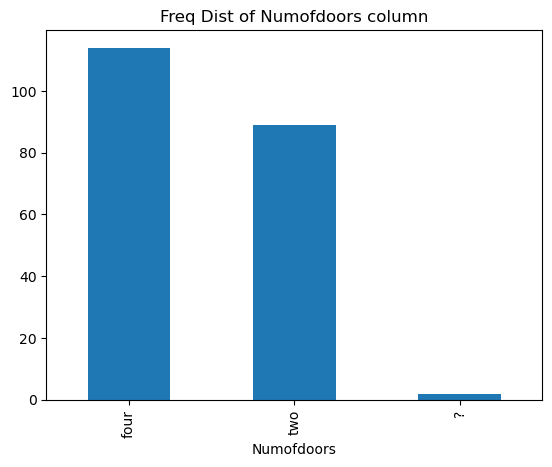

In [349]:
# Plotting bar graph for Numofdoors
df.Numofdoors.value_counts().plot.bar(title = "Freq Dist of Numofdoors column")

* From the above graph we can do frequency analysis that, Cars featuring four doors were the most frequently produced, with 114 occurrences, while two-door cars were manufactured 89 times.

<Axes: title={'center': 'Freq Dist of BodyStyle column'}, xlabel='BodyStyle'>

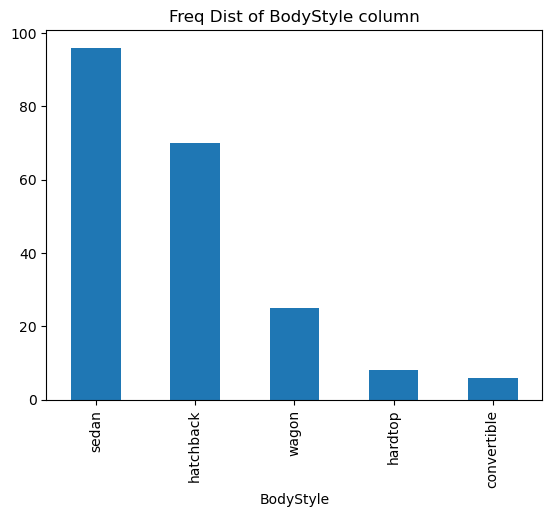

In [350]:
# Plotting bar graph for BodyStyle
df.BodyStyle.value_counts().plot.bar(title = "Freq Dist of BodyStyle column")

* Sedan body style cars were the most common, appearing 114 times, whereas convertible cars were observed only 6 times.

<Axes: title={'center': 'Freq Dist of DriveWheels column'}, xlabel='DriveWheels'>

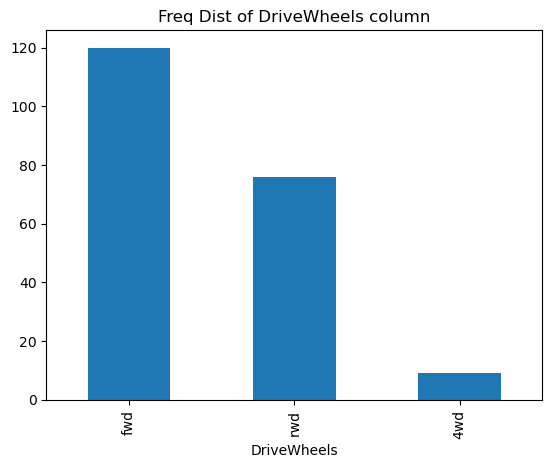

In [351]:
# Plotting bar graph for DriveWheels
df.DriveWheels.value_counts().plot.bar(title = "Freq Dist of DriveWheels column")

* The most common DriveWheels type is front-wheel drive, whereas four-wheel drive is the least common.

<Axes: title={'center': 'Freq Dist of EngineLocation column'}, xlabel='EngineLocation'>

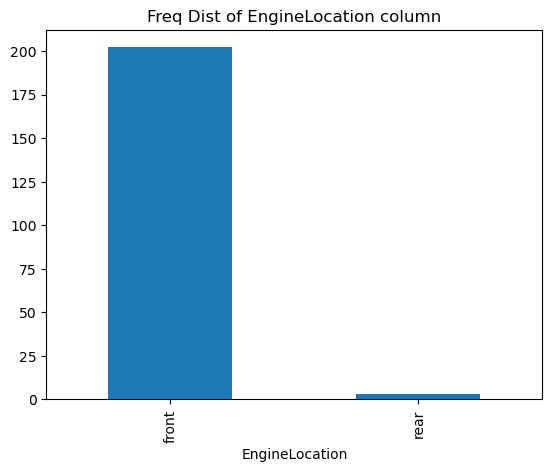

In [352]:
# Plotting bar graph for EngineLocation
df.EngineLocation.value_counts().plot.bar(title = "Freq Dist of EngineLocation column")

* The engine location data shows that the front engine configuration is overwhelmingly more common, with 202 occurrences, compared to the rear engine setup, which only appears 3 times.

<Axes: title={'center': 'Freq Dist of EngineType column'}, xlabel='EngineType'>

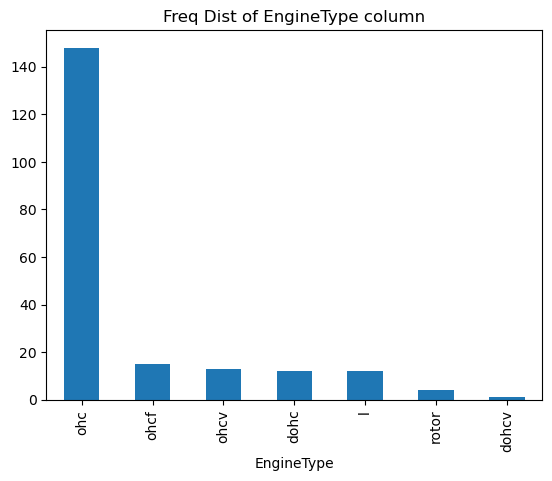

In [353]:
# Plotting bar graph for EngineType
df.EngineType.value_counts().plot.bar(title = "Freq Dist of EngineType column")

* Frequency of engine types, the 'ohc' type is the most common with 148 occurrences, while 'dohcv' is the least frequent, appearing only once.

<Axes: title={'center': 'Freq Dist of Numofcylinders column'}, xlabel='Numofcylinders'>

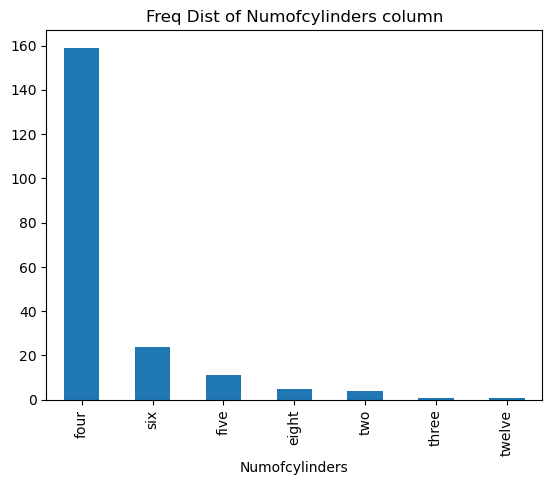

In [354]:
# Plotting bar graph for Numofcylinders
df.Numofcylinders.value_counts().plot.bar(title = "Freq Dist of Numofcylinders column")

* Frequency of Numofcylinders, the 'four' type is the most common with 159 occurrences, while 'twelve' is the least frequent, appearing only once.

<Axes: title={'center': 'Freq Dist of FuelSystem column'}, xlabel='FuelSystem'>

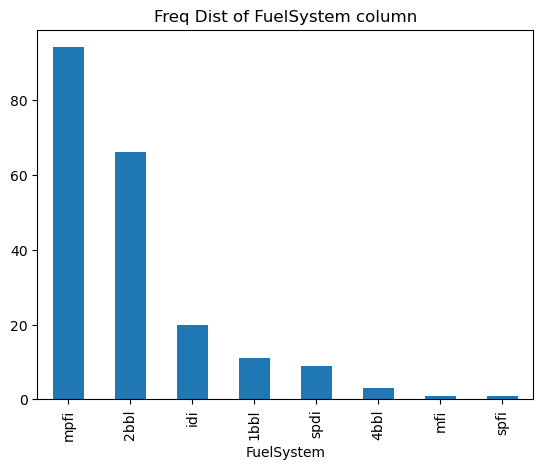

In [271]:
# Plotting bar graph for FuelSystem
df.FuelSystem.value_counts().plot.bar(title = "Freq Dist of FuelSystem column")

* Frequency of FuelSystem, the 'mpfi' type is the most common with 94 occurrences, while 'spfi' is the least frequent, appearing only once.

### Bivariate Analysis

#### Numerical vs Numerical

##### Engine size vs Bore

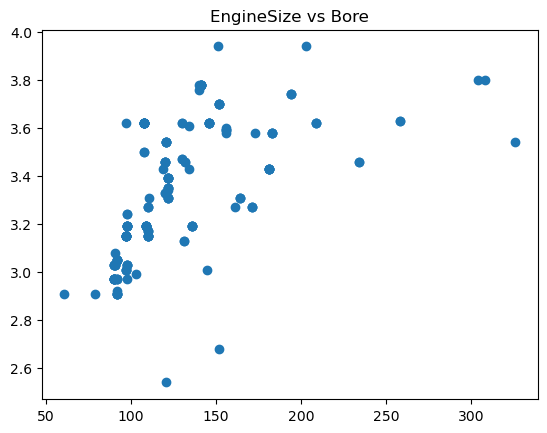

In [355]:
# Using plt.scatter to plot scatter plot by considering Engine size on x-axis and Bore as y-axis
plt.scatter(x = 'EngineSize', y = 'Bore', data = df)
#plt.title to plot the title of the graph
plt.title("EngineSize vs Bore")
plt.show()

In [356]:
corrEngineSize_Bore = df['EngineSize'].corr(df['Bore'])
print("Correlation between EngineSize and Bore:", corrEngineSize_Bore)

Correlation between EngineSize and Bore: 0.5940902040221416


##### The correlation between Enginesize and Bore is not so high showing the less dependancy of enginesize on Bore.

##### EngineSize vs Horsepower

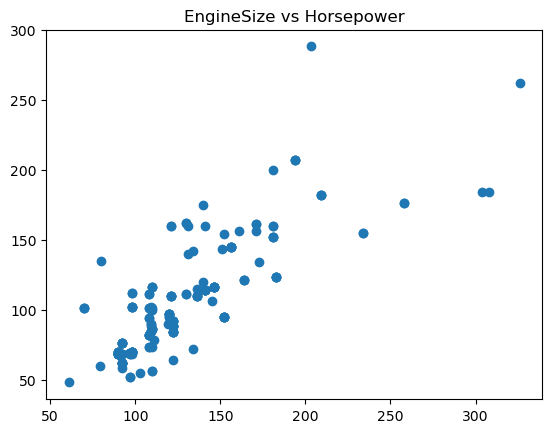

In [357]:
# Using plt.scatter to plot scatter plot by considering Engine size on x-axis and Horsepower on y-axis
plt.scatter(x = 'EngineSize', y = 'Horsepower', data = df)
#plt.title to plot the title of the graph
plt.title("EngineSize vs Horsepower")
plt.show()

In [358]:
corrEngineSize_Horsepower = df['EngineSize'].corr(df['Horsepower'])
print("Correlation between EngineSize and Horsepower:", corrEngineSize_Horsepower)

Correlation between EngineSize and Horsepower: 0.8107725559959597


##### Larger engines typically produce more horsepower and this statement is proved true from the above graph and Correlation Value.

##### EngineSize vs Price

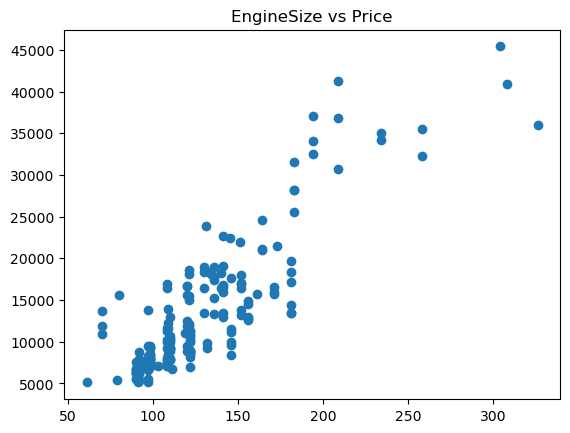

In [359]:
# Using plt.scatter to plot scatter by considering Engine size on x-axis and Price as y-axis
plt.scatter(x = 'EngineSize', y = 'Price', data = df)
#plt.title to plot the title of the graph
plt.title("EngineSize vs Price")
plt.show()

In [39]:
corrEngineSize_Price = df['EngineSize'].corr(df['Price'])
print("Correlation between EngineSize and Price:", corrEngineSize_Price)

Correlation between EngineSize and Price: 0.8723351674455198


##### Enginesize and price have high correlation between each other showing a high positive and direct correlation between each other. The graph shows the same linear dependancy of the values.

##### Horsepower vs Price

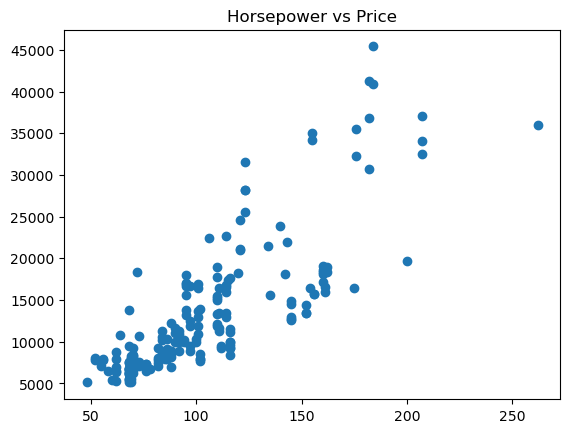

In [360]:
# Using plt.scatter for scatter plot by considering Horsepower on x-axis and Price on y-axis
plt.scatter(x = 'Horsepower', y = 'Price', data = df)
#plt.title to plot the title of the graph
plt.title("Horsepower vs Price")
plt.show()

In [361]:
corrHorsepower_Price = df['Horsepower'].corr(df['Price'])
print("Correlation between Horsepower and Price:", corrHorsepower_Price)

Correlation between Horsepower and Price: 0.8105330821322059


##### The analysis, supported by a graph and correlation coefficient, reveals a positive relationship between vehicle horsepower and price, indicating that cars with higher horsepower tend to be more expensive due to the premium placed on performance.





##### WheelBase vs Length

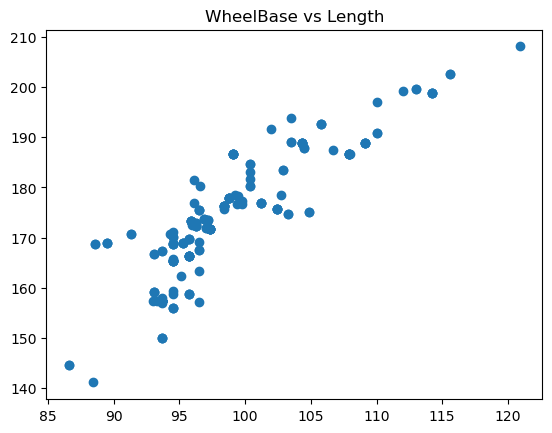

In [362]:
# Using plt.scatter for scatter plot by considering WheelBase on x-axis and Length on y-axis
plt.scatter(x = 'WheelBase', y = 'Length', data = df)
#plt.title to plot the title of the graph
plt.title("WheelBase vs Length")
plt.show()

In [363]:
corrWheelBase_Length = df['WheelBase'].corr(df['Length'])
print("Correlation between WheelBase and Length:", corrWheelBase_Length)

Correlation between WheelBase and Length: 0.874587475964263


##### Wheelbase is the distance between front and rare tyre. So, a longer wheelbase correlates with a longer overall vehicle length. From the above graph and correlation value we can understand that wheelbase and length are dependent on each other.

##### CityMpg vs HighwayMpg

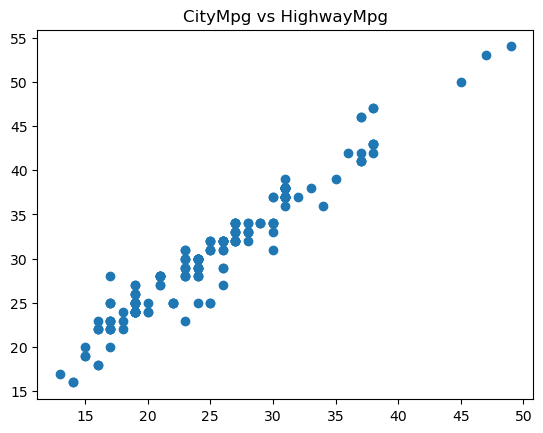

In [364]:
# Using plt.scatter for scatter plot by considering CityMpg on x-axis and HighwayMpg on y-axis
plt.scatter(x = 'CityMpg', y = 'HighwayMpg', data = df)
#plt.title to plot the title of the graph
plt.title("CityMpg vs HighwayMpg")
plt.show()

In [365]:
corrCity_HighwayMpg = df['CityMpg'].corr(df['HighwayMpg'])
print("Correlation between CityMpg and HighwayMpg:", corrCity_HighwayMpg)

Correlation between CityMpg and HighwayMpg: 0.9713370423425061


##### Vehicles with higher city MPG usually also have higher highway MPG From the above graph and correation value we can analyse that the statement is true. Correlation value of 0.97 shows the high relation between the attributes CityMpg and HighwayMpg

##### EngineSize vs CurbWeight

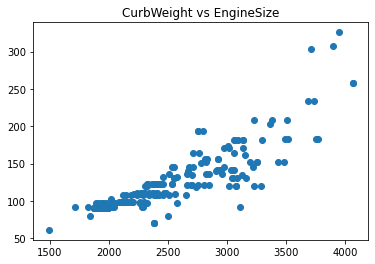

In [46]:
# Using plt.scatter for scatter plot by considering CurbWeight on x-axis and EngineSize on y-axis
plt.scatter(x = 'CurbWeight', y = 'EngineSize', data = df)
#plt.title to plot the title of the graph
plt.title("CurbWeight vs EngineSize")
plt.show()

In [96]:
corrCurbWeight_EngineSize = df['CurbWeight'].corr(df['EngineSize'])
print("Correlation between CurbWeight and EngineSize:", corrCurbWeight_EngineSize)

Correlation between CurbWeight and EngineSize: 0.8505940734262771


##### Curbweight is about the standard vehicle weight. Heavier vehicles often have larger engines and from the above graph and correlation value  we can understand that both are directly dependent on each other.

##### EnigineSize vs Stroke

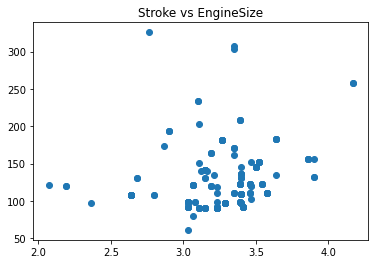

In [48]:
# Using plt.scatter for scatter plot by considering Stroke on x-axis and EngineSize on y-axis
plt.scatter(x = 'Stroke', y = 'EngineSize', data = df)
#plt.title to plot the title of the graph
plt.title("Stroke vs EngineSize")
plt.show()

In [49]:
corrStroke_EngineSize = df['Stroke'].corr(df['EngineSize'])
print("Correlation between Stroke and EngineSize:", corrStroke_EngineSize)

Correlation between Stroke and EngineSize: 0.2066745886827291


##### Correlation between stroke and Enginesize is low showing the less relation between stroke and enginesize and positive correlation says they are directly dependent on each other but less dependent.

##### CompressionRatio vs CityMpg

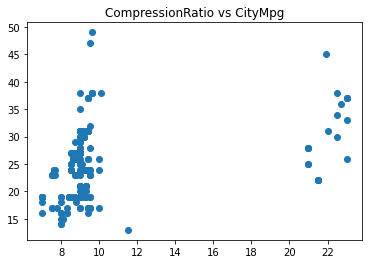

In [50]:
# Using plt.scatter for scatter plot by considering CompressionRatio on x-axis and CityMpg on y-axis
plt.scatter(x = 'CompressionRatio', y = 'CityMpg', data = df)
#plt.title to plot the title of the graph
plt.title("CompressionRatio vs CityMpg")
plt.show()

In [51]:
corrCRatio_CityMpg = df['CompressionRatio'].corr(df['CityMpg'])
print("Correlation between CompressionRatio and CityMpg:", corrCRatio_CityMpg)

Correlation between CompressionRatio and CityMpg: 0.32470142452073286


##### In the above graph we can observe there are outliers and also the correlation values is positive 0.3 showing very less dependancy between the variables CompressionRatio and CityMpg. 

##### WheelBase vs CurbWeight

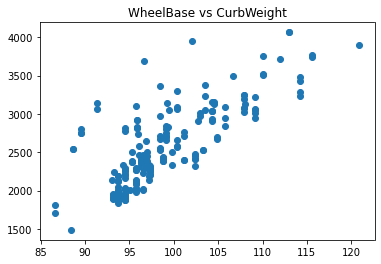

In [52]:
# Using plt.scatter for scatter plot by considering WheelBase on x-axis and CurbWeight on y-axis
plt.scatter(x = 'WheelBase', y = 'CurbWeight', data = df)
#plt.title to plot the title of the graph
plt.title("WheelBase vs CurbWeight")
plt.show()

In [53]:
corrHorsepower_CurbWeight = df['Horsepower'].corr(df['CurbWeight'])
print("Correlation between EngineSize and CurbWeight:", corrHorsepower_CurbWeight)

Correlation between EngineSize and CurbWeight: 0.7510342745864709


##### The graph and correlation value indicate a linear dependence between horsepower and curb weight, with some outliers present, suggesting that as one increases, so does the other, although with exceptions to the general trend.

##### Price vs HighwayMpg

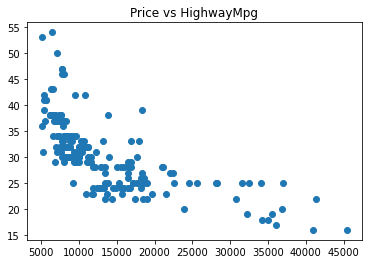

In [54]:
# Using plt.scatter for scatter plot by considering Price on x-axis and HighwayMpg on y-axis
plt.scatter(x = 'Price', y = 'HighwayMpg', data = df)
#plt.title to plot the title of the graph
plt.title("Price vs HighwayMpg")
plt.show()

In [55]:
corrPrice_HighwayMpg = df['Price'].corr(df['HighwayMpg'])
print("Correlation between Price and HighwayMpg:", corrPrice_HighwayMpg)

Correlation between Price and HighwayMpg: -0.704692265058953


##### From the above graph we can infer that Price of a car and HighwayMpg are inversely related to each other. In graph this relation is shown with the linear decrement of the graph and negative correlation value 

##### Length vs Width

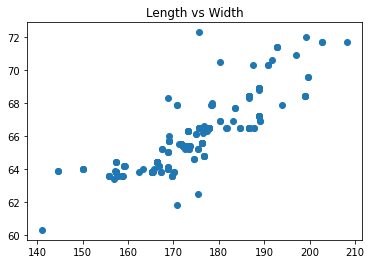

In [56]:
# Using plt.scatter for scatter plot by considering Length on x-axis and Width as y-axis
plt.scatter(x = 'Length', y = 'Width', data = df)
#plt.title to plot the title of the graph
plt.title("Length vs Width")
plt.show()

In [57]:
corrLength_Width = df['Length'].corr(df['Width'])
print("Correlation between Length and Width:", corrLength_Width)

Correlation between Length and Width: 0.841118268481846


##### From the above graph and correlation value we can infer that Length and width are directly related to each other and this can be inferred from positive linear graph and positive correlation value.

##### PeakRpm vs Horsepower

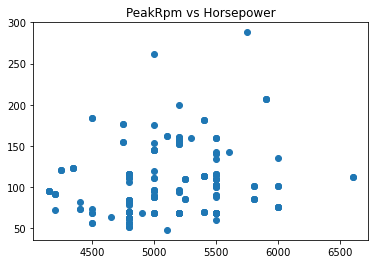

In [58]:
# Using plt.scatter for scatter plot by considering PeakRpm on x-axis and Horsepower on y-axis
plt.scatter(x = 'PeakRpm', y = 'Horsepower', data = df)
#plt.title to plot the title of the graph
plt.title("PeakRpm vs Horsepower")
plt.show()

In [59]:
corrPeakRpm_Horsepower = df['PeakRpm'].corr(df['Horsepower'])
print("Correlation between PeakRpm and Horsepower:", corrPeakRpm_Horsepower)

Correlation between PeakRpm and Horsepower: 0.13097080454313337


##### The graph and Correlation value between PeakRpm and Horsepower is positive. Showing a little positive relation between each other and also we can find that the values in the graph is scattered 

### Numerical vs Categorical

##### FuelType vs CityMpg

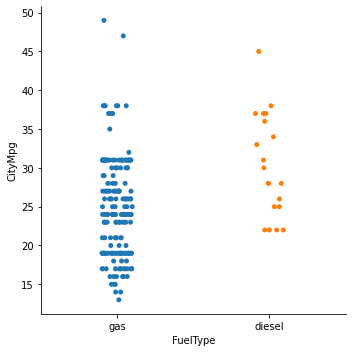

In [60]:
#creating a categorical plot taking FuelType on x-axis and CityMpg on y-axis
sns.catplot(data=df, x="FuelType", y="CityMpg")

##### From the above graph we can observe that Diesel vehicles have higher city MPG compared to gasoline vehicles.

##### Aspiration vs Horsepower

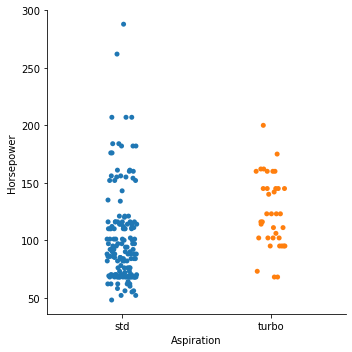

In [61]:
#creating a categorical plot taking Aspiration on x-axis and CityMpg on y-axis
sns.catplot(data=df, x="Aspiration", y="Horsepower")
plt.show()

##### Turbocharged (aspirated) engines have higher horsepower when compared to most of the vehicles with standard aspiration

##### BodyStyle vs CurbWeight

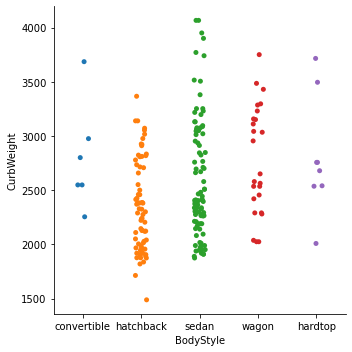

In [62]:
#creating a categorical plot taking BodyStyle on x-axis and CurbWeight on y-axis
sns.catplot(data=df, x="BodyStyle", y="CurbWeight")

##### From the above catplot we can observe that sedan bodystyle has higher curbweight when compared to convertible, hatchback, wagon or hardtop.

##### DriveWheels vs Price

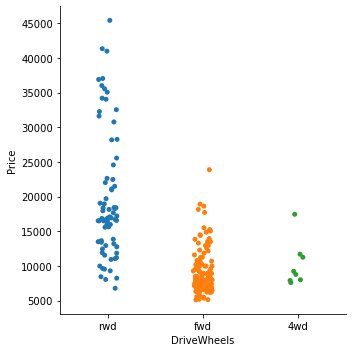

In [63]:
#creating a categorical plot taking DriveWheels on x-axis and Price on y-axis
sns.catplot(data=df, x="DriveWheels", y="Price")

##### From the above graph we can understand that Vehicles with rear-wheel drive (RWD)  is priced higher than those with front-wheel drive (FWD) or all-wheel drive (4WD)

##### EngineSize vs Price

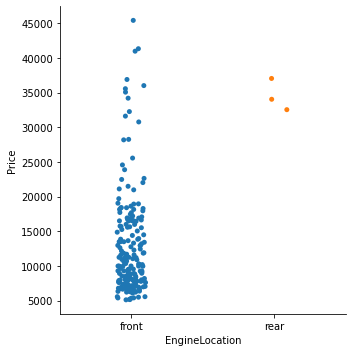

In [64]:
#creating a categorical plot taking EngineLocation on x-axis and Price on y-axis
sns.catplot(data=df, x="EngineLocation", y="Price")

##### Front-engine vehicles are often more expensive and highly made and rear are less made but costlier than most of the Front Engine vehicles.

##### EngineType vs Horsepower

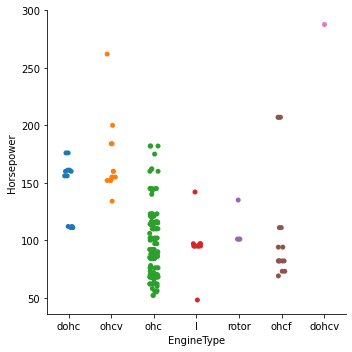

In [65]:
#creating a categorical plot taking EngineType on x-axis and Horsepower on y-axis
sns.catplot(data=df, x="EngineType", y="Horsepower")

##### From the above graph we can understand that 'ohc' enginetype with Horsepower range 50 to 100 are highly made and dohcv has the highest horsepower. 

##### FuelSystem vs HighwayMpg

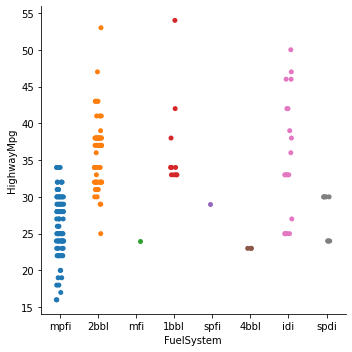

In [66]:
#creating a categorical plot taking FuelType on x-axis and HighwayMpg on y-axis
sns.catplot(data=df, x="FuelSystem", y="HighwayMpg")

##### Fuelsystem with mpfi has HighwayMpg around 25-30 and 2bbl fuelsystem has Highwaympg around 35 to 40.
##### Most of the vehicles are manufactured with mpfi and 2bbl fuel system, vehicles with other FuelSystems are rarely manufactured

##### Make vs Price

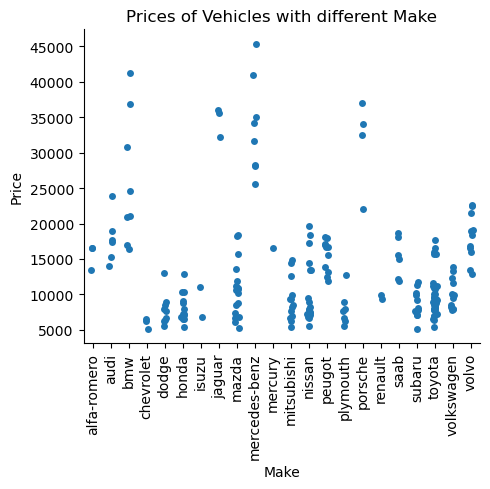

In [97]:
#creating a categorical plot taking Make on x-axis and Price on y-axis
sns.catplot(data=df, x="Make", y="Price")
plt.title('Prices of Vehicles with different Make')
plt.xlabel('Make')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Vehicles with Mercedes-Benz, Jaguar and Porsche make are premium vehicles with highes price.
##### Vehicles with Chevrolet, Dodge, Honda, Mazda, Mitsubishi, Toyota and Nissan have prices starting from the range of 5000

##### Numofcylinders vs EngineSize

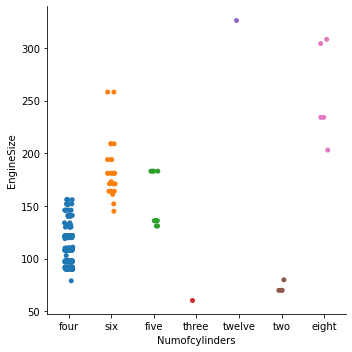

In [68]:
#creating a categorical plot taking Numofcylinders on x-axis and EngineSize on y-axis
sns.catplot(data=df, x="Numofcylinders", y="EngineSize")

##### From the above graph we can find that, as the number of cylinders increase, enginesize increases and also we can observe that four cylinders are highly made.

##### Aspiration vs CityMpg

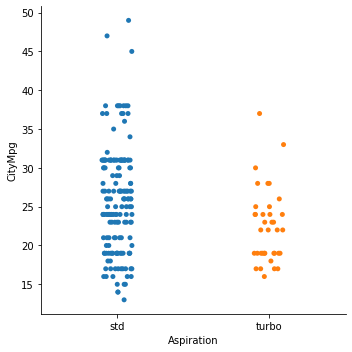

In [69]:
#creating a categorical plot taking Aspiration on x-axis and CityMpg on y-axis
sns.catplot(data=df, x="Aspiration", y="CityMpg")

##### From the above graph aspiration value std has higher CityMpg when compared to turbo. From this we can infer that turbo consumes more gas than std.

##### BodyStyle vs Length

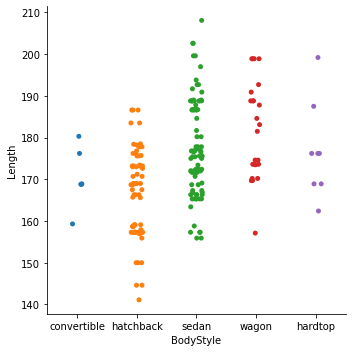

In [70]:
#creating a categorical plot taking BodyStyle on x-axis and Length on y-axis
sns.catplot(data=df, x="BodyStyle", y="Length")


##### From the above catplot we can observe that sedan bodystyle has higher length when compared to convertible, hatchback, wagon or hardtop.


##### DriveWheels vs CurbWeight

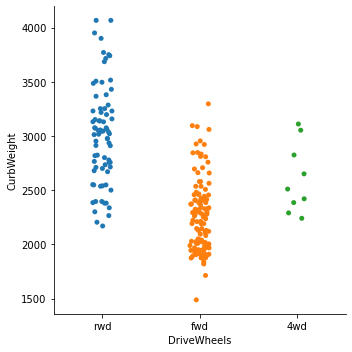

In [71]:
#creating a categorical plot taking DriveWheels on x-axis and CurbWeight on y-axis
sns.catplot(data=df, x="DriveWheels", y="CurbWeight")

##### Rear-wheel drive (RWD) has higher Curbweight than those with front-wheel drive (FWD) or all-wheel drive (4WD)

### Categorical vs Cateorical

##### FuelType vs Aspiration

<AxesSubplot:xlabel='FuelType'>

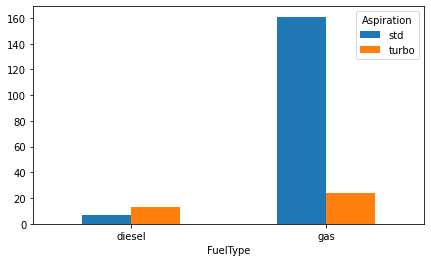

In [72]:
CrosstabResult=pd.crosstab(index=df['FuelType'],columns=df['Aspiration'])

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

##### From the above graph we can infer that based on the cross-tabulation graph provided, it's evident that vehicles with gas fuel type predominantly have the standard aspiration.

##### Make vs FuelType

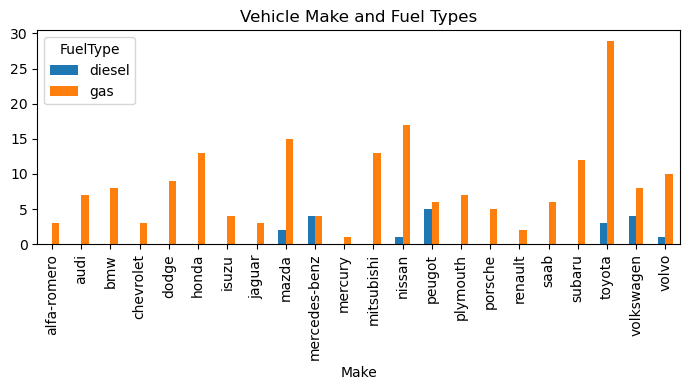

In [99]:
CrosstabResult=pd.crosstab(index=df['Make'],columns=df['FuelType'])
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.title('Vehicle Make and Fuel Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### From the above graph we can infer that all the Vehicle manufacturers have gas as the dominant fuel type.

##### BodyStyle vs DriveWheels

<AxesSubplot:xlabel='BodyStyle'>

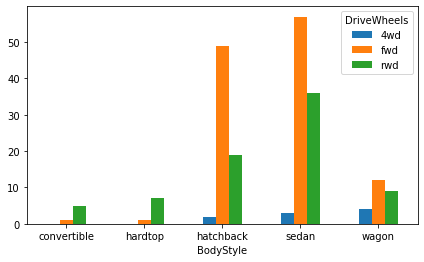

In [74]:
CrosstabResult=pd.crosstab(index=df['BodyStyle'],columns=df['DriveWheels'])

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

##### From the above graph we can infer that Sedans with front-wheel drive are produced more frequently than any other body style, while convertibles are the least common among them.

##### EngineLocation vs BodyStyle

<AxesSubplot:xlabel='EngineLocation'>

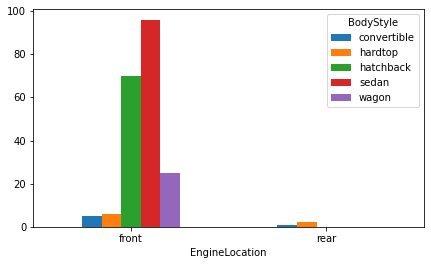

In [75]:
CrosstabResult=pd.crosstab(index=df['EngineLocation'],columns=df['BodyStyle'])

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

##### From the above graph we can infer that Sedans with engine location in the front are produced more frequently than any other body style, while convertibles are the least common among them.

##### Numofdoors vs BodyStyle

<AxesSubplot:xlabel='Numofdoors'>

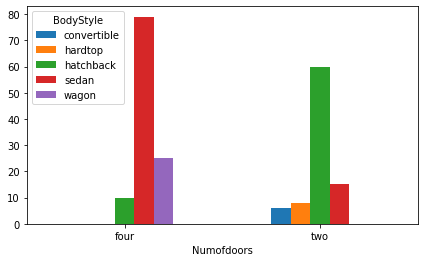

In [76]:
CrosstabResult=pd.crosstab(index=df['Numofdoors'],columns=df['BodyStyle'])

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

##### From the above graph we can infer that Sedans with four wheels are produced more frequently than any other body style.

##### FuelType vs EngineType

<AxesSubplot:xlabel='FuelType'>

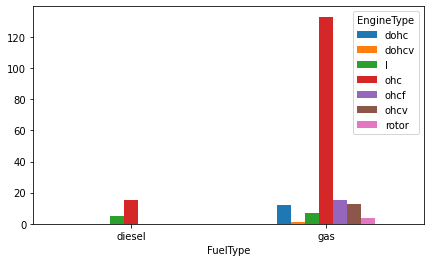

In [77]:
CrosstabResult=pd.crosstab(index=df['FuelType'],columns=df['EngineType'])

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

##### From the above graph we can infer that Gas with EngineType ohc are produced more frequently than any other Fuel type, while dohcv are the least common among them.

##### Aspiration vs BodyStyle

<AxesSubplot:xlabel='Aspiration'>

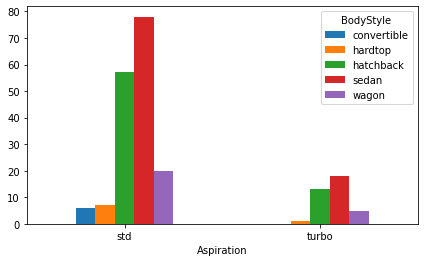

In [78]:
CrosstabResult=pd.crosstab(index=df['Aspiration'],columns=df['BodyStyle'])

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

##### From the above graph we can infer that Standard aspiration with bodystyle sedan are more frequently prduced.

##### DriveWheels vs EngineLocation

<AxesSubplot:xlabel='DriveWheels'>

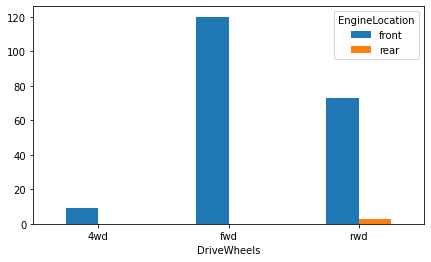

In [79]:
CrosstabResult=pd.crosstab(index=df['DriveWheels'],columns=df['EngineLocation'])

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

##### Forward drivewheels with engine location frot are produced more frequently than any other body style.

##### FuelSystem vs FuelType

<AxesSubplot:xlabel='FuelSystem'>

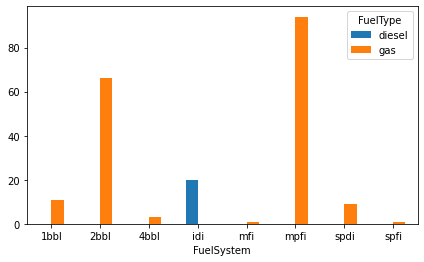

In [80]:
CrosstabResult=pd.crosstab(index=df['FuelSystem'],columns=df['FuelType'])

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

##### Fuelsystem mpfi with fuel type gas are produced more frequently than any other fueltype.

##### EngineType vs DriveWheels

<AxesSubplot:xlabel='EngineType'>

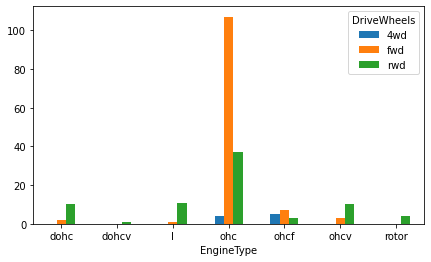

In [81]:
CrosstabResult=pd.crosstab(index=df['EngineType'],columns=df['DriveWheels'])

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

##### Forwad Drive wheels with engine type ohc are produced more frequently than any other DriveWheels, while Engine type dohcv are the least common among them.

##### EngineLocation vs Aspiration

<AxesSubplot:xlabel='EngineLocation'>

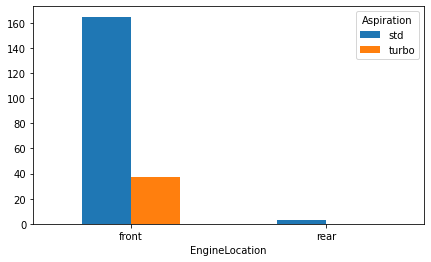

In [82]:
CrosstabResult=pd.crosstab(index=df['EngineLocation'],columns=df['Aspiration'])
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

##### Standard aspiration with front engine location are produced more frequently than turbo.

### Multivariate Analysis

#### Correlation Matrix using Heatmap

<AxesSubplot:>

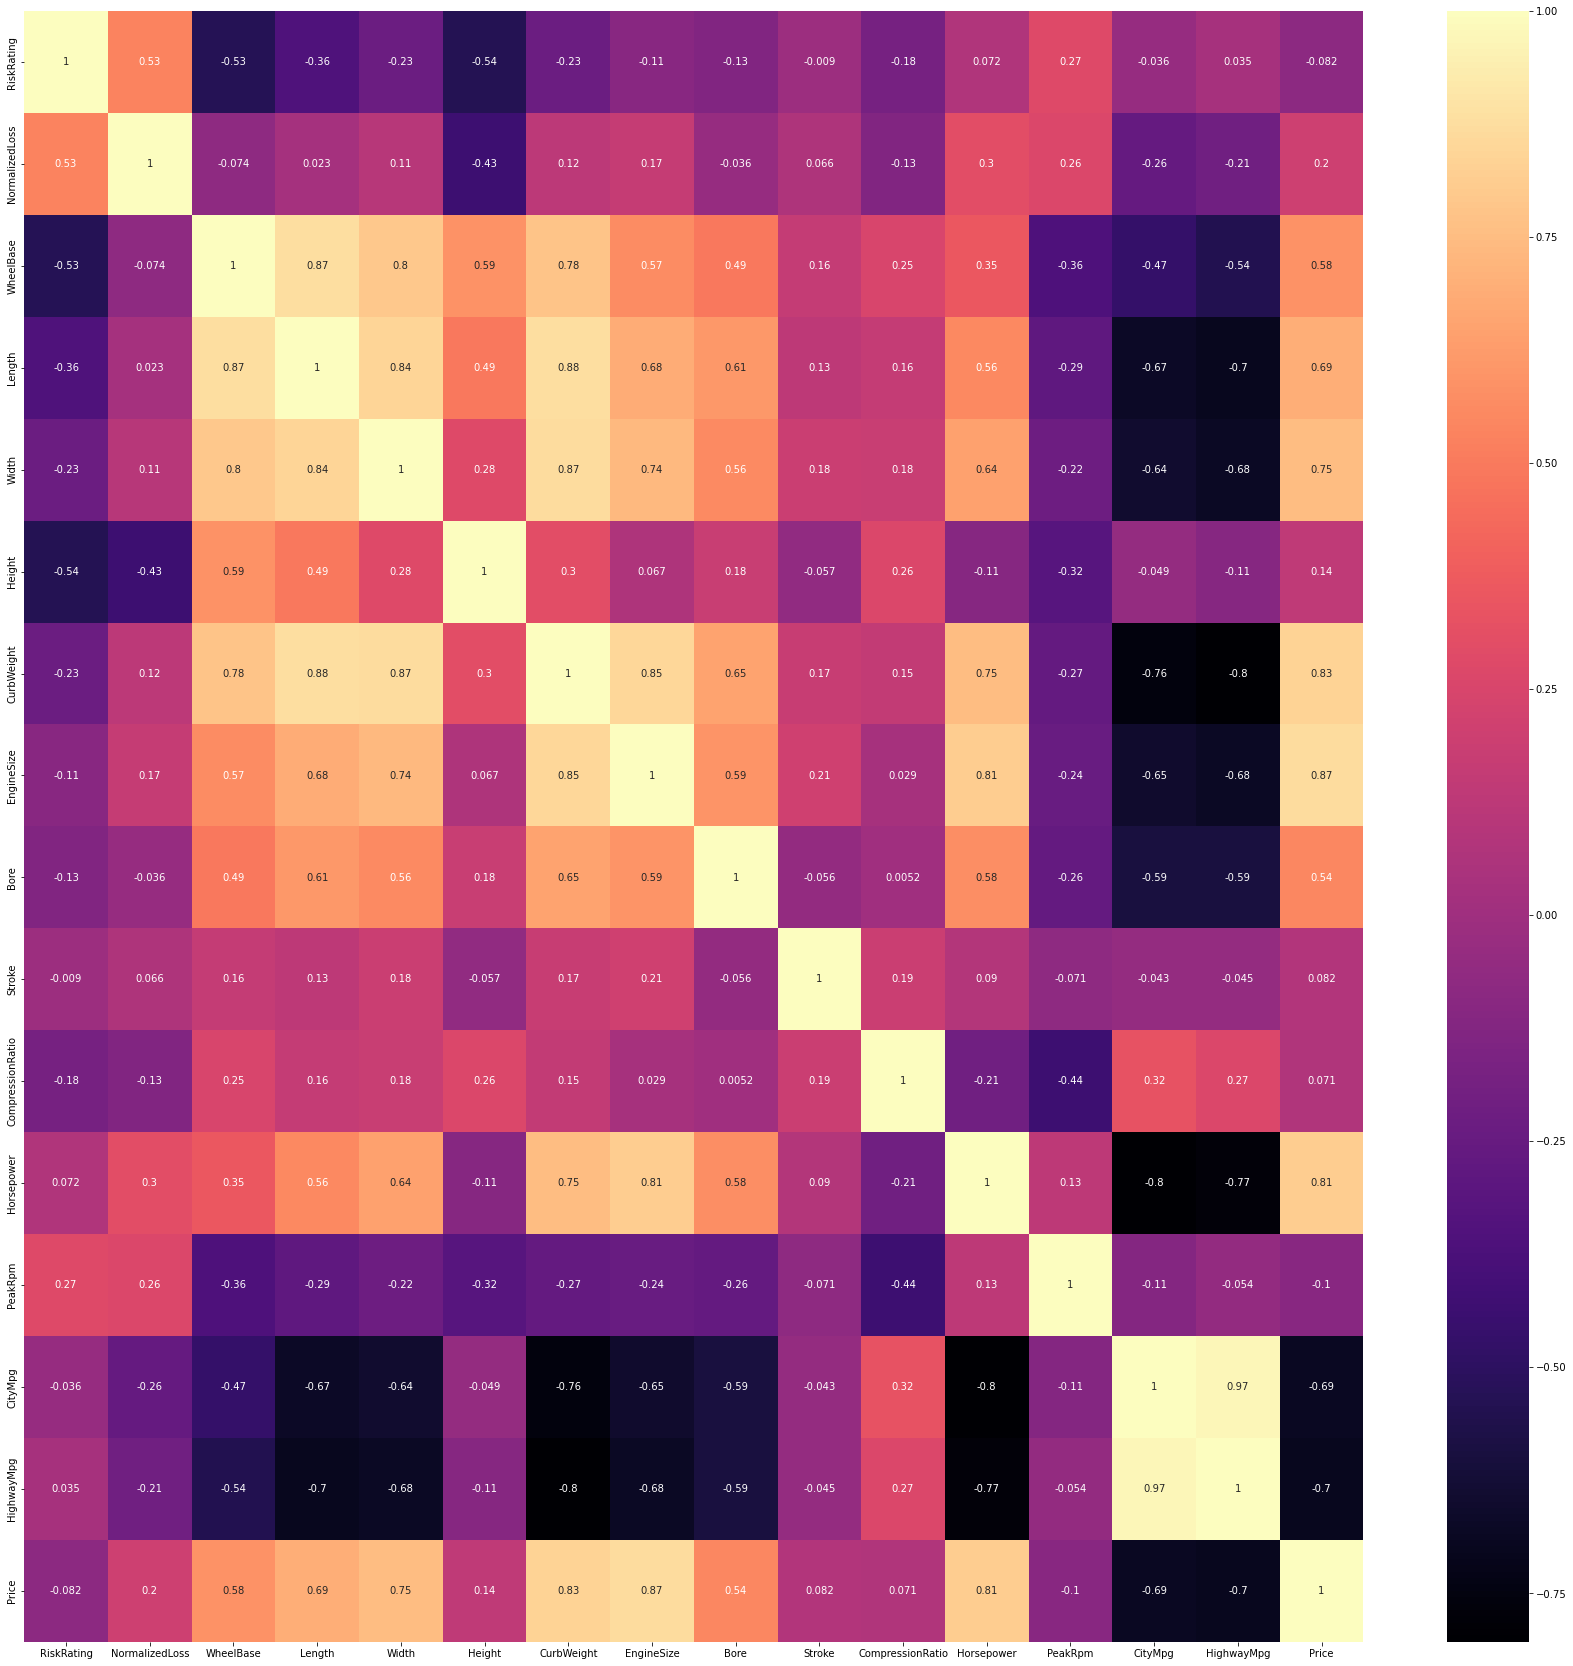

In [83]:
plt.figure(figsize=(30, 30))
#constructing heat map using sns.heatmap
sns.heatmap(df[["Symboling", "NormalizedLoss", "WheelBase","Length",
              "Width","Height","CurbWeight",
              "EngineSize","Bore","Stroke","CompressionRatio",
              "Horsepower","PeakRpm","CityMpg","HighwayMpg","Price"]].corr(),  annot = True, cmap = "magma")

* From the above heatmap we can infer that:
  WheelBase and Length, WheelBase and Width, Width and Length, CurbWeight and Length, CurbWeight and Width, CurbWeight and EngineSize,
  EngineSize and Price, CityMpg and HighwayMpg are highly correlated.
  
* Price and CityMpg, Price and HighwayMpg, HighwayMpg and Stroke, HighwayMpg and Horsepower, CityMpg and Height, Stroke and Height are negatively correlated.


##### Pairplot between Numerical Features

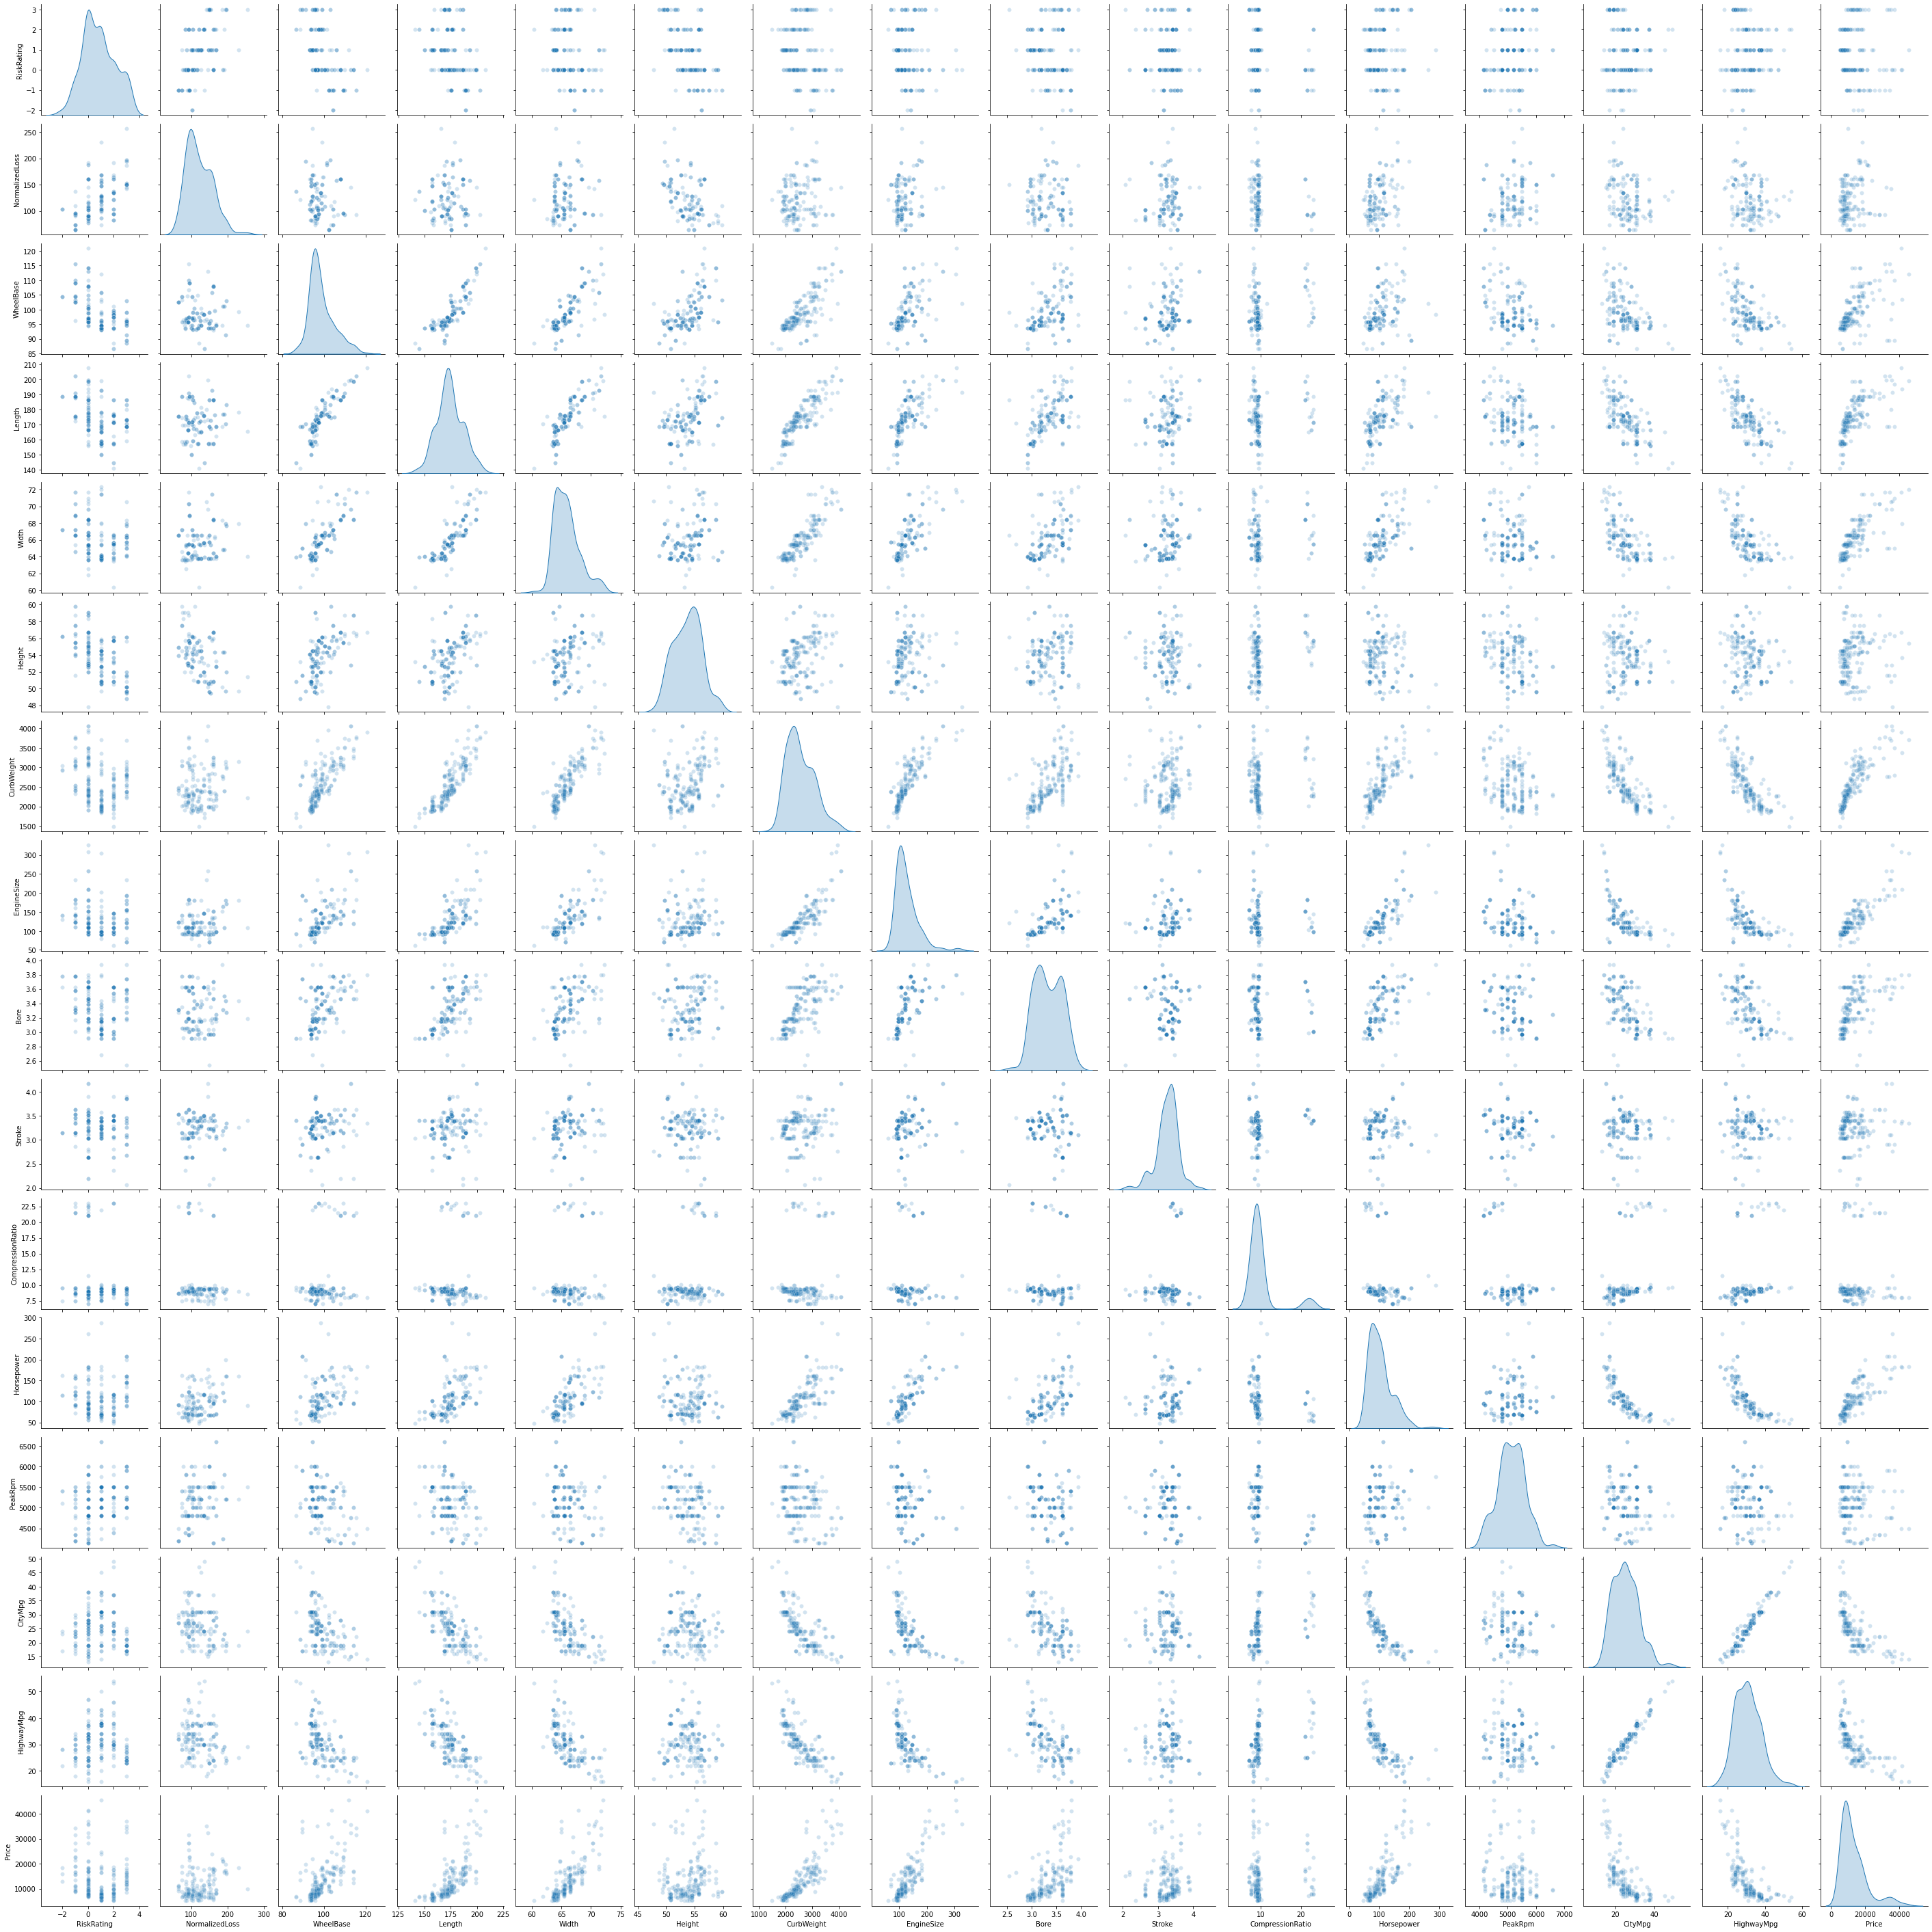

In [84]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2})

##### Plot between BodyStyle, CurbWeight and Width

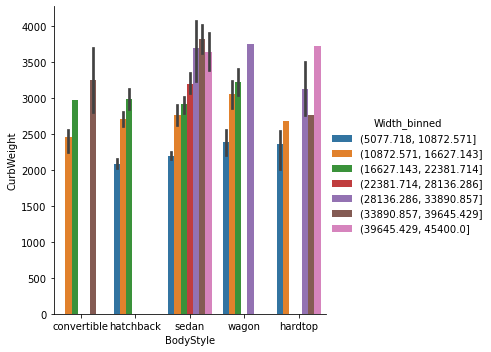

In [86]:
# Assuming 'Width' is a column in df and you want to bin it
# Defining the number of bins
df['Width_binned'] = pd.cut(df['Price'], bins=7)
#Drawing a catplot
sns.catplot(x='BodyStyle', y='CurbWeight', hue='Width_binned',
               kind='bar', data=df);

##### Vehicles with sedan Bodystyle have the greater CurbWeight and relatively larger width while vehicles with Hatchback bodystyle have both lesser width and CurbWeight

##### Plot between FuelType, CityMpg and Wdith

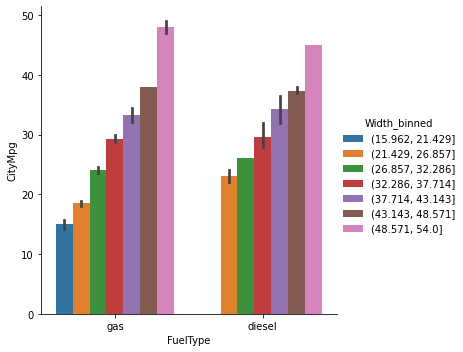

In [87]:
# Assuming 'Width' is a column in df and you want to bin it
# Defining the number of bins
df['Width_binned'] = pd.cut(df['HighwayMpg'], bins=7)
#Drawing a catplot
sns.catplot(x='FuelType', y='CityMpg', hue='Width_binned',
               kind='bar', data=df);

##### Vehicles with gas fueltype have the highest width and highest CityMpg

##### Plot between Numofcylinders, EngineSize and Width

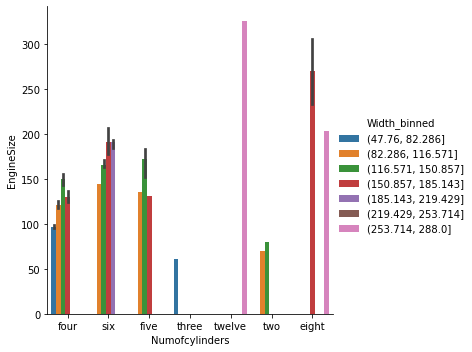

In [88]:
df['Width_binned'] = pd.cut(df['Horsepower'], bins=7)
#Drawing a catplot
sns.catplot(x='Numofcylinders', y='EngineSize', hue='Width_binned',
               kind='bar', data=df);

##### The above plot signifies that for the Vehicles with more number of cylinders have greater widths to accommodate them and consequently have higher Engine size.

##### Plot between WheelBase, Length and Width

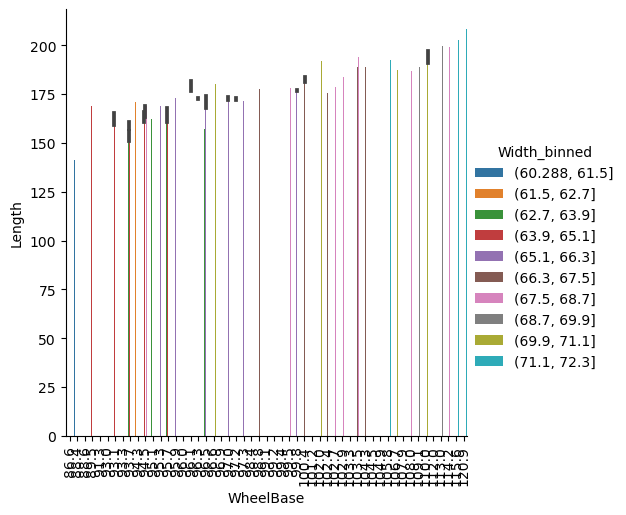

In [100]:
# Assuming 'Width' is a column in df and you want to bin it
# Defining the number of bins
df['Width_binned'] = pd.cut(df['Width'], bins=10)

# Now you can use the binned 'Width' for hue in your catplot
sns.catplot(x="WheelBase", y="Length", hue="Width_binned", kind="bar", data=df)
plt.xticks(rotation=90)
plt.show()


##### Plot between PeakRpm, CompressionRatio and Horsepower

<Figure size 1600x2500 with 0 Axes>

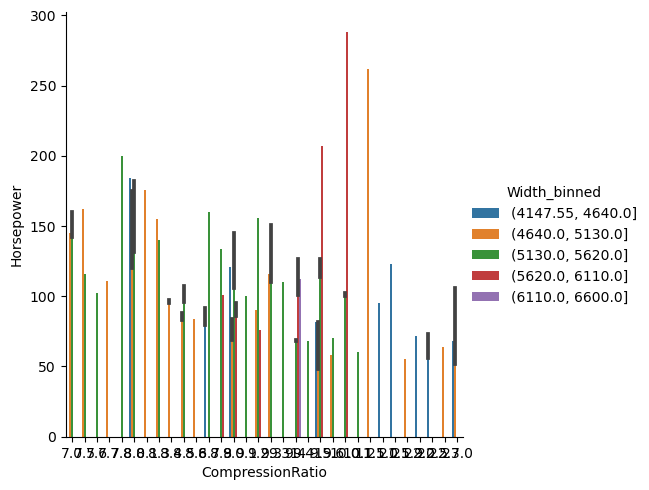

In [103]:
# Assuming 'Width' is a column in df and you want to bin it
# Defining the number of bins
plt.figure(figsize=(16,25))
df['Width_binned'] = pd.cut(df['PeakRpm'], bins=5)
#Drawing a catplot
sns.catplot(x='CompressionRatio', y='Horsepower', hue='Width_binned',
               kind='bar', data=df);

##### Plot between Aspiration, Horsepower and EngineType

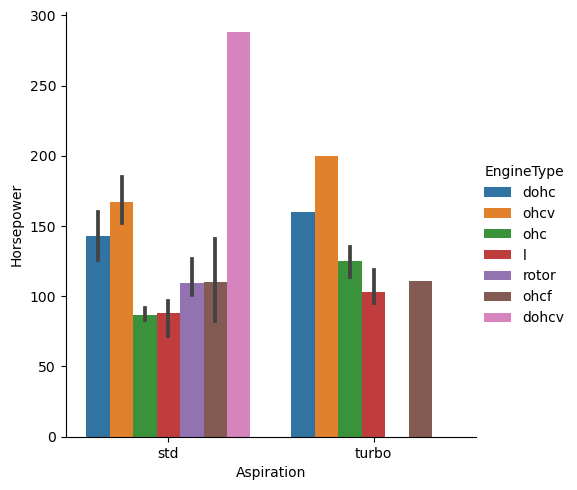

In [104]:
#Drawing a catplot
sns.catplot(x='Aspiration', y='Horsepower', hue='EngineType',
               kind='bar', data=df);

##### From the above plot we can infer that EngineType dohcv with standard Aspiration has the highest Horsepower
##### ohc Enginetype with standard aspiration has the least Horsepower

* The decision to apply feature scaling to numeric variables depends on the characteristics of the data and the machine learning algorithms we intend to use. For the given dataset below are the feature scaling techiniques that  can be applied.

* Symboling: It represents risk rating ranging from -3 to +3. As it represents the risk category, it can be considered as Categorical/Ordinal type.
It might not require traditional feature scaling like Min-Max or Standardization. As it is categorical column we need to convert them to dummy features.

* NormalizedLoss: This feature is already normalized. Depending on the specific requirements of the machine learning algorithm we may or may not need to perform additional scaling on this variable. If needed we can perform Standardization on this feature.

* WheelBase:This feature represents the physical dimensions of vehicles. For the given dataset range of WheelBase values are 86 to 120. Since they are measured in different units e.g., inches, feet, centimeter, they may have different ranges and benefit from feature scaling to ensure that its magnitudes do not disproportionately influence the model. We can perform either Standardization or Min-Max scaling on this feature.

* Length: This feature represents the length of vehicles. For the given dataset range of Length values are 141 to 208. Since they are measured in different units e.g., inches, feet, centimeter, they may have different ranges and benefit from feature scaling to ensure that its magnitudes do not disproportionately influence the model. We can perform either Standardization or Min-Max scaling on this feature.

* Width: This feature represents the width of vehicles. For the given dataset range of Width values are 60 to 72. Since they are measured in different units e.g., inches, feet, centimeter, they may have different ranges and benefit from feature scaling to ensure that its magnitudes do not disproportionately influence the model. We can perform either Standardization or Min-Max scaling on this feature.

* Height: This feature represents the height of vehicles. For the given dataset range of Width values are 47 to 59. Since they are measured in different units e.g., inches, feet, centimeter, they may have different ranges and benefit from feature scaling to ensure that its magnitudes do not disproportionately influence the model. We can perform either Standardization or Min-Max scaling on this feature.

* CurbWeight: This feature represents the weight of vehicles. For the given dataset range of Weight values are 1488 to 4066. Since they are measured in different units e.g., pounds, kgs, they may have different ranges and benefit from feature scaling to ensure that its magnitudes do not disproportionately influence the model. We can perform either Standardization or Min-Max scaling on this feature.

* EngineSize: This feature represents the size of engine. For the given dataset range of EngineSize values are 61 to 326. Since they are measured in different units e.g., inches, feet, centimeter, they may have different ranges and benefit from feature scaling to ensure that its magnitudes do not disproportionately influence the model. We can perform either Standardization or Min-Max scaling on this feature.

* CompressionRatio: This feature represents the Compression Ratio of engine. For the given dataset, range of CompressionRatio values are from 7 to 23. As they have different ranges they benefit from feature scaling to ensure that its magnitudes do not disproportionately influence the model. We can perform either Standardization or Min-Max scaling on this feature.

* Horsepower: This feature is related to the engine and performance characteristics of vehicles. For the given dataset, range of Horsepower values are from 48 to 288. It might have different scale making them suitable candidates for feature scaling. We can perform either Standardization or Min-Max scaling on this feature.

* PeakRpm: This feature is related to the engine and performance characteristics of vehicles. The range of PeakRpm in the given dataset is 4150 to 6600. It might have different scale making them suitable candidates for feature scaling. We can perform either Standardization or Min-Max scaling on this feature.

* CityMpg: This feature is related to the engine and performance characteristics of vehicles. The range of CityMpg in the given dataset is 13 to 49. It might have different scale making them suitable candidates for feature scaling. We can perform either Standardization or Min-Max scaling on this feature.

* HighwayMpg: This feature is related to the engine and performance characteristics of vehicles. The range of HighwayMpg in the given dataset is 16 to 54. It might have different scale making them suitable candidates for feature scaling. We can perform either Standardization or Min-Max scaling on this feature.

* Price: This feature is related to the Price of vehicles. The range of Price in the given dataset is 5118 to 45400. Since they are measured in different units e.g., dollars, euro, they may have different ranges and benefit from feature scaling to ensure that its magnitudes do not disproportionately influence the model. We can perform either Standardization or Min-Max scaling on this feature.

#### Handling Missing values on Numofdoors column

In [171]:
df.Numofdoors.value_counts()

Numofdoors
four    114
two      89
Name: count, dtype: int64

* As we observe from  the above value_counts result, four is the mode for this feature, we can replace the null values with mode value but we will perform feature engineering to determine the missing value

#### Filtering the dataframe to check the rows with Null values on Numofdoors

In [173]:
df[df.Numofdoors.isnull()]

Symboling NormalizedLoss   Make FuelType Aspiration Numofdoors BodyStyle  \
27          1            148  dodge      gas      turbo        NaN     sedan   
63          0            NaN  mazda   diesel        std        NaN     sedan   

   DriveWheels EngineLocation  WheelBase  Length  Width  Height  CurbWeight  \
27         fwd          front       93.7   157.3   63.8    50.6        2191   
63         fwd          front       98.8   177.8   66.5    55.5        2443   

   EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
27        ohc           four          98       mpfi  3.03   3.39   
63        ohc           four         122        idi  3.39   3.39   

    CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg    Price  
27               7.6       102.0   5500.0       24          30   8558.0  
63              22.7        64.0   4650.0       36          42  10795.0

* Plot between categorical variables Numofdoors and BodyStyle

<Axes: xlabel='Numofdoors'>

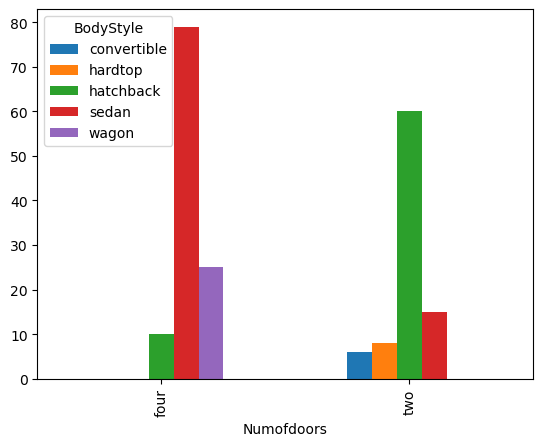

In [175]:
CrosstabResult=pd.crosstab(index=df['Numofdoors'],columns=df['BodyStyle'])
CrosstabResult.plot.bar()

* As observed from above bar plot majority of the sedan BodyStyle has Numofdoors as four

<Axes: xlabel='Numofdoors'>

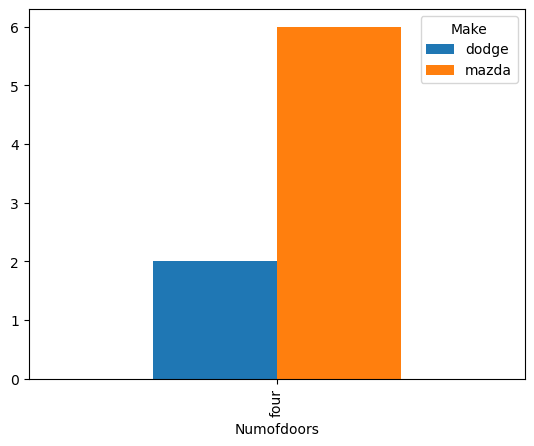

In [176]:
CrosstabResult=pd.crosstab(index=df['Numofdoors'],
                           columns=df[((df['Make'] == 'dodge') | (df['Make'] == 'mazda')) & (df.BodyStyle == 'sedan')].Make)
CrosstabResult.plot.bar()

* As observed from the above plot, for the Make type dodge or mazda and Bodystyle as sedan we only have Numofdoors as four.
* We can replace the null values in Numofdoors with four

In [177]:
df[(df.BodyStyle == 'sedan') & ((df.Make == 'dodge') | (df.Make == 'mazda')) & (df.DriveWheels == 'fwd')]

Symboling NormalizedLoss   Make FuelType Aspiration Numofdoors BodyStyle  \
25          1            148  dodge      gas        std       four     sedan   
26          1            148  dodge      gas        std       four     sedan   
27          1            148  dodge      gas      turbo        NaN     sedan   
53          1            113  mazda      gas        std       four     sedan   
54          1            113  mazda      gas        std       four     sedan   
60          0            115  mazda      gas        std       four     sedan   
62          0            115  mazda      gas        std       four     sedan   
63          0            NaN  mazda   diesel        std        NaN     sedan   

   DriveWheels EngineLocation  WheelBase  Length  Width  Height  CurbWeight  \
25         fwd          front       93.7   157.3   63.8    50.6        1989   
26         fwd          front       93.7   157.3   63.8    50.6        1989   
27         fwd          front       93.7   157.3   63.8    50.6        2191   
53         fwd          front       93.1   166.8   64.2    54.1        1945   
54         fwd          front       93.1   166.8   64.2    54.1        1950   
60         fwd          front       98.8   177.8   66.5    55.5        2410   
62         fwd          front       98.8   177.8   66.5    55.5        2410   
63         fwd          front       98.8   177.8   66.5    55.5        2443   

   EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
25        ohc           four          90       2bbl  2.97   3.23   
26        ohc           four          90       2bbl  2.97   3.23   
27        ohc           four          98       mpfi  3.03   3.39   
53        ohc           four          91       2bbl  3.03   3.15   
54        ohc           four          91       2bbl  3.08   3.15   
60        ohc           four         122       2bbl  3.39   3.39   
62        ohc           four         122       2bbl  3.39   3.39   
63        ohc           four         122        idi  3.39   3.39   

    CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg    Price  
25               9.4        68.0   5500.0       31          38   6692.0  
26               9.4        68.0   5500.0       31          38   7609.0  
27               7.6       102.0   5500.0       24          30   8558.0  
53               9.0        68.0   5000.0       31          38   6695.0  
54               9.0        68.0   5000.0       31          38   7395.0  
60               8.6        84.0   4800.0       26          32   8495.0  
62               8.6        84.0   4800.0       26          32  10245.0  
63              22.7        64.0   4650.0       36          42  10795.0

In [178]:
df.Numofdoors.replace(np.nan, 'four', inplace = True)

In [179]:
df.Numofdoors.isna().sum()

0

#### Handling Missing values for Price column

* Histogram of Price column before updating the null values

<Axes: xlabel='Price', ylabel='Density'>

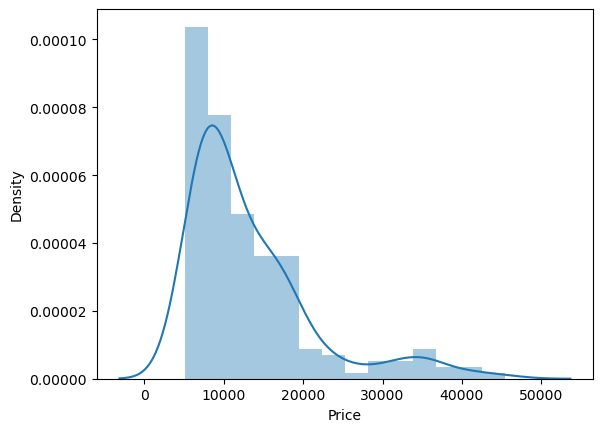

In [186]:
sns.distplot(df.Price)

In [181]:
df.Price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: Price, dtype: float64

In [182]:
df[df.Price.isna()]

Symboling NormalizedLoss     Make FuelType Aspiration Numofdoors  \
9            0            NaN     audi      gas      turbo        two   
44           1            NaN    isuzu      gas        std        two   
45           0            NaN    isuzu      gas        std       four   
129          1            NaN  porsche      gas        std        two   

     BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
9    hatchback         4wd          front       99.5   178.2   67.9    52.0   
44       sedan         fwd          front       94.5   155.9   63.6    52.0   
45       sedan         fwd          front       94.5   155.9   63.6    52.0   
129  hatchback         rwd          front       98.4   175.7   72.3    50.5   

     CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
9          3053        ohc           five         131       mpfi  3.13    3.4   
44         1874        ohc           four          90       2bbl  3.03   3.11   
45         1909        ohc           four          90       2bbl  3.03   3.11   
129        3366      dohcv          eight         203       mpfi  3.94   3.11   

     CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg  Price  
9                 7.0       160.0   5500.0       16          22    NaN  
44                9.6        70.0   5400.0       38          43    NaN  
45                9.6        70.0   5400.0       38          43    NaN  
129              10.0       288.0   5750.0       17          28    NaN

* As we observe from the statistics of Price column, min value is 5118 and max is 45400 with median as 10320.
* There is a wide difference between median value and max value, also the distribution is right skewed from the in its histogram plot.
* Therefore it would be inappropriate to subsititue the null values of Price column with median or mean. We need to use feature engineering techniques to impute the missing values.

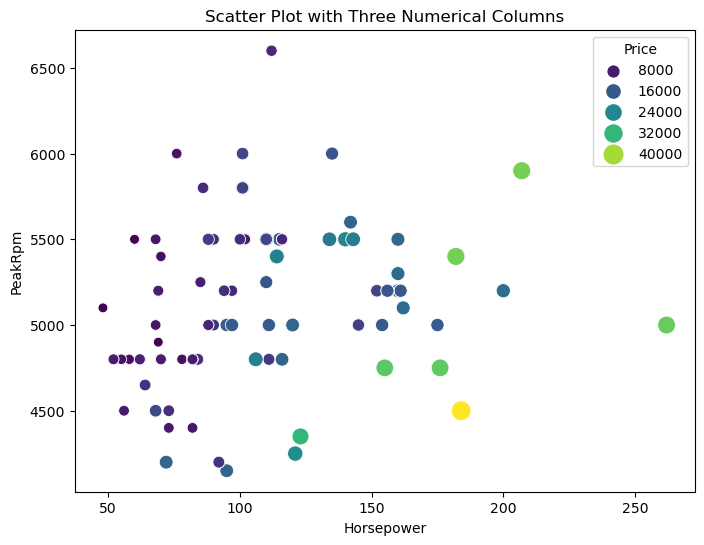

In [184]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Horsepower', y='PeakRpm', size='Price', sizes=(50, 200), hue='Price', palette='viridis', legend='brief')
plt.title('Scatter Plot with Three Numerical Columns')
plt.xlabel('Horsepower')
plt.ylabel('PeakRpm')
plt.legend(title='Price')
plt.show()

#### As observed from the above scatter plot as the Horsepower and PeakRpm increases, the Price of vehicle is getting increased.
#### As we have four missing values in Price column with Horsepower values as 160, 70, 288 and and PeakRpm values as 5500, 5400 and 5750 for these missing values.
#### When we observe for these values on the plot we can draw an estimate that:
* For vehicles with Horsepower near 160 and PeakRpm close to 5500, Price value falls close to 16000
* For vehicles with Horsepower near 70 and PeakRpm close to 5500, Price value falls close to 8000
* For vehicles with Horsepower above 250 and PeakRpm close to 5700, Price values are between 32000 and 40000.

#### Let us check the relation between Horsepower, EngineSize and Price column

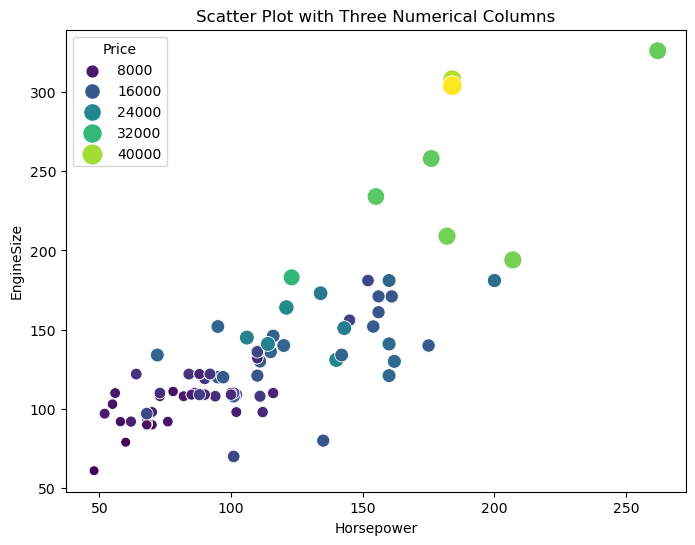

In [187]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Horsepower', y='EngineSize', size='Price', sizes=(50, 200), hue='Price', palette='viridis', legend='brief')
plt.title('Scatter Plot with Three Numerical Columns')
plt.xlabel('Horsepower')
plt.ylabel('EngineSize')
plt.legend(title='Price')
plt.show()

##### The above scatter plot also confirms that with vehicles having Horsepower more than 150 and Enginesize near 130 takes values from 16000 to 24000
##### Also Vehicles with less Horsepower and Enginesize between 50 to 100 have a price less than 8000
##### Vehicles with very high Horsepower and Enginesize turn out to be Premium vehicles with Prices between 32000 and 40000

##### Let us check the price ranges of vehicles when compared with different EngineType and Make

<Figure size 2000x1200 with 0 Axes>

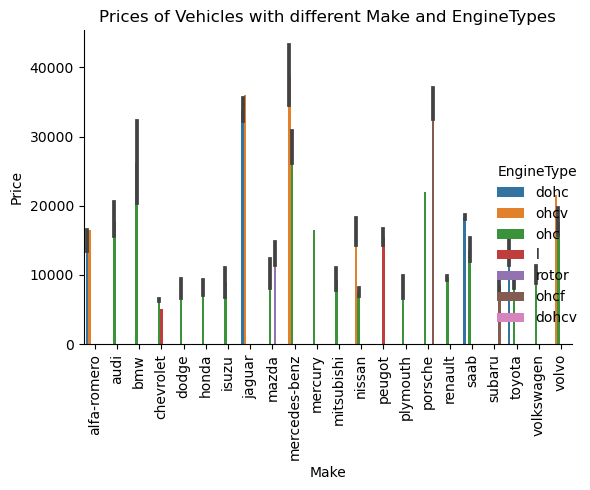

In [189]:
plt.figure(figsize=(20, 12))
sns.catplot(x='Make', y='Price', hue='EngineType',
               kind='bar', data=df)
plt.title('Prices of Vehicles with different Make and EngineTypes')
plt.xlabel('Make')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### We can draw below conclusions from the above plot between Prices and categorical variables Make and EngineType:
* For Vehicles with Make as isuzu and EngineType as ohc, Prices are below 10000
* For Vehicles with Make as audi and EngineType as ohc, maximum Price of vehicle is near to 20000
* For Vehicles with Make as porsche mimimum Price of vehicle is above 20000 and maximum is near to 40000

##### With the above references drawn for the missing values of Price Column, let us fill in the missing values for Price column

##### Missing value Imputatiion when Horse power is more than 200 and Rpm is above 5000 i.e. for Premium type of Vehicles

In [193]:
df[(df.Horsepower > 200) & (df.PeakRpm  >= 5000) & (df.EngineSize > 180)]

Symboling NormalizedLoss     Make FuelType Aspiration Numofdoors  \
49           0            NaN   jaguar      gas        std        two   
126          3            NaN  porsche      gas        std        two   
127          3            NaN  porsche      gas        std        two   
128          3            NaN  porsche      gas        std        two   
129          1            NaN  porsche      gas        std        two   

       BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
49         sedan         rwd          front      102.0   191.7   70.6    47.8   
126      hardtop         rwd           rear       89.5   168.9   65.0    51.6   
127      hardtop         rwd           rear       89.5   168.9   65.0    51.6   
128  convertible         rwd           rear       89.5   168.9   65.0    51.6   
129    hatchback         rwd          front       98.4   175.7   72.3    50.5   

     CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
49         3950       ohcv         twelve         326       mpfi  3.54   2.76   
126        2756       ohcf            six         194       mpfi  3.74    2.9   
127        2756       ohcf            six         194       mpfi  3.74    2.9   
128        2800       ohcf            six         194       mpfi  3.74    2.9   
129        3366      dohcv          eight         203       mpfi  3.94   3.11   

     CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg    Price  
49               11.5       262.0   5000.0       13          17  36000.0  
126               9.5       207.0   5900.0       17          25  32528.0  
127               9.5       207.0   5900.0       17          25  34028.0  
128               9.5       207.0   5900.0       17          25  37028.0  
129              10.0       288.0   5750.0       17          28      NaN

In [194]:
premiumPrice = df[(df.Horsepower > 200) & (df.PeakRpm  >= 5000) & (df.EngineSize > 180)].Price.mean()
premiumPrice

34896.0

##### From the above code we can conclude that the missing value for vehicle with high Horsepower and Make as Purchase the obtained obtained value of 34896 is close to our drawn conclusion that the price should be between 32000 and 40000

In [195]:
df.loc[129, 'Price'] = premiumPrice

##### Missing value imputation for Price with Horsepower less than 100 and with EngineType as ohc

In [197]:
df[((df.Horsepower > 50) & (df.Horsepower < 100)) & (df.EngineType == 'ohc') & 
       ((df.EngineSize > 50) & (df.EngineSize < 100)) & ((df.PeakRpm > 5000) & (df.PeakRpm < 6000)) & (df.Make == 'isuzu')]

Symboling NormalizedLoss   Make FuelType Aspiration Numofdoors BodyStyle  \
44          1            NaN  isuzu      gas        std        two     sedan   
45          0            NaN  isuzu      gas        std       four     sedan   

   DriveWheels EngineLocation  WheelBase  Length  Width  Height  CurbWeight  \
44         fwd          front       94.5   155.9   63.6    52.0        1874   
45         fwd          front       94.5   155.9   63.6    52.0        1909   

   EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
44        ohc           four          90       2bbl  3.03   3.11   
45        ohc           four          90       2bbl  3.03   3.11   

    CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg  Price  
44               9.6        70.0   5400.0       38          43    NaN  
45               9.6        70.0   5400.0       38          43    NaN

In [198]:
df[((df.Horsepower > 50) & (df.Horsepower < 100)) & (df.EngineType == 'ohc') & 
       ((df.EngineSize > 50) & (df.EngineSize < 100)) & ((df.PeakRpm > 5000) & (df.PeakRpm < 6000)) & (df.CityMpg > 30)]

Symboling NormalizedLoss        Make FuelType Aspiration Numofdoors  \
19           1             98   chevrolet      gas        std        two   
20           0             81   chevrolet      gas        std       four   
21           1            118       dodge      gas        std        two   
22           1            118       dodge      gas        std        two   
24           1            148       dodge      gas        std       four   
25           1            148       dodge      gas        std       four   
26           1            148       dodge      gas        std       four   
32           1            101       honda      gas        std        two   
44           1            NaN       isuzu      gas        std        two   
45           0            NaN       isuzu      gas        std       four   
76           2            161  mitsubishi      gas        std        two   
77           2            161  mitsubishi      gas        std        two   
78           2            161  mitsubishi      gas        std        two   
89           1            128      nissan      gas        std        two   
91           1            128      nissan      gas        std        two   
92           1            122      nissan      gas        std       four   
93           1            103      nissan      gas        std       four   
94           1            128      nissan      gas        std        two   
95           1            128      nissan      gas        std        two   
96           1            122      nissan      gas        std       four   
97           1            103      nissan      gas        std       four   
98           2            168      nissan      gas        std        two   
118          1            119    plymouth      gas        std        two   
120          1            154    plymouth      gas        std       four   
121          1            154    plymouth      gas        std       four   
122          1            154    plymouth      gas        std       four   

     BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
19   hatchback         fwd          front       94.5   155.9   63.6    52.0   
20       sedan         fwd          front       94.5   158.8   63.6    52.0   
21   hatchback         fwd          front       93.7   157.3   63.8    50.8   
22   hatchback         fwd          front       93.7   157.3   63.8    50.8   
24   hatchback         fwd          front       93.7   157.3   63.8    50.6   
25       sedan         fwd          front       93.7   157.3   63.8    50.6   
26       sedan         fwd          front       93.7   157.3   63.8    50.6   
32   hatchback         fwd          front       93.7   150.0   64.0    52.6   
44       sedan         fwd          front       94.5   155.9   63.6    52.0   
45       sedan         fwd          front       94.5   155.9   63.6    52.0   
76   hatchback         fwd          front       93.7   157.3   64.4    50.8   
77   hatchback         fwd          front       93.7   157.3   64.4    50.8   
78   hatchback         fwd          front       93.7   157.3   64.4    50.8   
89       sedan         fwd          front       94.5   165.3   63.8    54.5   
91       sedan         fwd          front       94.5   165.3   63.8    54.5   
92       sedan         fwd          front       94.5   165.3   63.8    54.5   
93       wagon         fwd          front       94.5   170.2   63.8    53.5   
94       sedan         fwd          front       94.5   165.3   63.8    54.5   
95   hatchback         fwd          front       94.5   165.6   63.8    53.3   
96       sedan         fwd          front       94.5   165.3   63.8    54.5   
97       wagon         fwd          front       94.5   170.2   63.8    53.5   
98     hardtop         fwd          front       95.1   162.4   63.8    53.3   
118  hatchback         fwd          front       93.7   157.3   63.8    50.8   
120  hatchback         fwd          front       93.7   1

In [199]:
meanPriceForHP70 =  df[((df.Horsepower > 50) & (df.Horsepower < 100)) & (df.EngineType == 'ohc') & 
       ((df.EngineSize > 50) & (df.EngineSize < 100)) & ((df.PeakRpm > 5000) & (df.PeakRpm < 6000)) & (df.CityMpg > 30)].Price.mean()
round(meanPriceForHP70)

6679

* From the above code we can conclude that the missing value for vehicle with high Horsepower less than 100 and Enginetype as ohc, the obtained value of 6679 is close to our drawn conclusion that the price should be less than 8000
* We can update the obtained value for these rows with Enginetype as ohc and Horsepower equals 70

In [200]:
df.loc[44, 'Price'] = meanPriceForHP70

In [201]:
df.loc[45, 'Price'] = meanPriceForHP70

* Missing Price value imputation for Vehicle with Horsepower between 140 and 180 and EngineType as ohc

In [202]:
df[((df.Horsepower > 140) & (df.Horsepower < 180)) & (df.EngineType == 'ohc') & 
       ((df.EngineSize > 120) & (df.EngineSize < 150)) & ((df.PeakRpm > 5000) & (df.PeakRpm < 6000))]

Symboling NormalizedLoss   Make FuelType Aspiration Numofdoors  \
9            0            NaN   audi      gas      turbo        two   
198         -2            103  volvo      gas      turbo       four   
199         -1             74  volvo      gas      turbo       four   
201         -1             95  volvo      gas      turbo       four   

     BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
9    hatchback         4wd          front       99.5   178.2   67.9    52.0   
198      sedan         rwd          front      104.3   188.8   67.2    56.2   
199      wagon         rwd          front      104.3   188.8   67.2    57.5   
201      sedan         rwd          front      109.1   188.8   68.8    55.5   

     CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
9          3053        ohc           five         131       mpfi  3.13    3.4   
198        3045        ohc           four         130       mpfi  3.62   3.15   
199        3157        ohc           four         130       mpfi  3.62   3.15   
201        3049        ohc           four         141       mpfi  3.78   3.15   

     CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg    Price  
9                 7.0       160.0   5500.0       16          22      NaN  
198               7.5       162.0   5100.0       17          22  18420.0  
199               7.5       162.0   5100.0       17          22  18950.0  
201               8.7       160.0   5300.0       19          25  19045.0

In [203]:
meanValueForPriceWithHP160 = df[((df.Horsepower > 140) & (df.Horsepower < 180)) & (df.EngineType == 'ohc') & 
       ((df.EngineSize > 120) & (df.EngineSize < 150)) & ((df.PeakRpm > 5000) & (df.PeakRpm < 6000))].Price.mean()
meanValueForPriceWithHP160

18805.0

* From the above code we can conclude that the missing value for vehicle with high Horsepower between 140 and 180 and Enginetype as ohc, the obtained value of 18805 is close to our drawn conclusion that the price should take values from 16000 too 24000
* We can update the missing Price for the rows with Enginetype as ohc and Horsepower between 140 and 180, with the obtained value of 18805 

In [205]:
df.loc[9, 'Price'] = meanValueForPriceWithHP160

In [206]:
df.Price.isna().sum()

0

#### After updating null values in Proce let us draw the histogram again

<Axes: xlabel='Price', ylabel='Density'>

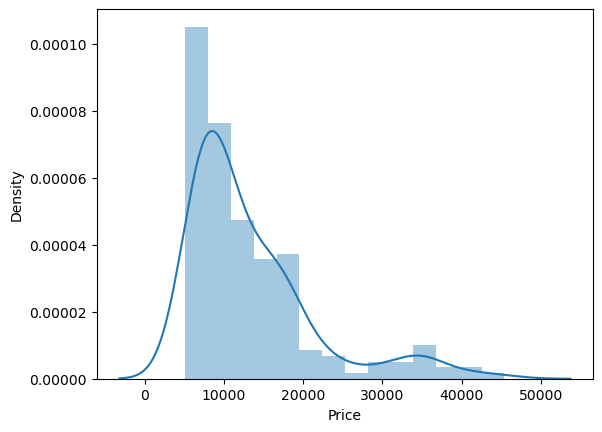

In [208]:
sns.distplot(df.Price)

#### The histograms before handling the null values and after updating the null values for Price column looks similar which signifies that the values we have updated didn't introduce any skewness.

* First, a figure with a size of 20x6 is created using plt.figure(figsize=(20, 6)) which includes the Histogram and a box plot for the EngineSize and stroke data. 
* In the first subplot, a distribution plot i.e. histogram of the EngineSize and Stroke feature is created using Seaborn's distplot function, visualizing the distribution of values in the EngineSize and Stroke columns. 
* In the second subplot, a boxplot of the EngineSize and Stroke feature is created using pandas' plot function with kind='box', displaying the distribution of EngineSize, Stroke values, including median, quartiles, and potential outliers.
* For scaling the features we use StandardScaler method, by importing StandardScaler from scikit-learn's preprocessing module, Initialize the StandardScaler as scaler. Fit the scaler to the EngineSize and Stroke columns and then transform these columns in place, replacing the original values with the scaled ones.
* After scaling the features, the code repeats the process of generating histograms and box plots for the scaled EngineSize and Stroke columns. This is done to visualize the effect of scaling on the distributions and boxplots of these features.

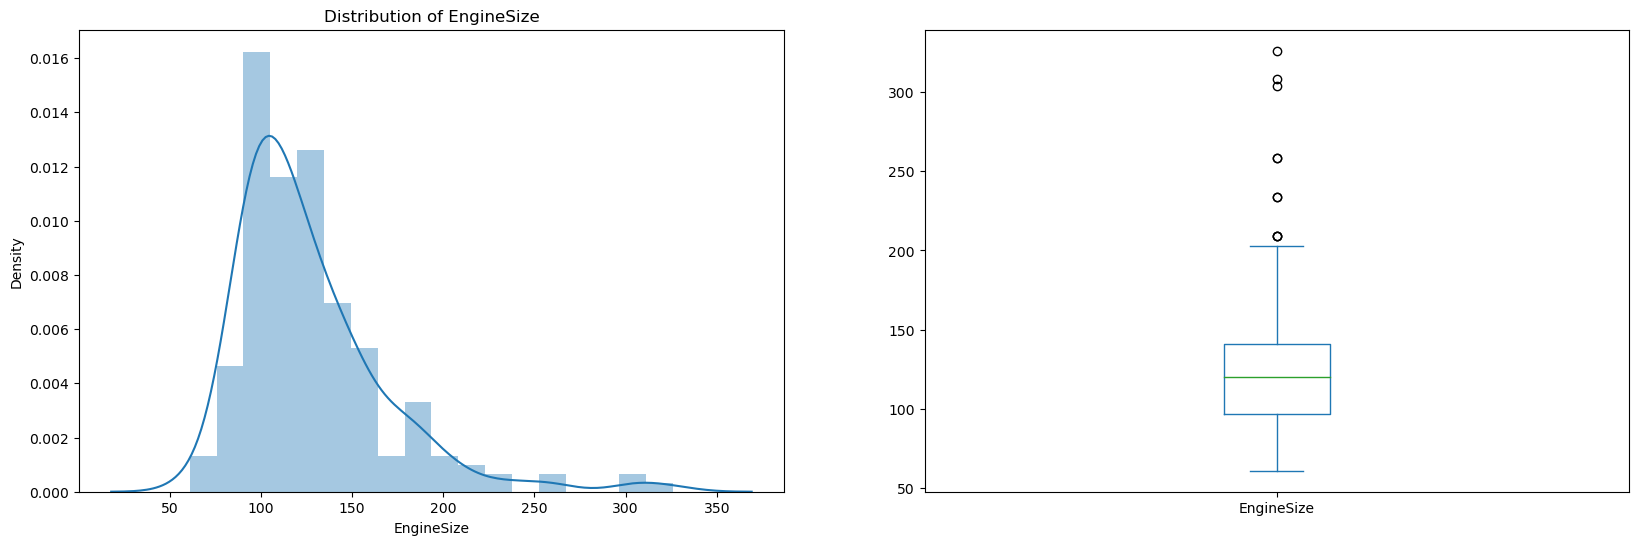

In [106]:
# Histogram and box plot for the original data of Engine Size
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for EngineSize
sns.distplot(df.EngineSize);
plt.title("Distribution of EngineSize")

plt.subplot(122)
# Box plot for EngineSize
df["EngineSize"].plot(kind='box')
plt.show()

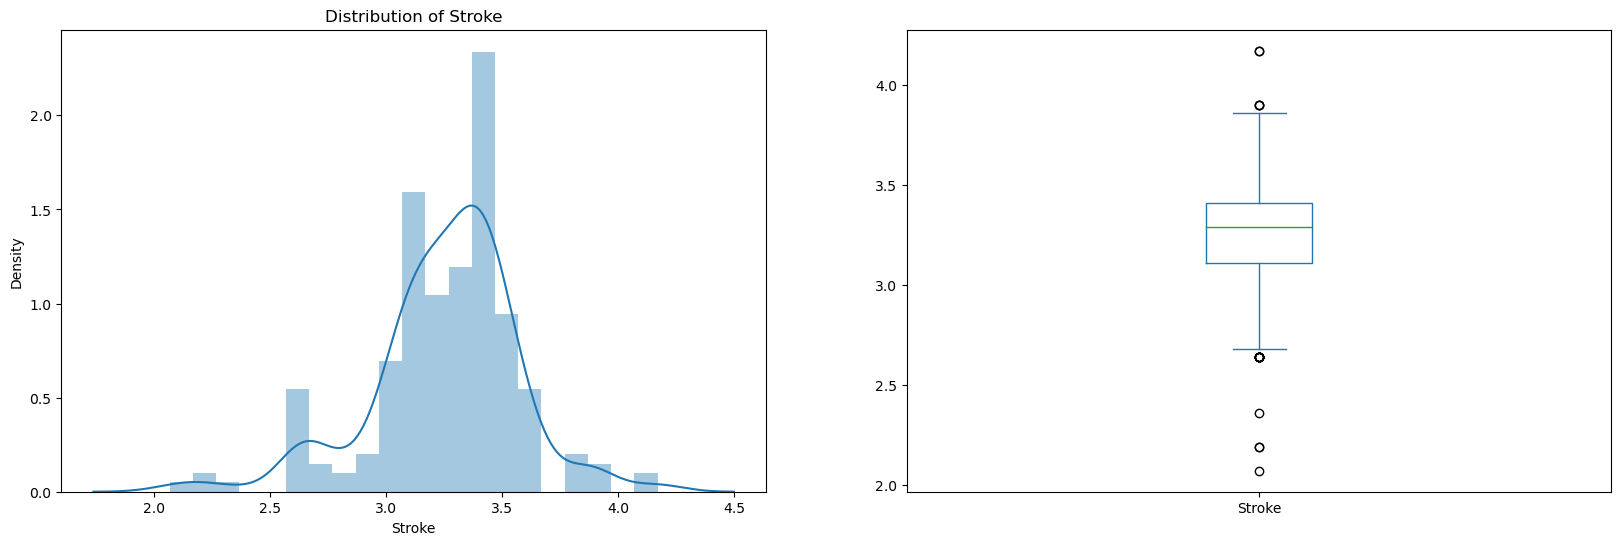

In [107]:
# Histogram and box plot for the original data of stroke
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for Stroke
sns.distplot(df.Stroke);
plt.title("Distribution of Stroke")

plt.subplot(122)
# Box plot for Stroke
df["Stroke"].plot(kind='box')
plt.show()

##### Checking for the null values for EngineSize and Stroke

In [112]:
df.EngineSize.isna().sum()

0

##### There are no missing values for EngineSize, lets check for Stroke column

In [111]:
df.Stroke.isna().sum()

4

In [115]:
df.Stroke.describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: Stroke, dtype: float64

##### As the mean and median are close and we have the standard deviation of 0.3, we can replace the null values for Stroke column with median value.

In [119]:
df.Stroke.replace(np.nan, df.Stroke.median(), inplace = True)

#### Apply StandardScaler on EngineSize and Stroke features

In [120]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the EngineSize and Stroke columns
df[['EngineSize', 'Stroke']] = scaler.fit_transform(df[['EngineSize', 'Stroke']])

# Now df['EngineSize'] and df['Stroke'] are scaled

#### Plot the histogram and boxplot after applying StandardScaler transformation

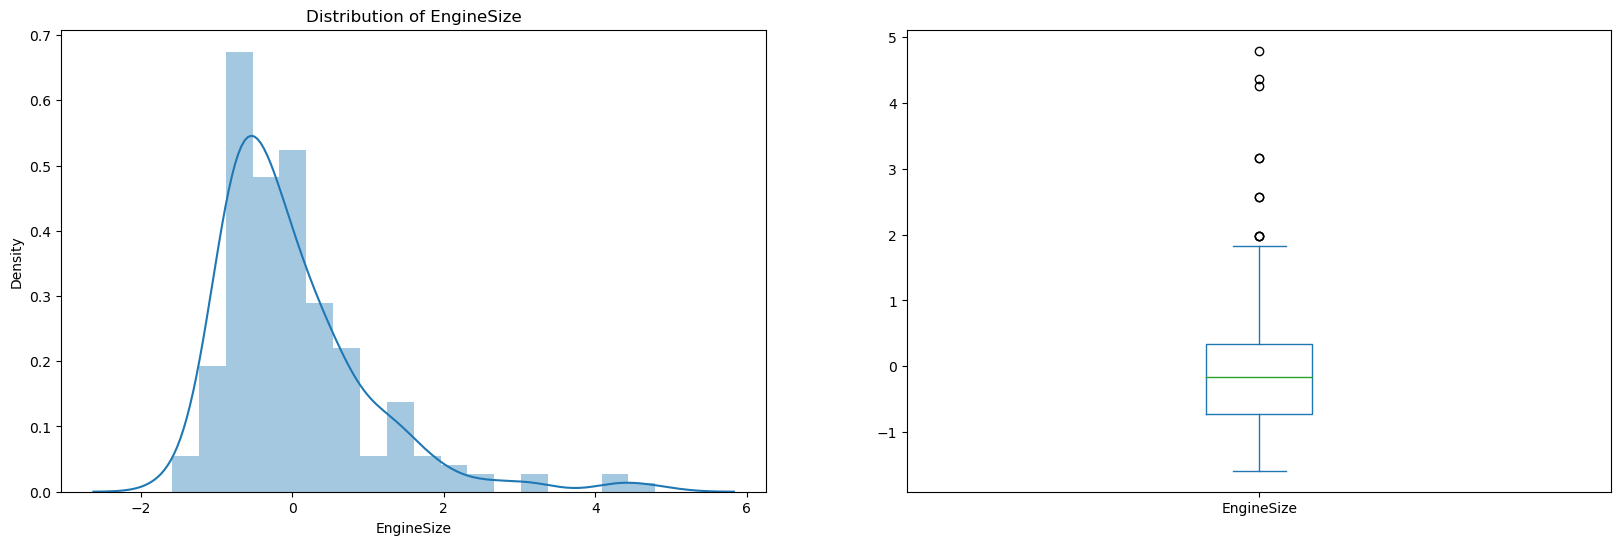

In [121]:
# Histogram and box plot for the original data of Engine Size
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for EngineSize
sns.distplot(df[df["EngineSize"].notnull()].EngineSize);
plt.title("Distribution of EngineSize")

plt.subplot(122)
# Box plot for EngineSize
df["EngineSize"].plot(kind='box')
plt.show()

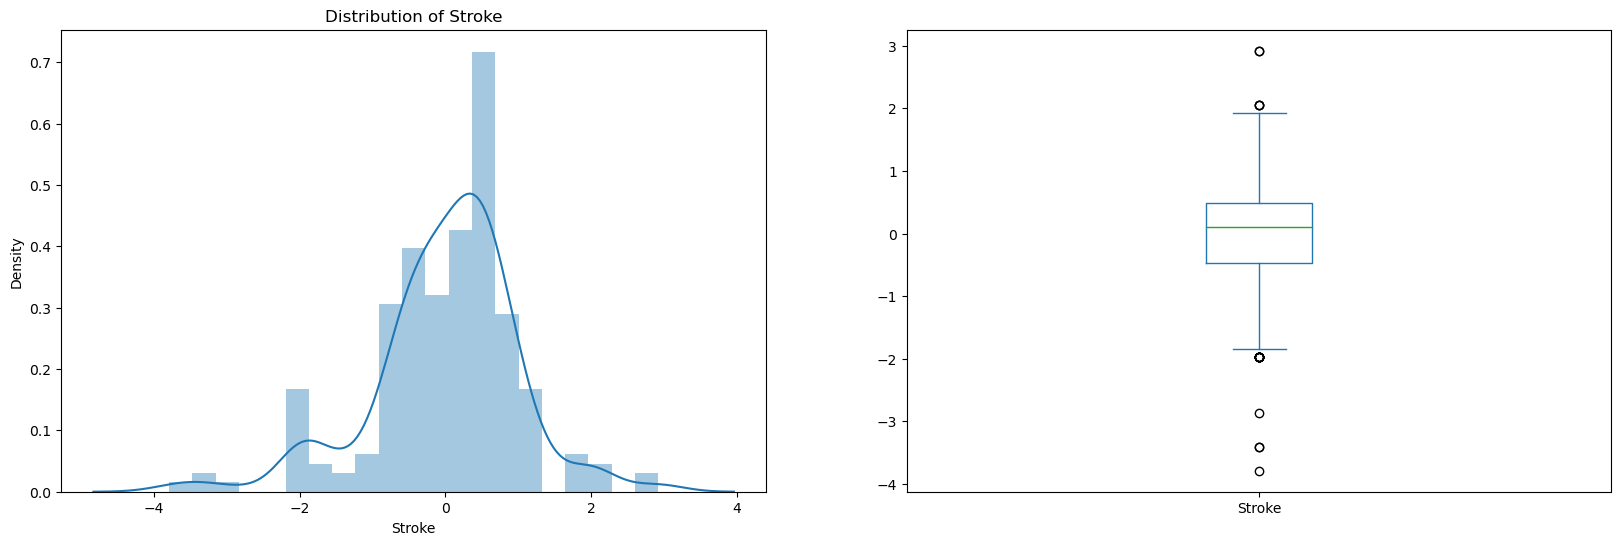

In [122]:
# Histogram and box plot for the original data of Engine Size
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for Stroke
sns.distplot(df[df["Stroke"].notnull()].Stroke);
plt.title("Distribution of Stroke")

plt.subplot(122)
# Box plot for Stroke
df["Stroke"].plot(kind='box')
plt.show()

* The scaled distributions do not show significant improvement in the spread, it suggests that the scaling may not have been effective as the distribution for EngineSize is right skewed and Stroke is left skewed. 
* We can perform another Min-Max scaling technique to check for the improvement in the distribution

## Feature scaling using Min-Max scaling

* Draw the Histogram and Boxplots for the EngineSize and Stroke original data. 
* Now perform the scaling using Min-Max scaling Technique. 
* Import the MinMaxScaler class, initialize an instance of it, and then apply Min-Max scaling to the EngineSize and Stroke columns of the DataFrame df1. 
* After scaling the features, the code repeats the process of generating histograms and boxplots for the scaled EngineSize and Stroke columns. 
* This is done to visualize the effect of scaling on the distributions and box plots of these features.

In [124]:
#reading csv file
df1 = pd.read_csv("https://raw.githubusercontent.com/Vihasadi/featureEngineering/main/M10_Data.csv",header=None) 

In [126]:
df1.columns = ["Symboling","NormalizedLoss", "Make",
              "FuelType", "Aspiration", "Numofdoors", "BodyStyle",
              "DriveWheels","EngineLocation","WheelBase","Length",
              "Width","Height","CurbWeight","EngineType","Numofcylinders",
              "EngineSize","FuelSystem","Bore","Stroke","CompressionRatio",
              "Horsepower","PeakRpm","CityMpg","HighwayMpg","Price"]

##### Handling missing values for Stroke feature

In [127]:
df1.Stroke.replace('?', np.nan, inplace = True)
df1.Stroke = pd.to_numeric(df1.Stroke)
df1.Stroke.replace(np.nan, df1.Stroke.median(), inplace = True)

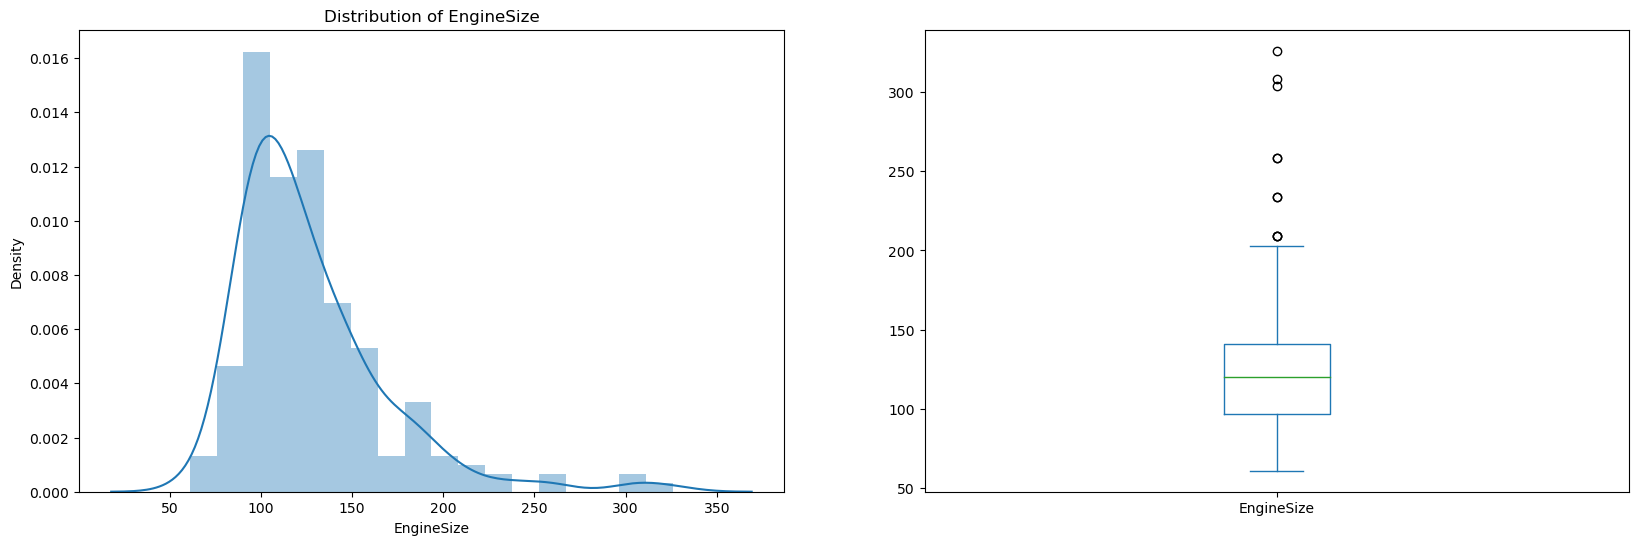

In [128]:
# Histogram and box plot for the original data of Engine Size
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for EngineSize
sns.distplot(df1.EngineSize);
plt.title("Distribution of EngineSize")

plt.subplot(122)
# Box plot for EngineSize
df1["EngineSize"].plot(kind='box')
plt.show()

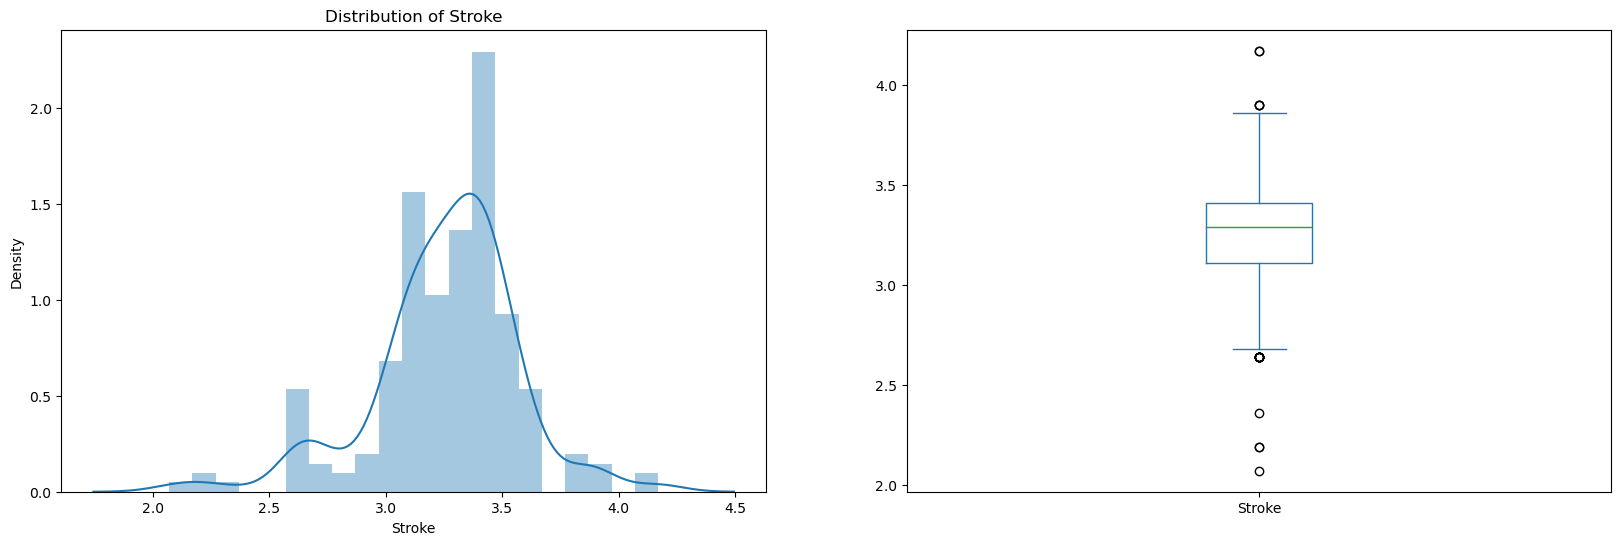

In [129]:
# Histogram and box plot for the original data of Stroke
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for Stroke
sns.distplot(df1.Stroke);
plt.title("Distribution of Stroke")

plt.subplot(122)
# Box plot for Stroke
df1["Stroke"].plot(kind='box')
plt.show()

#### Feature Scaling using MinMaxScaler

In [130]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the EngineSize and Stroke columns
df1[['EngineSize', 'Stroke']] = scaler.fit_transform(df1[['EngineSize', 'Stroke']])

In [133]:
df1.EngineSize.describe()

count    205.000000
mean       0.248707
std        0.157142
min        0.000000
25%        0.135849
50%        0.222642
75%        0.301887
max        1.000000
Name: EngineSize, dtype: float64

In [134]:
df1.Stroke.describe()

count    205.000000
mean       0.564808
std        0.149349
min        0.000000
25%        0.495238
50%        0.580952
75%        0.638095
max        1.000000
Name: Stroke, dtype: float64

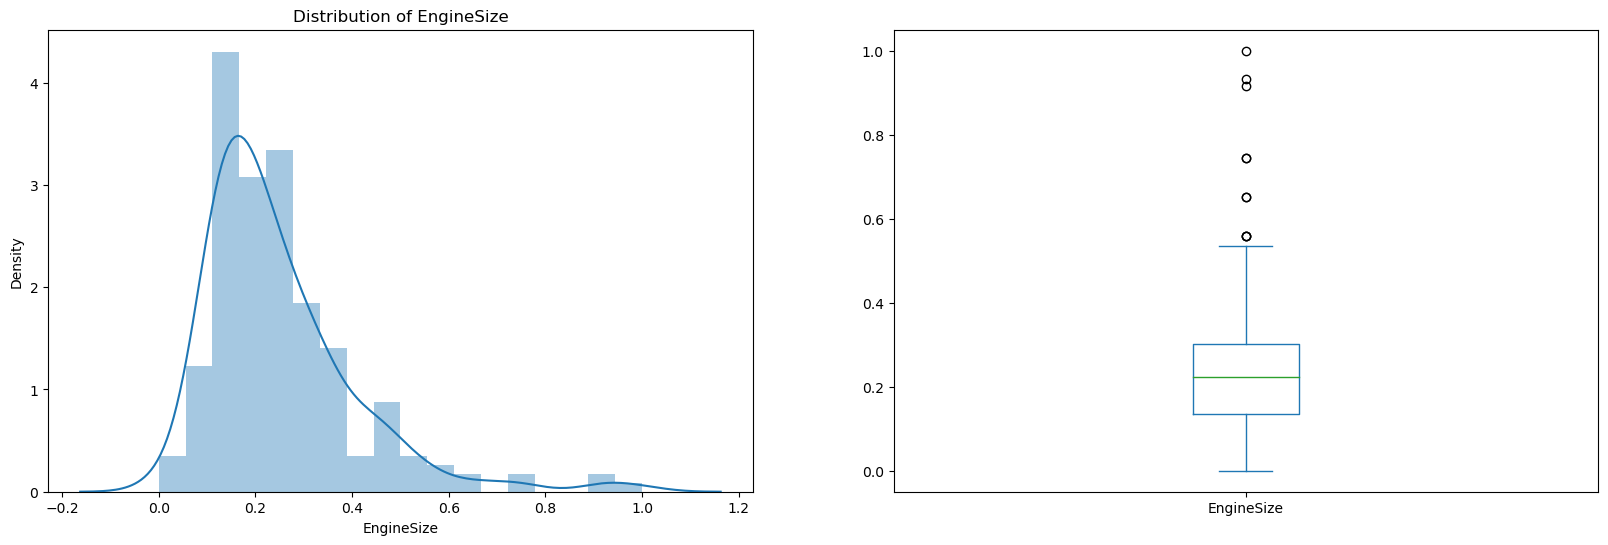

In [135]:
# Histogram and box plot for the original data of Engine Size
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for EngineSize
sns.distplot(df1.EngineSize);
plt.title("Distribution of EngineSize")

plt.subplot(122)
# Box plot for EngineSize
df1["EngineSize"].plot(kind='box')
plt.show()

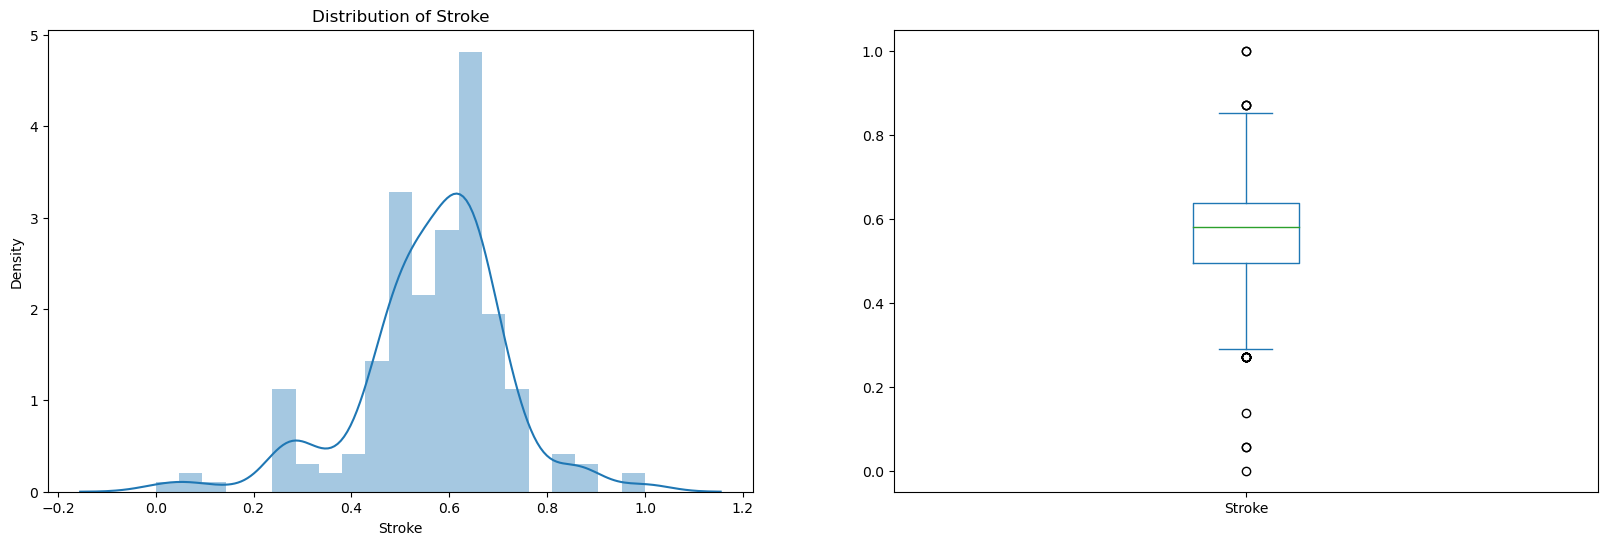

In [136]:
# Histogram and box plot for the original data of Stroke
plt.figure(figsize=(20, 6))

plt.subplot(121)
# Distribution plot for Stroke
sns.distplot(df1.Stroke);
plt.title("Distribution of Stroke")

plt.subplot(122)
# Box plot for Stroke
df1["Stroke"].plot(kind='box')
plt.show()

* The scaled distributions do not show significant improvement in the spread, it suggests that the scaling may not have been effective for Min-Max Scaling also. Since the data is highly skewed, even when we perform the scaling, it didn't reduce the skewing or it didn't exhibit a gaussian-shape after scaling.

* Feature scaling is a technique used in machine learning to standardize the range of independent variables or features of the data. It does not directly improve the distribution of the data; instead, it helps algorithms converge faster and may lead to better performance, especially for algorithms that are sensitive to the scale of the input features.

### A
**Risk Rating** or symboling is categorical/ordinal,
**Make** is a categorical/nominal,
**Enginetype** is a categorical/nominal.

## B
For each variable, describe the methodology you would employ for purposes of preparing its data
values for use within a machine learning algorithm

**1. Handling Missing data values:** There are no missng values in the any of the variables(symboling, Make, Enginetype)

**2. Duplicate data:** There are no duplicated columns in the dataframe

**3. Outliers:** 
 To identify outliers in categorical data, the first step involves analyzing the frequency distribution of unique categories within the dataset. By establishing a frequency threshold, items that occur only a few times can be pinpointed as outliers. This methodology enables the differentiation of commonly occurring categories from those that are rare, facilitating targeted analysis or data cleaning efforts.

**4. Dummy variables:**  As all the columns are qualitative to get quantitative information of the respective variables we convert them into Dummy variables.
   To generate dummy variables for categorical data in pandas, the get_dummies method is used, converting categorical values into a series of binary columns. Each column represents a category, marked as 1 for presence and 0 for absence. After converting with get_dummies, the resulting DataFrame is joined back to the original DataFrame. The original categorical column is then removed, leaving a dataset enhanced with binary dummy variables, facilitating easier analysis and modeling.

**5. Scaling:** Scaling is generally not applicable to categorical data, which consists of discrete categories.

## C
#### Missing data values
From the dataframe we can observe that there are some missing values that are marked as '?'. So converting them to nan to check any null values in the columns(symboling, make and EngineType)

In [212]:
#replace '?' by nan
df = df.replace('?', np.nan)

In [213]:
df.head()

Symboling NormalizedLoss         Make FuelType Aspiration Numofdoors  \
0          3            NaN  alfa-romero      gas        std        two   
1          3            NaN  alfa-romero      gas        std        two   
2          1            NaN  alfa-romero      gas        std        two   
3          2            164         audi      gas        std       four   
4          2            164         audi      gas        std       four   

     BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
0  convertible         rwd          front       88.6   168.8   64.1    48.8   
1  convertible         rwd          front       88.6   168.8   64.1    48.8   
2    hatchback         rwd          front       94.5   171.2   65.5    52.4   
3        sedan         fwd          front       99.8   176.6   66.2    54.3   
4        sedan         4wd          front       99.4   176.6   66.4    54.3   

   CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
0        2548       dohc           four         130       mpfi  3.47   2.68   
1        2548       dohc           four         130       mpfi  3.47   2.68   
2        2823       ohcv            six         152       mpfi  2.68   3.47   
3        2337        ohc           four         109       mpfi  3.19    3.4   
4        2824        ohc           five         136       mpfi  3.19    3.4   

   CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg    Price  
0               9.0       111.0   5000.0       21          27  13495.0  
1               9.0       111.0   5000.0       21          27  16500.0  
2               9.0       154.0   5000.0       19          26  16500.0  
3              10.0       102.0   5500.0       24          30  13950.0  
4               8.0       115.0   5500.0       18          22  17450.0

<Axes: >

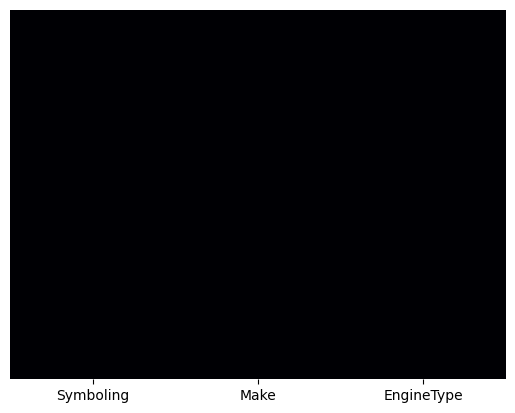

In [214]:
#Pointing any null values in heatmap
sns.heatmap(df[["Symboling", "Make", "EngineType"]] .isnull(), yticklabels= False, cbar= False, cmap='magma')

##### From the above heatmap we can understand that there are no null or missing values in the attributes (symboling, Make, EngineType)

### Duplicate Data

##### Checking for duplicate data in the dataset using function .duplicated()

In [217]:
#Checking the duplicates in the dataset
list1= df[["Symboling", "Make","EngineType"]].duplicated()

In [218]:
# Checking if there is any True item in the list
if True in list1:
    for item in list1:
        if item == True:
            print(item)
else:
    print("No duplicates found")

No duplicates found


##### No duplicates found in the dataset

#### OUTLIERS
Using Value_counts to get the frequency of the Unique categories then setting a threshold value to pinpoint the outliers. Then writing a condition, so that all the unique categories will be printed which are repeated less frequently then the threshold value and using index.tolist to convert the output to list format.

In [220]:
# Calculate frequencies of symboling
frequency_counts = df['Symboling'].value_counts()

# Printing frequencies
print(frequency_counts)

Symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64


In [221]:
# Setting a threshold value
threshold = 3  

# Finding the frequencies of unique categorical columns which are less than threshold
# Using index.tolist to retrieve the outlier values in the form of list
outliers = frequency_counts[frequency_counts <= threshold].index.tolist()

# printing outliers
print(outliers)

[-2]


##### In symboling unique category '2' is the outlier as it is repeated less times then the threshold value

In [223]:
# Calculate frequencies of Make
frequency_counts = df['Make'].value_counts()

# Printing frequencies
print(frequency_counts)

Make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64


In [224]:
# Setting a threshold value
threshold = 3  

# Finding the frequencies of unique categorical columns which are less than threshold
# Using index.tolist to retrieve the outlier values in the form of list
outliers = frequency_counts[frequency_counts <= threshold].index.tolist()

# printing outliers
print(outliers)

['jaguar', 'chevrolet', 'alfa-romero', 'renault', 'mercury']


##### In attribute Make unique category 'jaguar', 'chevrolet', 'alfa-romero', 'renault', 'mercury' are the outliers as it is repeated less times then the threshold value

In [226]:
# Calculate frequencies of EngineType
frequency_counts = df['EngineType'].value_counts()

# printing frequencies
print(frequency_counts)

EngineType
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


In [227]:
# Setting a threshold value
threshold = 3  

# Finding the frequencies of unique categorical columns which are less than threshold
# Using index.tolist to retrieve the outlier values in the form of list
outliers = frequency_counts[frequency_counts <= threshold].index.tolist()

# Displaying outliers
print(outliers)

['dohcv']


##### In attribute EngineType unique category "dohcv" is the outlier as it is repeated less times then the threshold value

#### Dummy Variables

The get_dummies function is employed to generate dummy variables from categorical data, resulting in a DataFrame of boolean values (True/False). To convert these booleans to numeric binary format (0 and 1), the .astype(int) method is used. Subsequently, this DataFrame containing the dummy variables is concatenated with the original DataFrame. Finally, the original column, for which the dummies were created, is dropped from the DataFrame.

In [228]:
# Creaing dummies of column synmboling
Creating_dummy = pd.get_dummies(df['Symboling'], prefix='Symboling')
# Converting boolean values to binary values
Creating_dummy = Creating_dummy.astype(int)  

# Concatenating the created_dummy to the dataframe
df = pd.concat([df, Creating_dummy], axis=1)

# Dropping the original 'symboling' column
df.drop('Symboling', axis=1, inplace=True)

In [229]:
df.head()

NormalizedLoss         Make FuelType Aspiration Numofdoors    BodyStyle  \
0            NaN  alfa-romero      gas        std        two  convertible   
1            NaN  alfa-romero      gas        std        two  convertible   
2            NaN  alfa-romero      gas        std        two    hatchback   
3            164         audi      gas        std       four        sedan   
4            164         audi      gas        std       four        sedan   

  DriveWheels EngineLocation  WheelBase  Length  Width  Height  CurbWeight  \
0         rwd          front       88.6   168.8   64.1    48.8        2548   
1         rwd          front       88.6   168.8   64.1    48.8        2548   
2         rwd          front       94.5   171.2   65.5    52.4        2823   
3         fwd          front       99.8   176.6   66.2    54.3        2337   
4         4wd          front       99.4   176.6   66.4    54.3        2824   

  EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
0       dohc           four         130       mpfi  3.47   2.68   
1       dohc           four         130       mpfi  3.47   2.68   
2       ohcv            six         152       mpfi  2.68   3.47   
3        ohc           four         109       mpfi  3.19    3.4   
4        ohc           five         136       mpfi  3.19    3.4   

   CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg    Price  \
0               9.0       111.0   5000.0       21          27  13495.0   
1               9.0       111.0   5000.0       21          27  16500.0   
2               9.0       154.0   5000.0       19          26  16500.0   
3              10.0       102.0   5500.0       24          30  13950.0   
4               8.0       115.0   5500.0       18          22  17450.0   

   Symboling_-2  Symboling_-1  Symboling_0  Symboling_1  Symboling_2  \
0             0             0            0            0            0   
1             0             0            0            0            0   
2             0             0            0            1            0   
3             0             0            0            0            1   
4             0             0            0            0            1   

   Symboling_3  
0            1  
1            1  
2            0  
3            0  
4            0

In [230]:
# Creaing dummies of column Make
Creating_dummy = pd.get_dummies(df['Make'], prefix='Make')
# Converting boolean values to binary values
Creating_dummy = Creating_dummy.astype(int)  

# Concatenating the created_dummy to the dataframe
df = pd.concat([df, Creating_dummy], axis=1)

# Dropping the original 'Make' column
df.drop('Make', axis=1, inplace=True)

In [231]:
df.head()

NormalizedLoss FuelType Aspiration Numofdoors    BodyStyle DriveWheels  \
0            NaN      gas        std        two  convertible         rwd   
1            NaN      gas        std        two  convertible         rwd   
2            NaN      gas        std        two    hatchback         rwd   
3            164      gas        std       four        sedan         fwd   
4            164      gas        std       four        sedan         4wd   

  EngineLocation  WheelBase  Length  Width  Height  CurbWeight EngineType  \
0          front       88.6   168.8   64.1    48.8        2548       dohc   
1          front       88.6   168.8   64.1    48.8        2548       dohc   
2          front       94.5   171.2   65.5    52.4        2823       ohcv   
3          front       99.8   176.6   66.2    54.3        2337        ohc   
4          front       99.4   176.6   66.4    54.3        2824        ohc   

  Numofcylinders  EngineSize FuelSystem  Bore Stroke  CompressionRatio  \
0           four         130       mpfi  3.47   2.68               9.0   
1           four         130       mpfi  3.47   2.68               9.0   
2            six         152       mpfi  2.68   3.47               9.0   
3           four         109       mpfi  3.19    3.4              10.0   
4           five         136       mpfi  3.19    3.4               8.0   

   Horsepower  PeakRpm  CityMpg  HighwayMpg    Price  Symboling_-2  \
0       111.0   5000.0       21          27  13495.0             0   
1       111.0   5000.0       21          27  16500.0             0   
2       154.0   5000.0       19          26  16500.0             0   
3       102.0   5500.0       24          30  13950.0             0   
4       115.0   5500.0       18          22  17450.0             0   

   Symboling_-1  Symboling_0  Symboling_1  Symboling_2  Symboling_3  \
0             0            0            0            0            1   
1             0            0            0            0            1   
2             0            0            1            0            0   
3             0            0            0            1            0   
4             0            0            0            1            0   

   Make_alfa-romero  Make_audi  Make_bmw  Make_chevrolet  Make_dodge  \
0                 1          0         0               0           0   
1                 1          0         0               0           0   
2                 1          0         0               0           0   
3                 0          1         0               0           0   
4                 0          1         0               0           0   

   Make_honda  Make_isuzu  Make_jaguar  Make_mazda  Make_mercedes-benz  \
0           0           0            0           0                   0   
1           0           0            0           0                   0   
2           0           0            0           0                   0   
3           0           0            0           0                   0   
4           0           0            0           0                   0   

   Make_mercury  Make_mitsubishi  Make_nissan  Make_peugot  Make_plymouth  \
0             0                0            0            0              0   
1             0                0            0            0              0   
2             0                0            0            0              0   
3             0                0            0            0              0   
4             0                0            0            0              0   

   Make_porsche  Make_renault  Make_saab  Make_subaru  Make_toyota  \
0             0             0          0            0            0   
1             0             0          0            0            0   
2             0             0          0            0            0   
3             0             0          0            0            0   
4             0             0          0            0            0   

   Make_volkswagen  Make_vo

In [232]:
# Creaing dummies of column Enginetype
Creating_dummy = pd.get_dummies(df['EngineType'], prefix='EngineType')
# Converting boolean values to binary values
Creating_dummy = Creating_dummy.astype(int)  

# Concatenating the created_dummy to the dataframe
df = pd.concat([df, Creating_dummy], axis=1)

# Dropping the original 'EngineType' column
df.drop('EngineType', axis=1, inplace=True)

In [233]:
df.head()

NormalizedLoss FuelType Aspiration Numofdoors    BodyStyle DriveWheels  \
0            NaN      gas        std        two  convertible         rwd   
1            NaN      gas        std        two  convertible         rwd   
2            NaN      gas        std        two    hatchback         rwd   
3            164      gas        std       four        sedan         fwd   
4            164      gas        std       four        sedan         4wd   

  EngineLocation  WheelBase  Length  Width  Height  CurbWeight Numofcylinders  \
0          front       88.6   168.8   64.1    48.8        2548           four   
1          front       88.6   168.8   64.1    48.8        2548           four   
2          front       94.5   171.2   65.5    52.4        2823            six   
3          front       99.8   176.6   66.2    54.3        2337           four   
4          front       99.4   176.6   66.4    54.3        2824           five   

   EngineSize FuelSystem  Bore Stroke  CompressionRatio  Horsepower  PeakRpm  \
0         130       mpfi  3.47   2.68               9.0       111.0   5000.0   
1         130       mpfi  3.47   2.68               9.0       111.0   5000.0   
2         152       mpfi  2.68   3.47               9.0       154.0   5000.0   
3         109       mpfi  3.19    3.4              10.0       102.0   5500.0   
4         136       mpfi  3.19    3.4               8.0       115.0   5500.0   

   CityMpg  HighwayMpg    Price  Symboling_-2  Symboling_-1  Symboling_0  \
0       21          27  13495.0             0             0            0   
1       21          27  16500.0             0             0            0   
2       19          26  16500.0             0             0            0   
3       24          30  13950.0             0             0            0   
4       18          22  17450.0             0             0            0   

   Symboling_1  Symboling_2  Symboling_3  Make_alfa-romero  Make_audi  \
0            0            0            1                 1          0   
1            0            0            1                 1          0   
2            1            0            0                 1          0   
3            0            1            0                 0          1   
4            0            1            0                 0          1   

   Make_bmw  Make_chevrolet  Make_dodge  Make_honda  Make_isuzu  Make_jaguar  \
0         0               0           0           0           0            0   
1         0               0           0           0           0            0   
2         0               0           0           0           0            0   
3         0               0           0           0           0            0   
4         0               0           0           0           0            0   

   Make_mazda  Make_mercedes-benz  Make_mercury  Make_mitsubishi  Make_nissan  \
0           0                   0             0                0            0   
1           0                   0             0                0            0   
2           0                   0             0                0            0   
3           0                   0             0                0            0   
4           0                   0             0                0            0   

   Make_peugot  Make_plymouth  Make_porsche  Make_renault  Make_saab  \
0            0              0             0             0          0   
1            0              0             0             0          0   
2            0              0             0             0          0   
3            0              0             0             0          0   
4            0              0             0             0          0   

   Make_subaru  Make_toyota  Make_volkswagen  Make_volvo  EngineType_dohc  \
0            0            0                0           0                1   
1            0            0                0           0                1   
2            0            0                0     

* Firstly, do the Missing Value Imputation for Horsepower, Display rows where 'Horsepower' column has missing values. 
* The DataFrame is filtered based on specific conditions to calculate the median for missing value imputation in the 'Horsepower' column. NaN values in the 'Horsepower' column are replaced with the calculated median. 
* Check the count of missing values in the 'Horsepower' column after imputation. 
* The subsequent code follows same pattern and is applied to the 'PeakRpm' column. 
* It calculates the median of 'PeakRpm' for a filtered DataFrame based on specific conditions and replaces NaN values in the 'PeakRpm' column with this median.

#### Missing Value Imputation for Horsepower

In [137]:
df[df['Horsepower'].isnull()]

RiskRating  NormalizedLoss     Make FuelType Aspiration Numofdoors  \
130           0             NaN  renault      gas        std       four   
131           2             NaN  renault      gas        std        two   

     BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
130      wagon         fwd          front       96.1   181.5   66.5    55.2   
131  hatchback         fwd          front       96.1   176.8   66.6    50.5   

     CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore  \
130        2579        ohc           four    0.122594       mpfi  3.46   
131        2460        ohc           four    0.122594       mpfi  3.46   

       Stroke  CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg  \
130  2.058066               8.7         NaN      NaN       23          31   
131  2.058066               8.7         NaN      NaN       23          31   

      Price Width_binned  
130  9295.0          NaN  
131  9895.0          NaN

In [143]:
df[(df.FuelType == 'gas') & ((df.EngineSize > 125) & (df.EngineSize < 140)) & (df.EngineLocation == 'front') &  (df.Aspiration == 'std')]

Symboling NormalizedLoss         Make FuelType Aspiration Numofdoors  \
0            3            NaN  alfa-romero      gas        std        two   
1            3            NaN  alfa-romero      gas        std        two   
4            2            164         audi      gas        std       four   
5            2            NaN         audi      gas        std        two   
6            1            158         audi      gas        std       four   
7            1            NaN         audi      gas        std       four   
130          0            NaN      renault      gas        std       four   
131          2            NaN      renault      gas        std        two   
191          0            NaN   volkswagen      gas        std       four   

       BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
0    convertible         rwd          front       88.6   168.8   64.1    48.8   
1    convertible         rwd          front       88.6   168.8   64.1    48.8   
4          sedan         4wd          front       99.4   176.6   66.4    54.3   
5          sedan         fwd          front       99.8   177.3   66.3    53.1   
6          sedan         fwd          front      105.8   192.7   71.4    55.7   
7          wagon         fwd          front      105.8   192.7   71.4    55.7   
130        wagon         fwd          front       96.1   181.5   66.5    55.2   
131    hatchback         fwd          front       96.1   176.8   66.6    50.5   
191        sedan         fwd          front      100.4   180.2   66.9    55.1   

     CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
0          2548       dohc           four         130       mpfi  3.47   2.68   
1          2548       dohc           four         130       mpfi  3.47   2.68   
4          2824        ohc           five         136       mpfi  3.19    3.4   
5          2507        ohc           five         136       mpfi  3.19    3.4   
6          2844        ohc           five         136       mpfi  3.19    3.4   
7          2954        ohc           five         136       mpfi  3.19    3.4   
130        2579        ohc           four         132       mpfi  3.46    3.9   
131        2460        ohc           four         132       mpfi  3.46    3.9   
191        2661        ohc           five         136       mpfi  3.19    3.4   

     CompressionRatio  Horsepower PeakRpm  CityMpg  HighwayMpg  Price  
0                 9.0       111.0    5000       21          27  13495  
1                 9.0       111.0    5000       21          27  16500  
4                 8.0       115.0    5500       18          22  17450  
5                 8.5       110.0    5500       19          25  15250  
6                 8.5       110.0    5500       19          25  17710  
7                 8.5       110.0    5500       19          25  18920  
130               8.7         NaN     NaN       23          31   9295  
131               8.7         NaN     NaN       23          31   9895  
191               8.5       110.0    5500       19          24  13295

In [145]:
hpMedian = df[(df.FuelType == 'gas') & ((df.EngineSize > 125) & (df.EngineSize < 140)) & (df.EngineLocation == 'front') &  (df.Aspiration == 'std')].Horsepower.median()

In [155]:
print(hpMedian)

110.0


##### Replacing null values in Horsepower with hpMedian

In [146]:
df["Horsepower"].replace(np.nan, hpMedian, inplace = True)
df["Horsepower"].isnull().sum()

0

#### Missing Value Imputation for PeakRpm

In [149]:
df.PeakRpm.isnull().sum()

2

In [150]:
df.PeakRpm.describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: PeakRpm, dtype: float64

In [151]:
df[(df.FuelType == 'gas') & (df.Aspiration == 'std') & (df.Numofcylinders == 'four') & ((df.EngineSize > 120) & (df.EngineSize < 150)) & 
    ((df.Horsepower > 105) & (df.Horsepower < 120)) & (df.EngineType == 'ohc')]

Symboling NormalizedLoss     Make FuelType Aspiration Numofdoors  \
130          0            NaN  renault      gas        std       four   
131          2            NaN  renault      gas        std        two   
132          3            150     saab      gas        std        two   
133          2            104     saab      gas        std       four   
134          3            150     saab      gas        std        two   
135          2            104     saab      gas        std       four   
167          2            134   toyota      gas        std        two   
168          2            134   toyota      gas        std        two   
169          2            134   toyota      gas        std        two   
170          2            134   toyota      gas        std        two   
171          2            134   toyota      gas        std        two   
172          2            134   toyota      gas        std        two   
194         -2            103    volvo      gas        std       four   
195         -1             74    volvo      gas        std       four   
196         -2            103    volvo      gas        std       four   
197         -1             74    volvo      gas        std       four   
200         -1             95    volvo      gas        std       four   

       BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
130        wagon         fwd          front       96.1   181.5   66.5    55.2   
131    hatchback         fwd          front       96.1   176.8   66.6    50.5   
132    hatchback         fwd          front       99.1   186.6   66.5    56.1   
133        sedan         fwd          front       99.1   186.6   66.5    56.1   
134    hatchback         fwd          front       99.1   186.6   66.5    56.1   
135        sedan         fwd          front       99.1   186.6   66.5    56.1   
167      hardtop         rwd          front       98.4   176.2   65.6    52.0   
168      hardtop         rwd          front       98.4   176.2   65.6    52.0   
169    hatchback         rwd          front       98.4   176.2   65.6    52.0   
170      hardtop         rwd          front       98.4   176.2   65.6    52.0   
171    hatchback         rwd          front       98.4   176.2   65.6    52.0   
172  convertible         rwd          front       98.4   176.2   65.6    53.0   
194        sedan         rwd          front      104.3   188.8   67.2    56.2   
195        wagon         rwd          front      104.3   188.8   67.2    57.5   
196        sedan         rwd          front      104.3   188.8   67.2    56.2   
197        wagon         rwd          front      104.3   188.8   67.2    57.5   
200        sedan         rwd          front      109.1   188.8   68.9    55.5   

     CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
130        2579        ohc           four         132       mpfi  3.46    3.9   
131        2460        ohc           four         132       mpfi  3.46    3.9   
132        2658        ohc           four         121       mpfi  3.54   3.07   
133        2695        ohc           four         121       mpfi  3.54   3.07   
134        2707        ohc           four         121       mpfi  2.54   2.07   
135        2758        ohc           four         121       mpfi  3.54   3.07   
167        2540        ohc           four         146       mpfi  3.62    3.5   
168        2536        ohc           four         146       mpfi  3.62    3.5   
169        2551        ohc           four         146       mpfi  3.62    3.5   
170        2679        ohc           four         146       mpfi  3.62    3.5   
171        2714        ohc           four         146       mpfi  3.62    3.5   
172        2975        ohc           four         146       mpfi  3.62    3.5   
194        2912        ohc           four         141       mpfi  3.78   3.15   
195        3034        ohc           four         141       mpfi  3.78   3.15   
196        2935 

In [152]:
df[(df.FuelType == 'gas') & (df.Aspiration == 'std') & (df.Numofcylinders == 'four') & ((df.EngineSize > 120) & (df.EngineSize < 150)) & 
    ((df.Horsepower > 105) & (df.Horsepower < 120)) & (df.EngineType == 'ohc') &  (df.DriveWheels == 'fwd')]


Symboling NormalizedLoss     Make FuelType Aspiration Numofdoors  \
130          0            NaN  renault      gas        std       four   
131          2            NaN  renault      gas        std        two   
132          3            150     saab      gas        std        two   
133          2            104     saab      gas        std       four   
134          3            150     saab      gas        std        two   
135          2            104     saab      gas        std       four   

     BodyStyle DriveWheels EngineLocation  WheelBase  Length  Width  Height  \
130      wagon         fwd          front       96.1   181.5   66.5    55.2   
131  hatchback         fwd          front       96.1   176.8   66.6    50.5   
132  hatchback         fwd          front       99.1   186.6   66.5    56.1   
133      sedan         fwd          front       99.1   186.6   66.5    56.1   
134  hatchback         fwd          front       99.1   186.6   66.5    56.1   
135      sedan         fwd          front       99.1   186.6   66.5    56.1   

     CurbWeight EngineType Numofcylinders  EngineSize FuelSystem  Bore Stroke  \
130        2579        ohc           four         132       mpfi  3.46    3.9   
131        2460        ohc           four         132       mpfi  3.46    3.9   
132        2658        ohc           four         121       mpfi  3.54   3.07   
133        2695        ohc           four         121       mpfi  3.54   3.07   
134        2707        ohc           four         121       mpfi  2.54   2.07   
135        2758        ohc           four         121       mpfi  3.54   3.07   

     CompressionRatio  Horsepower  PeakRpm  CityMpg  HighwayMpg    Price  
130              8.70       110.0      NaN       23          31   9295.0  
131              8.70       110.0      NaN       23          31   9895.0  
132              9.31       110.0   5250.0       21          28  11850.0  
133              9.30       110.0   5250.0       21          28  12170.0  
134              9.30       110.0   5250.0       21          28  15040.0  
135              9.30       110.0   5250.0       21          28  15510.0

In [154]:
medianOfPeakRpm = df[(df.FuelType == 'gas') & (df.Aspiration == 'std') & (df.Numofcylinders == 'four') & ((df.EngineSize > 120) & (df.EngineSize < 150)) & 
    ((df.Horsepower > 105) & (df.Horsepower < 120)) & (df.EngineType == 'ohc') &  (df.DriveWheels == 'fwd')].PeakRpm.median()
medianOfPeakRpm

5250.0

* Updating missing values in PeakRpm column with medianOfPeakRpm value

In [156]:
df.PeakRpm.replace(np.nan, medianOfPeakRpm, inplace = True)

In [166]:
# Import PCA for performing Principal Component Analysis
# Import StandardScaler for standardizing the data before PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [158]:
selected_features = ['WheelBase', 'Length', 'Width', 'Height', 'CurbWeight', 
                     'EngineSize', 'CompressionRatio', 'Horsepower', 'PeakRpm', 'CityMpg']

* Subsetting the DataFrame with selected features

In [164]:
X = df[selected_features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* Applying PCA

In [167]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

In [168]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = sum(explained_variance_ratio)

# Number of components
n_components = pca.n_components_

# Print the results
print("Number of components:", n_components)
print("Explained variance ratio for each component:", n_components)
print("Total variance explained:", total_variance_explained)

Number of components: 7
Explained variance ratio for each component: 7
Total variance explained: 0.9790640945979122


The PCA has determined that there are 7 principal components. These components are orthogonal vectors that capture the directions of maximum variance in the data. In this case, the total variance explained is approximately 97.9%. This means that collectively, the 7 principal components explain almost 98% of the variance present in the original dataset.